# Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#1.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#1.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
         <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. 70:30 Train Test Split </h3></a>
            <ul><a href='#1.C.C' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
            <ul><a href='#1.D.D' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.E' style="text-decoration : none; color : #000000;"><h3>E. 90:10 Train Test Split </h3></a>
            <ul><a href='#1.E.E' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.F' style="text-decoration : none; color : #000000;"><h3>F. 90:10 Train Test Split with PCA </h3></a>
            <ul><a href='#1.F.F' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected/Infected Users</a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#2.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#2.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>C. 70:30 Train Test Split </h3></a>
            <ul><a href='#2.C.C' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
            <ul><a href='#2.D.D' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.E' style="text-decoration : none; color : #000000;"><h3>E. 90:10 Train Test Split </h3></a>
            <ul><a href='#2.E.E' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.F' style="text-decoration : none; color : #000000;"><h3>F. 90:10 Train Test Split with PCA </h3></a>
            <ul><a href='#2.F.F' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
</ol>

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

Using TensorFlow backend.


<a id='1' style="text-decoration : none; color : #000000;"><h3>1.50:50 Infected/Uninfected Users</h3.</a>

In [2]:
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [3]:
z.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Target','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [4]:
print("The feature vector for infected users and sample of uninfected users")

The feature vector for infected users and sample of uninfected users


In [5]:
z=z.sample(frac=1)
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

Number of Records  \
Source_User                                                             
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...               2298   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...               4398   

                                                    Average Size of Packets Received  \
Source_User                                                                            
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                         42.929069   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                        142.739654   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                     42.860313   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                     42.379945   

                                                    Average Elapsed Time  \
Source_User                                                                
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...             90.362924   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...             89.995452   

                                                    Average number of Bytes sent  \
Source_User                                                                        
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                  22436.268494   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                   5665.980673   

                                                    Average number of Bytes received  \
Source_User                                                                            
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                      36413.119669   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                     178066.457026   

                                                    Number of different Source Ports  \
Source_User                                                                            
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                            2152.0   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                            3961.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                                   15.0   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                                   13.0   

                                                    Number of different Applications  \
Source_User                                                                            
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                                39   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                                40   

                                                    Number of different Source IP  \
Source_User                                                                         
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                             31   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                             42   

                                                    Number of different Destination IP  \
Source_User                                                                              
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                                 657   
7916aedca03b6d5ef5fd476e7b75681d6e26762def01923...                                1110   

                                                    Average differnce in Received Time  \
Source_User                                                                              
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486...                         1154.649695   
7916aedca03b6d5ef5fd476

In [6]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
32ccb6035254e5f771296ab4d9b8246e48ab80adf393486a680ecca0aa96d23b    1
7916aedca03b6d5ef5fd476e7b75681d6e26762def019235985d441088fd4f4d    0
8d5a76fca4d33a79727e275fb1531c421ed37c58e9b1e613570539cda5938356    0
ccbe009f84191951d13d89e09e1248b6367fcf468ae2fb6f728644d8b7d494d9    1
1ad7a123036b2058e2f4c9c7a2d9565370fdba5332e5dee12b7ee1eea44bd6fc    0
b426fd227382e1b23f54f109d7fb4e95f131ce0b736331111ed68fcacf3dfc76    0
2bb70887a637c2d92eba6c2811344b9a27878db9a14d34dbf004b7fd092d7dd8    0
cd25835ce040ee5bcde84d26b8315750cb5b02c01e170034e8d3d28fe27c3aac    1
fe7a664b802ae948f340d6230f80dd2a9f9e0c23e1d13074f9003d950340477a    0
d2e3710c2be42589968d21cb09e10d1fa25ff845759229874ec3acd627d940e9    0
Name: Target, dtype: int64

<a id='1.A' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split</h3.</a>

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [93]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

In [41]:
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           30  uniform


Accuracy of the  KNN  model for training data is: 0.755658436214

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          715   242      957
1          212   775      987
__all__    927  1017     1944

Accuracy of the  KNN  model for test data is: 0.767489711934

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          201   57      258
1           56  172      228
__all__    257  229      486

In [42]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_50_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_50_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [39]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.7        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.74537037037

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          722  235      957
1          251  736      987
__all__    973  971     1944

Accuracy of the  Logistic  model for test data is: 0.759259259259

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          203   55      258
1           62  166      228
__all__    265  221      486

In [43]:
logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_50_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_50_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [45]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.760802469136


Predicted    0     1  __all__
Actual                       
0          678   279      957
1          186   801      987
__all__    864  1080     1944

Accuracy of Random Forest Model on test data is: 0.775720164609


Predicted    0    1  __all__
Actual                      
0          196   62      258
1           47  181      228
__all__    243  243      486

In [46]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)

cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_50_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_50_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

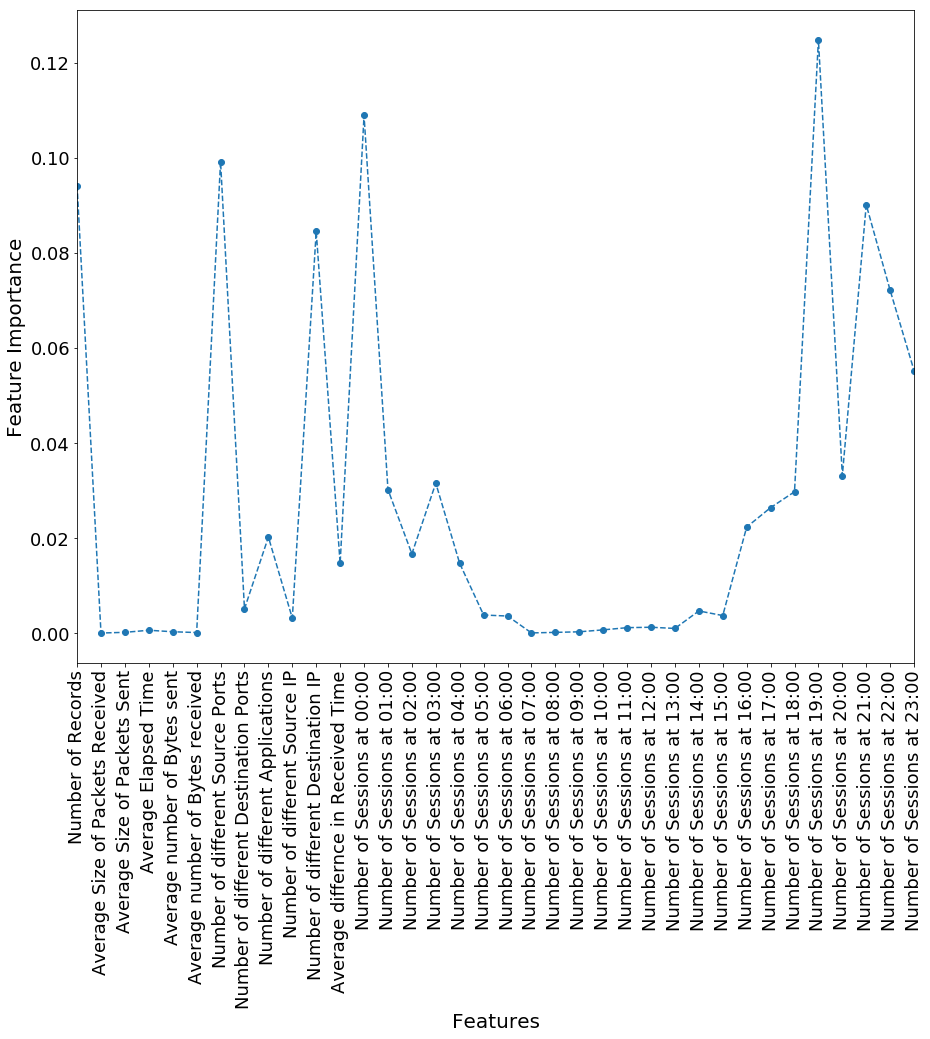

In [54]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [48]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.753086419753

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          649   308      957
1          155   832      987
__all__    804  1140     1944

Accuracy of the  AdaBoostClassifier  model for test data is: 0.769547325103

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          186   72      258
1           40  188      228
__all__    226  260      486

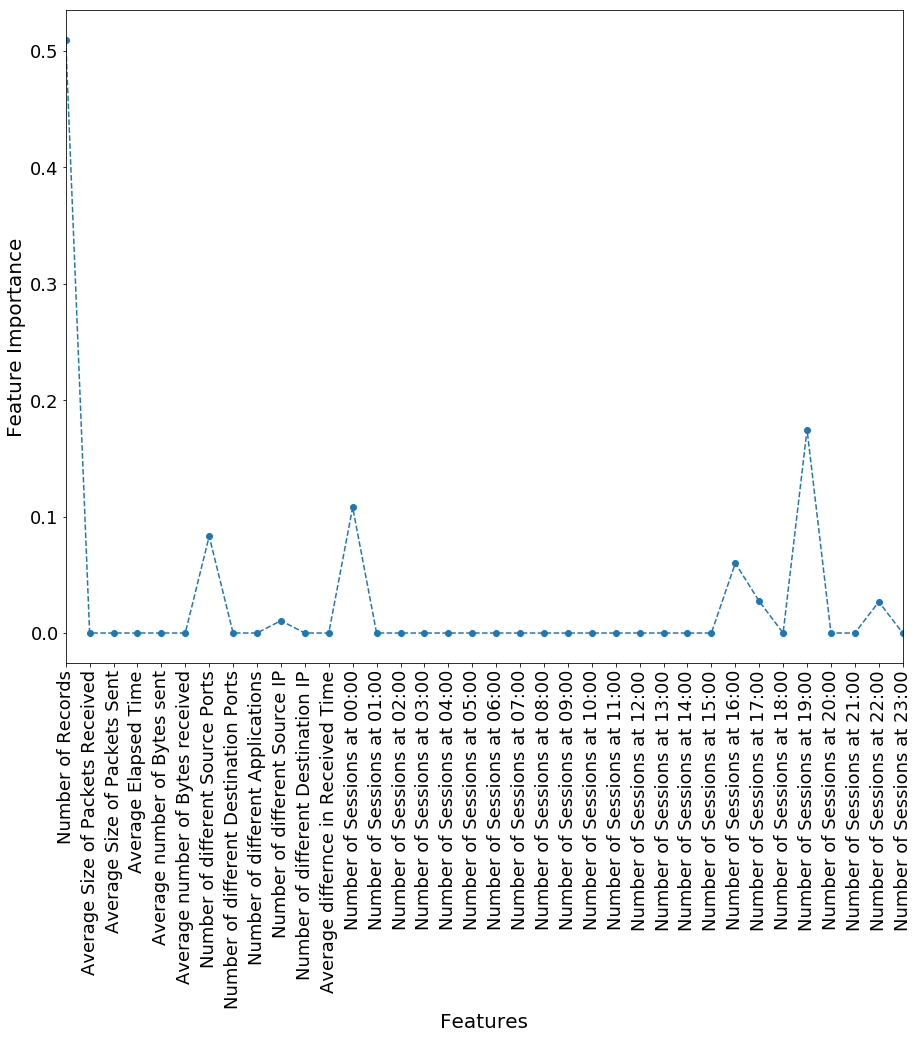

In [55]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_50_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_50_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [51]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.764917695473

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          674   283      957
1          144   843      987
__all__    818  1126     1944

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.788065843621

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          187   71      258
1           32  196      228
__all__    219  267      486

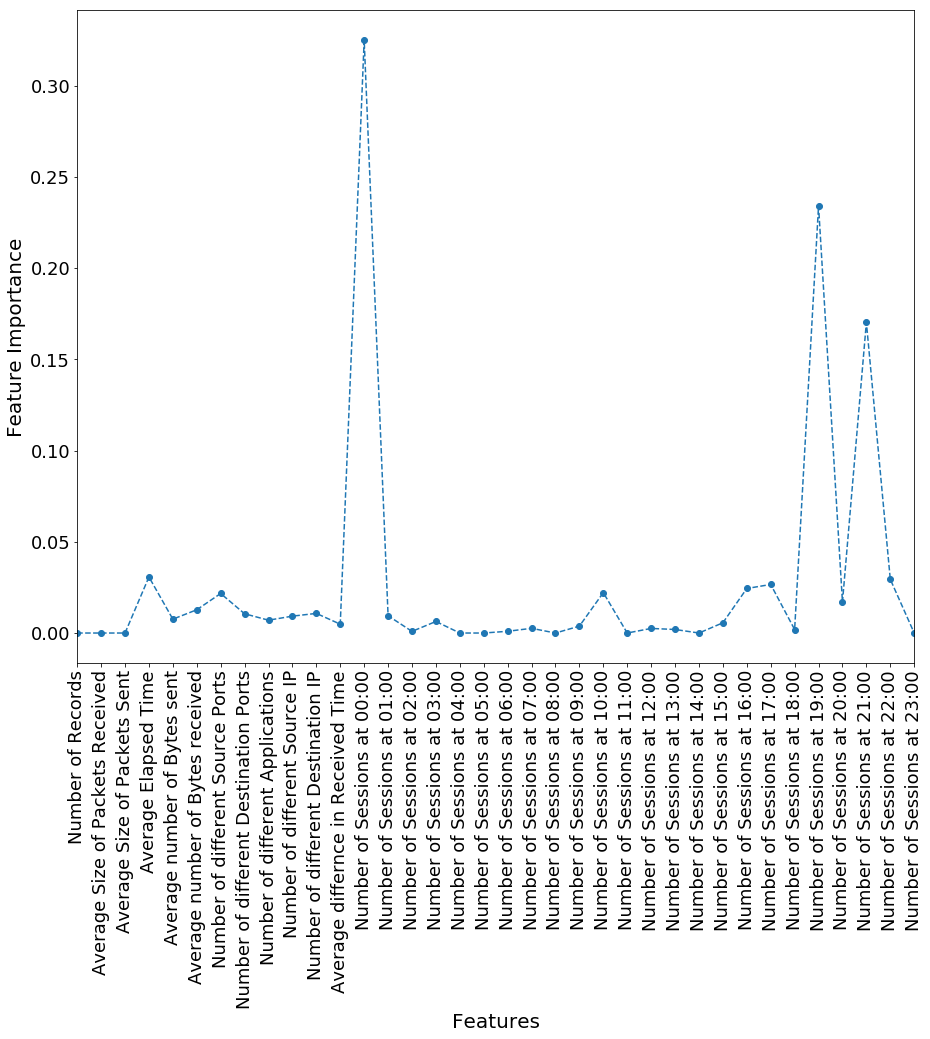

In [56]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_50_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_50_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [57]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.748456790123

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          666   291      957
1          186   801      987
__all__    852  1092     1944

Accuracy of the  Extra Decision Tree  model for test data is: 0.77366255144

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          195   63      258
1           47  181      228
__all__    242  244      486

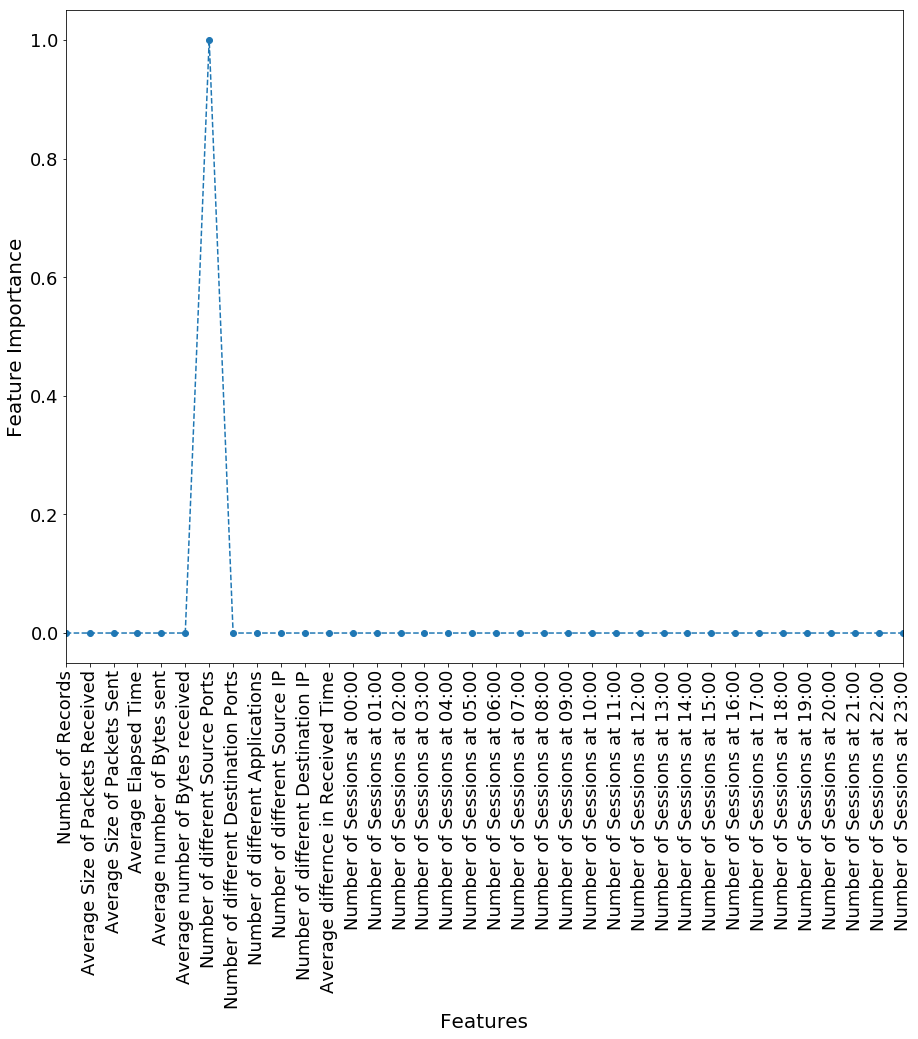

In [58]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_50_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_50_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [59]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.759259259259

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          799   158      957
1           84   903      987
__all__    883  1061     1944

Accuracy of the  Bagging  model for test data is: 0.786008230453

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          191   67      258
1           37  191      228
__all__    228  258      486

In [61]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_50_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_50_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [66]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.775205761317


Predicted    0     1  __all__
Actual                       
0          695   262      957
1          175   812      987
__all__    870  1074     1944

The test accuracy is: 0.781893004115


Predicted    0    1  __all__
Actual                      
0          195   63      258
1           43  185      228
__all__    238  248      486

In [68]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_50_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_50_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [70]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.940329218352


Predicted     0    1  __all__
Actual                       
0           933   24      957
1            92  895      987
__all__    1025  919     1944

The accuracy of the model on test data is: 0.703703703704


Predicted    0    1  __all__
Actual                      
0          190   68      258
1           76  152      228
__all__    266  220      486

In [71]:
table_80_50_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_50_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [72]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


The accuracy of the model on training data is: 0.791666666667


In [80]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted    0     1  __all__
Actual                       
0          700   257      957
1          148   839      987
__all__    848  1096     1944

The accuracy of the model on test data is: 0.761316872428


Predicted    0    1  __all__
Actual                      
0          190   68      258
1           48  180      228
__all__    238  248      486

In [81]:
table_80_50_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_50_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [82]:
table_80_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

<a id='1.A.A' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [83]:
print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

Comparision Table for Training Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.766461  775.0  715.0  242.0  212.0  0.214792   
LogisticRegression          0.750000  732.0  726.0  231.0  255.0  0.258359   
RandomForestClassifier      0.760802  801.0  678.0  279.0  186.0  0.188450   
AdaBoostClassifier          0.761831  832.0  649.0  308.0  155.0  0.157042   
GradientBoostingClassifier  0.780350  843.0  674.0  283.0  144.0  0.145897   
ExtraTreeClassifier         0.754630  801.0  666.0  291.0  186.0  0.188450   
BaggingClassifier           0.875514  903.0  799.0  158.0   84.0  0.085106   
VotingClassifier            0.775206  812.0  695.0  262.0  175.0  0.177305   
Neural Network-1            0.940329  895.0  933.0   24.0   92.0  0.093212   
Neural-Network-2            0.791667  839.0  700.0  257.0  148.0  0.149949   

                                 FNR  
index                                 
KNeighborsClassifier        0.252874  
LogisticRegression          0.241379  
RandomForestClassifier      0.291536  
AdaBoostClassifier          0.321839  
GradientBoostingClassifier  0.295716  
ExtraTreeClassifier         0.304075  
BaggingClassifier           0.165099  
VotingClassifier            0.273772  
Neural Network-1            0.025078  
Neural-Network-2            0.268548

In [85]:
print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Test Accuracies:


accuracy     TP     TN    FP    FN       FPR  \
index                                                                      
KNeighborsClassifier        0.767490  172.0  201.0  57.0  56.0  0.245614   
LogisticRegression          0.755144  165.0  202.0  56.0  63.0  0.276316   
RandomForestClassifier      0.775720  181.0  196.0  62.0  47.0  0.206140   
AdaBoostClassifier          0.769547  188.0  186.0  72.0  40.0  0.175439   
GradientBoostingClassifier  0.788066  196.0  187.0  71.0  32.0  0.140351   
ExtraTreeClassifier         0.773663  181.0  195.0  63.0  47.0  0.206140   
BaggingClassifier           0.786008  191.0  191.0  67.0  37.0  0.162281   
VotingClassifier            0.781893  185.0  195.0  63.0  43.0  0.188596   
Neural Network-1            0.703704  152.0  190.0  68.0  76.0  0.333333   
Neural-Network-2            0.761317  180.0  190.0  68.0  48.0  0.210526   

                                 FNR  
index                                 
KNeighborsClassifier        0.220930  
LogisticRegression          0.217054  
RandomForestClassifier      0.240310  
AdaBoostClassifier          0.279070  
GradientBoostingClassifier  0.275194  
ExtraTreeClassifier         0.244186  
BaggingClassifier           0.259690  
VotingClassifier            0.244186  
Neural Network-1            0.263566  
Neural-Network-2            0.263566

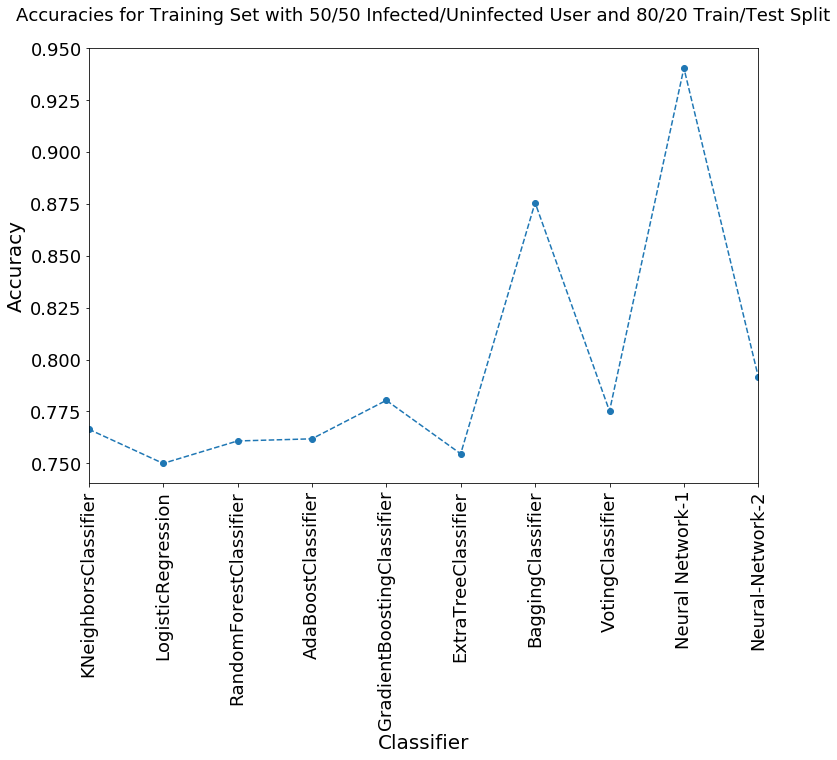

In [97]:
get_accuracy_plot(table_80_50_train,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split')

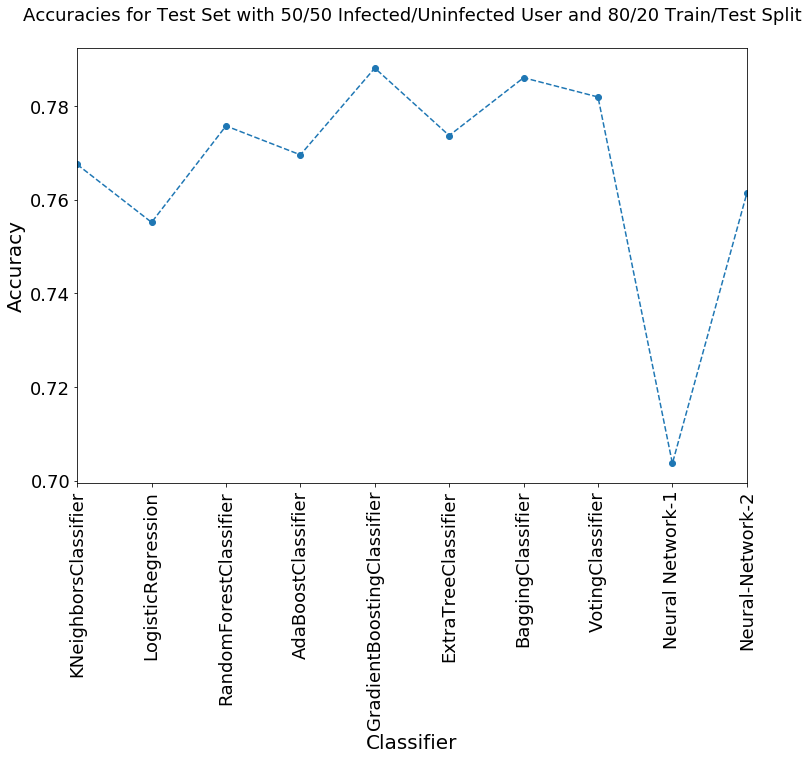

In [98]:
get_accuracy_plot(table_80_50_test,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split')

<a id='1.B' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split with PCA</h3.</a>

In [101]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

Variance explained using 13 components is: 0.885937278413
The train/test split ratio is 80:20


In [102]:
table_80_50_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance


Accuracy of the  KNN  model for training data is: 0.748456790123

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          957    0      957
1            0  987      987
__all__    957  987     1944

Accuracy of the  KNN  model for test data is: 0.761316872428

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          198   60      258
1           56  172      228
__all__    254  232      486

In [104]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_50_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_50_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [105]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05


Accuracy of the  Logistic  model for training data is: 0.747942386831

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          706   251      957
1          230   757      987
__all__    936  1008     1944

Accuracy of the  Logistic  model for test data is: 0.759259259259

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          203   55      258
1           62  166      228
__all__    265  221      486

In [106]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='multinomial',penalty='l2',solver='newton-cg',tol=1e-5)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_50_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_50_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [107]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.75462962963


Predicted    0     1  __all__
Actual                       
0          627   330      957
1          147   840      987
__all__    774  1170     1944

Accuracy of Random Forest Model on test data is: 0.763374485597


Predicted    0    1  __all__
Actual                      
0          177   81      258
1           34  194      228
__all__    211  275      486

In [108]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)

cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_50_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_50_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

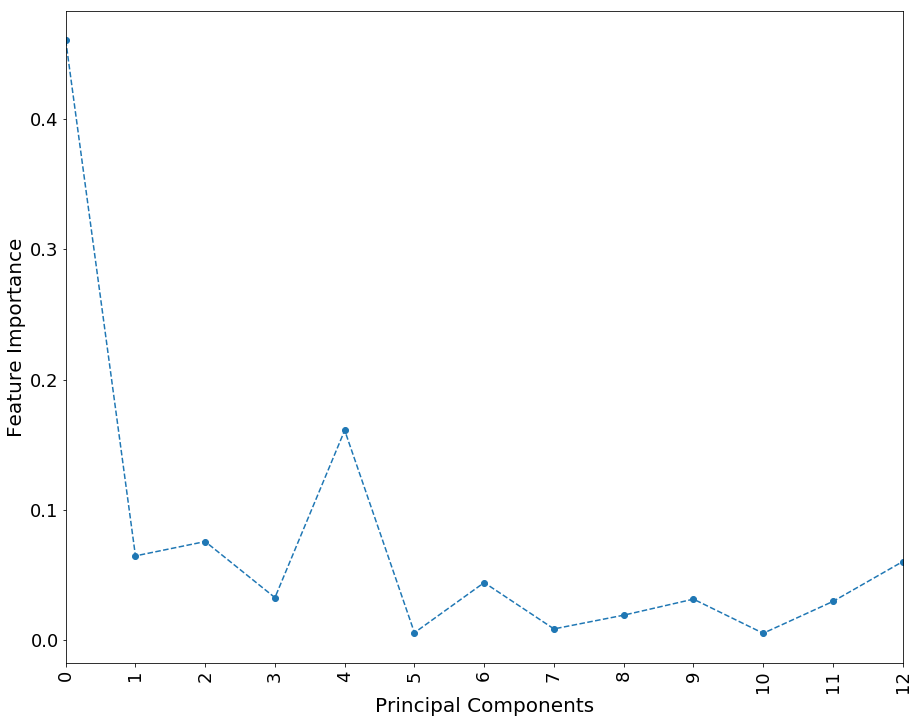

In [119]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [114]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.744855967078

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          640   317      957
1          164   823      987
__all__    804  1140     1944

Accuracy of the  AdaBoostClassifier  model for test data is: 0.769547325103

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          190   68      258
1           44  184      228
__all__    234  252      486

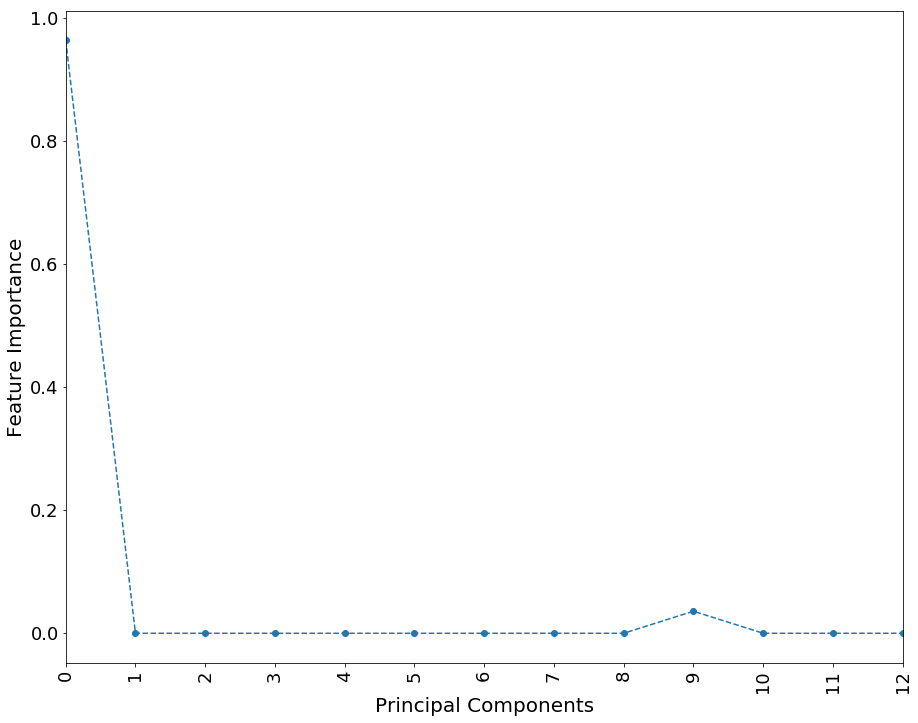

In [118]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_50_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_50_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [124]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.755658436214

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          684   273      957
1          159   828      987
__all__    843  1101     1944

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.775720164609

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          194   64      258
1           45  183      228
__all__    239  247      486

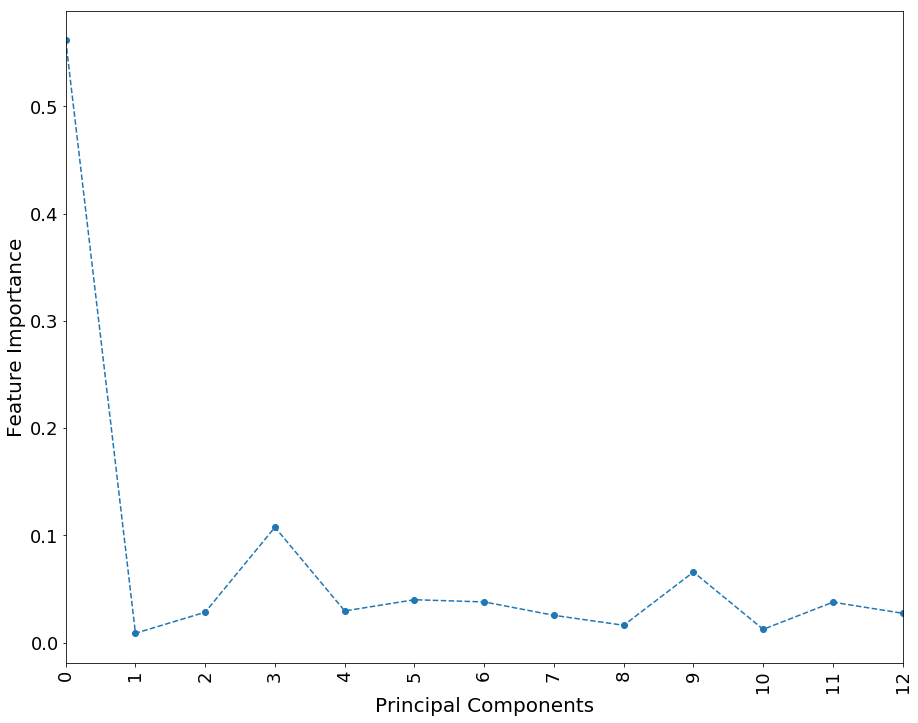

In [125]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_50_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_50_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [126]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.715534979424

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          754   203      957
1          140   847      987
__all__    894  1050     1944

Accuracy of the  Extra Decision Tree  model for test data is: 0.713991769547

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          171   87      258
1           52  176      228
__all__    223  263      486

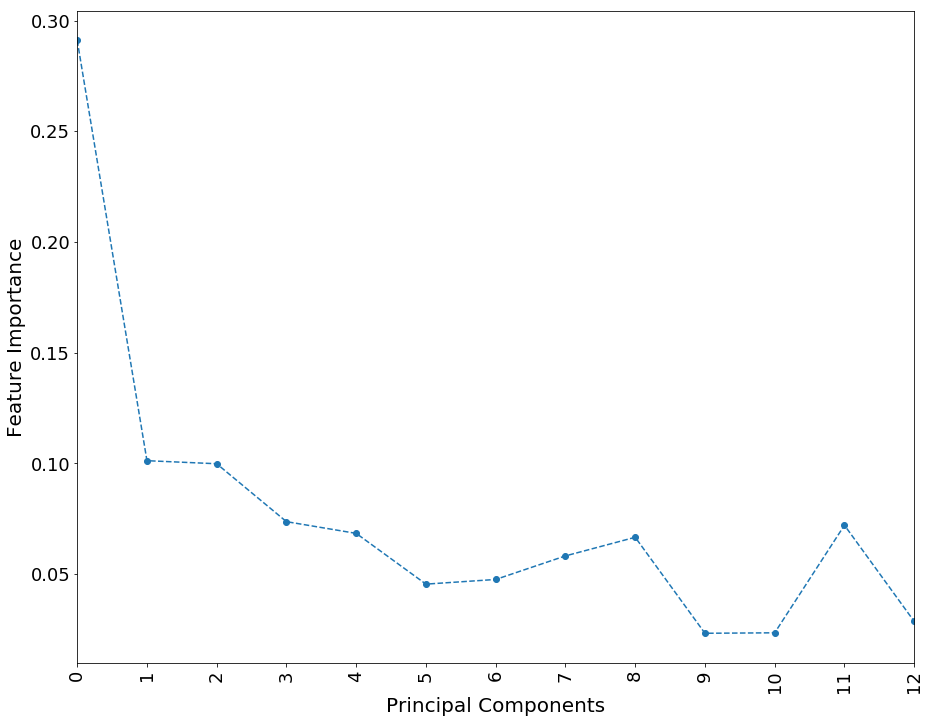

In [128]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_50_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_50_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [129]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.747427983539

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          856   101      957
1           50   937      987
__all__    906  1038     1944

Accuracy of the  Bagging  model for test data is: 0.763374485597

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          181   77      258
1           38  190      228
__all__    219  267      486

In [130]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_50_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_50_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [131]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.784465020576


Predicted    0     1  __all__
Actual                       
0          691   266      957
1          153   834      987
__all__    844  1100     1944

The test accuracy is: 0.767489711934


Predicted    0    1  __all__
Actual                      
0          188   70      258
1           43  185      228
__all__    231  255      486

In [132]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_50_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_50_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [134]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.863168724035


Predicted    0    1  __all__
Actual                      
0          834  123      957
1          143  844      987
__all__    977  967     1944

The accuracy of the model on test data is: 0.724279835391


Predicted    0    1  __all__
Actual                      
0          184   74      258
1           60  168      228
__all__    244  242      486

In [135]:
table_80_50_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_50_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [136]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


The accuracy of the model on training data is: 0.782407407407


In [137]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted    0     1  __all__
Actual                       
0          653   304      957
1          119   868      987
__all__    772  1172     1944

The accuracy of the model on test data is: 0.748971193416


Predicted    0    1  __all__
Actual                      
0          172   86      258
1           36  192      228
__all__    208  278      486

In [139]:
table_80_50_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_50_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [140]:
table_80_50_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test_PCA.set_index(['index'],drop=True,inplace=True)
table_80_50_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.B.B' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [141]:
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_PCA)

Comparision Table for Training Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.754630  740.0  727.0  230.0  247.0  0.250253   
LogisticRegression          0.752572  757.0  706.0  251.0  230.0  0.233029   
RandomForestClassifier      0.754630  840.0  627.0  330.0  147.0  0.148936   
AdaBoostClassifier          0.752572  823.0  640.0  317.0  164.0  0.166160   
GradientBoostingClassifier  0.777778  828.0  684.0  273.0  159.0  0.161094   
ExtraTreeClassifier         0.823560  847.0  754.0  203.0  140.0  0.141844   
BaggingClassifier           0.922325  937.0  856.0  101.0   50.0  0.050659   
VotingClassifier            0.784465  834.0  691.0  266.0  153.0  0.155015   
Neural Network-1            0.863169  844.0  834.0  123.0  143.0  0.144883   
Neural-Network-2            0.782407  868.0  653.0  304.0  119.0  0.120567   

                                 FNR  
index                                 
KNeighborsClassifier        0.240334  
LogisticRegression          0.262278  
RandomForestClassifier      0.344828  
AdaBoostClassifier          0.331243  
GradientBoostingClassifier  0.285266  
ExtraTreeClassifier         0.212121  
BaggingClassifier           0.105538  
VotingClassifier            0.277952  
Neural Network-1            0.128527  
Neural-Network-2            0.317659

In [142]:
print("Comparision Table for Test Accuracies:")
display(table_80_50_test_PCA)

Comparision Table for Test Accuracies:


accuracy     TP     TN    FP    FN       FPR  \
index                                                                      
KNeighborsClassifier        0.755144  167.0  200.0  58.0  61.0  0.267544   
LogisticRegression          0.759259  166.0  203.0  55.0  62.0  0.271930   
RandomForestClassifier      0.763374  194.0  177.0  81.0  34.0  0.149123   
AdaBoostClassifier          0.769547  184.0  190.0  68.0  44.0  0.192982   
GradientBoostingClassifier  0.775720  183.0  194.0  64.0  45.0  0.197368   
ExtraTreeClassifier         0.713992  176.0  171.0  87.0  52.0  0.228070   
BaggingClassifier           0.763374  190.0  181.0  77.0  38.0  0.166667   
VotingClassifier            0.767490  185.0  188.0  70.0  43.0  0.188596   
Neural Network-1            0.724280  168.0  184.0  74.0  60.0  0.263158   
Neural-Network-2            0.748971  192.0  172.0  86.0  36.0  0.157895   

                                 FNR  
index                                 
KNeighborsClassifier        0.224806  
LogisticRegression          0.213178  
RandomForestClassifier      0.313953  
AdaBoostClassifier          0.263566  
GradientBoostingClassifier  0.248062  
ExtraTreeClassifier         0.337209  
BaggingClassifier           0.298450  
VotingClassifier            0.271318  
Neural Network-1            0.286822  
Neural-Network-2            0.333333

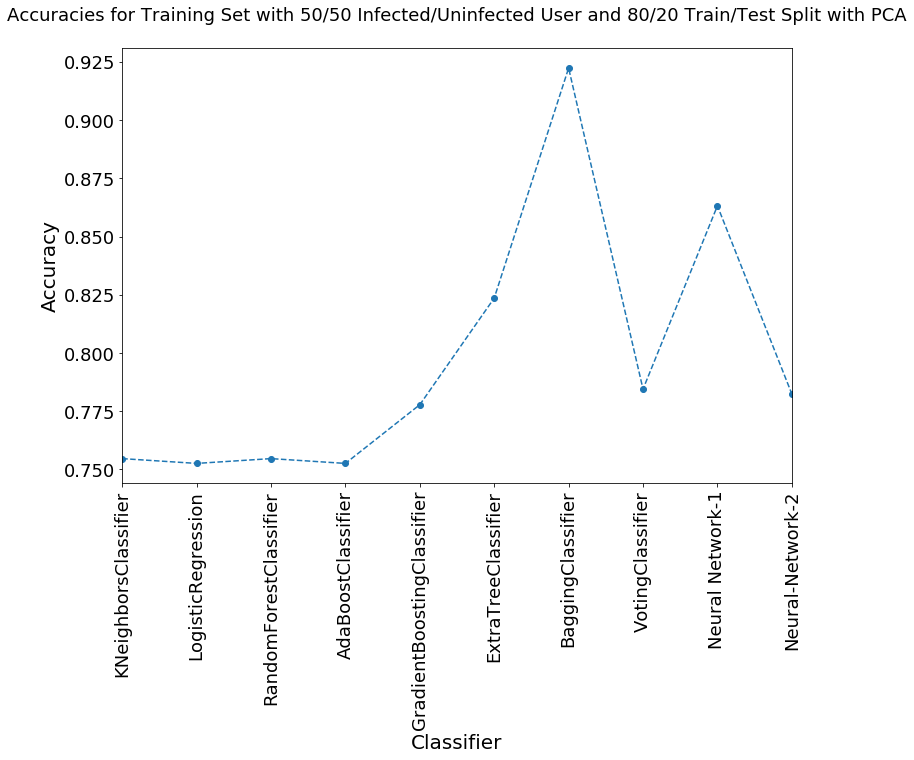

In [144]:
get_accuracy_plot(table_80_50_train_PCA,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

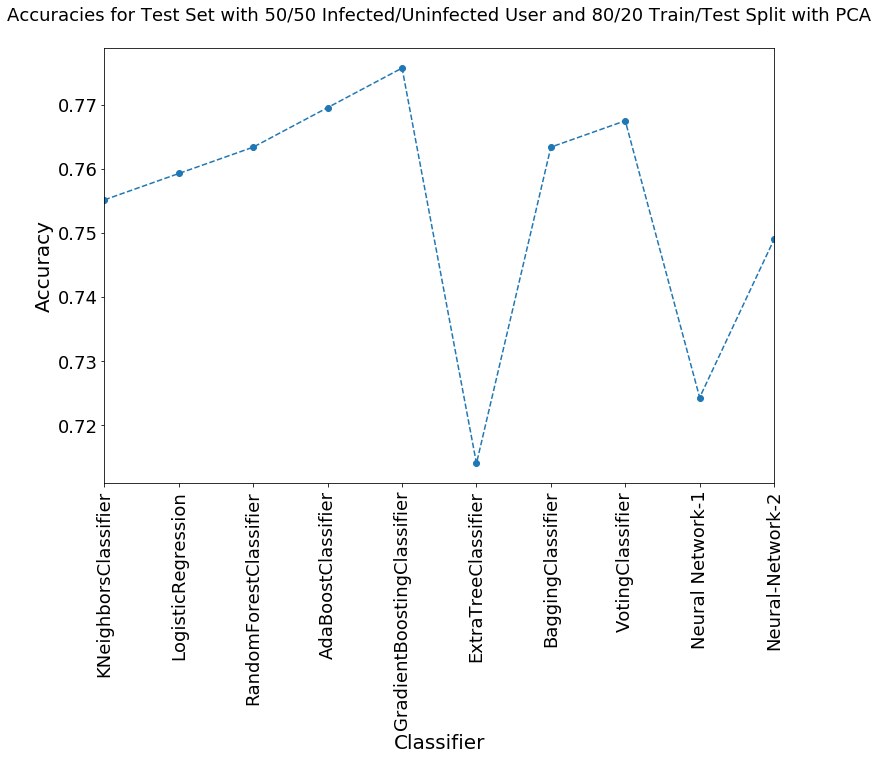

In [145]:
get_accuracy_plot(table_80_50_test_PCA,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

<a id='1.C' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split</h3.</a>

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [8]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())
    print("\nAccuracy of the ",model_name," model for training data is:",grid.best_score_)

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

In [9]:
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance


Accuracy of the  KNN  model for training data is: 0.754262198707

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          847    0      847
1            0  854      854
__all__    847  854     1701

Accuracy of the  KNN  model for test data is: 0.770919067215

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          279   89      368
1           78  283      361
__all__    357  372      729

In [13]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_50_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_50_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [14]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.752498530276

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          646  201      847
1          224  630      854
__all__    870  831     1701

Accuracy of the  Logistic  model for test data is: 0.742112482853

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          282   86      368
1          102  259      361
__all__    384  345      729

In [15]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='multinomial',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_50_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_50_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [16]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.760141093474


Predicted    0    1  __all__
Actual                      
0          604  243      847
1          165  689      854
__all__    769  932     1701

Accuracy of Random Forest Model on test data is: 0.764060356653


Predicted    0    1  __all__
Actual                      
0          269   99      368
1           73  288      361
__all__    342  387      729

In [17]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_50_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_50_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

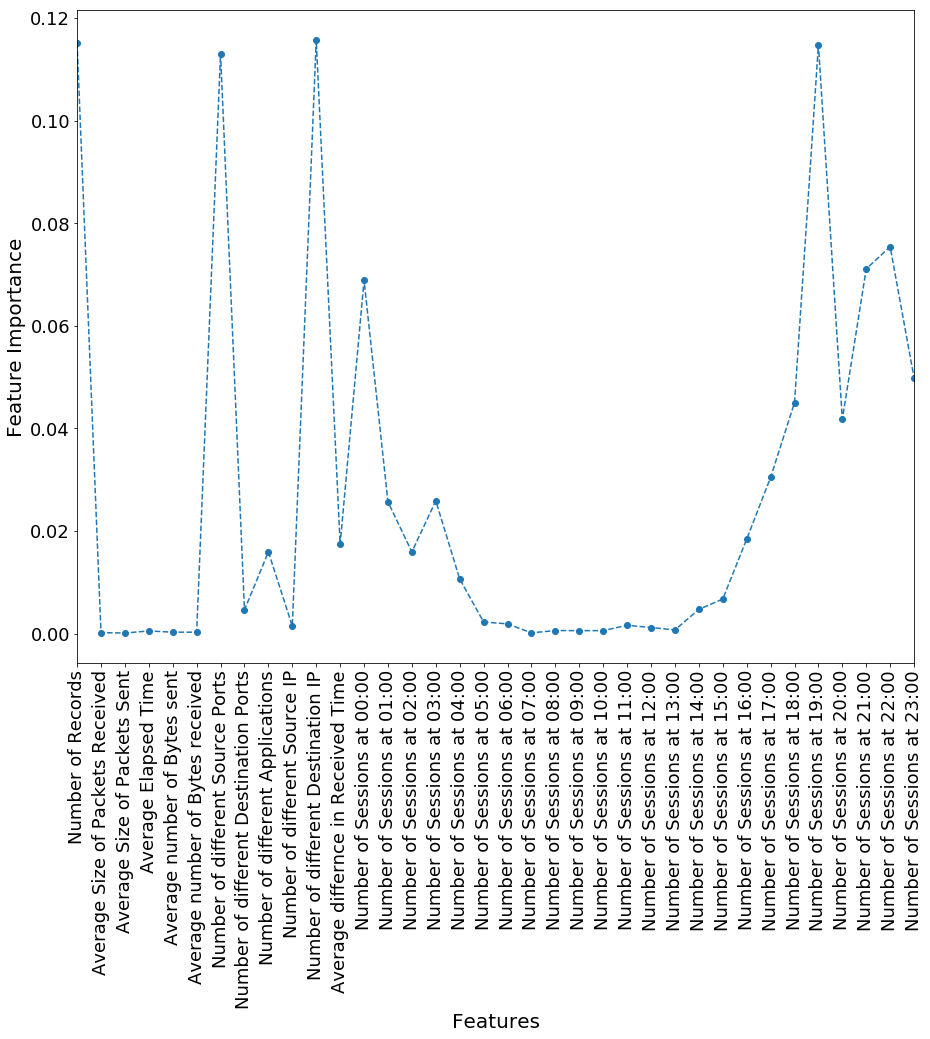

In [18]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [19]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.7519106408

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          591  256      847
1          133  721      854
__all__    724  977     1701

Accuracy of the  AdaBoostClassifier  model for test data is: 0.758573388203

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          259  109      368
1           67  294      361
__all__    326  403      729

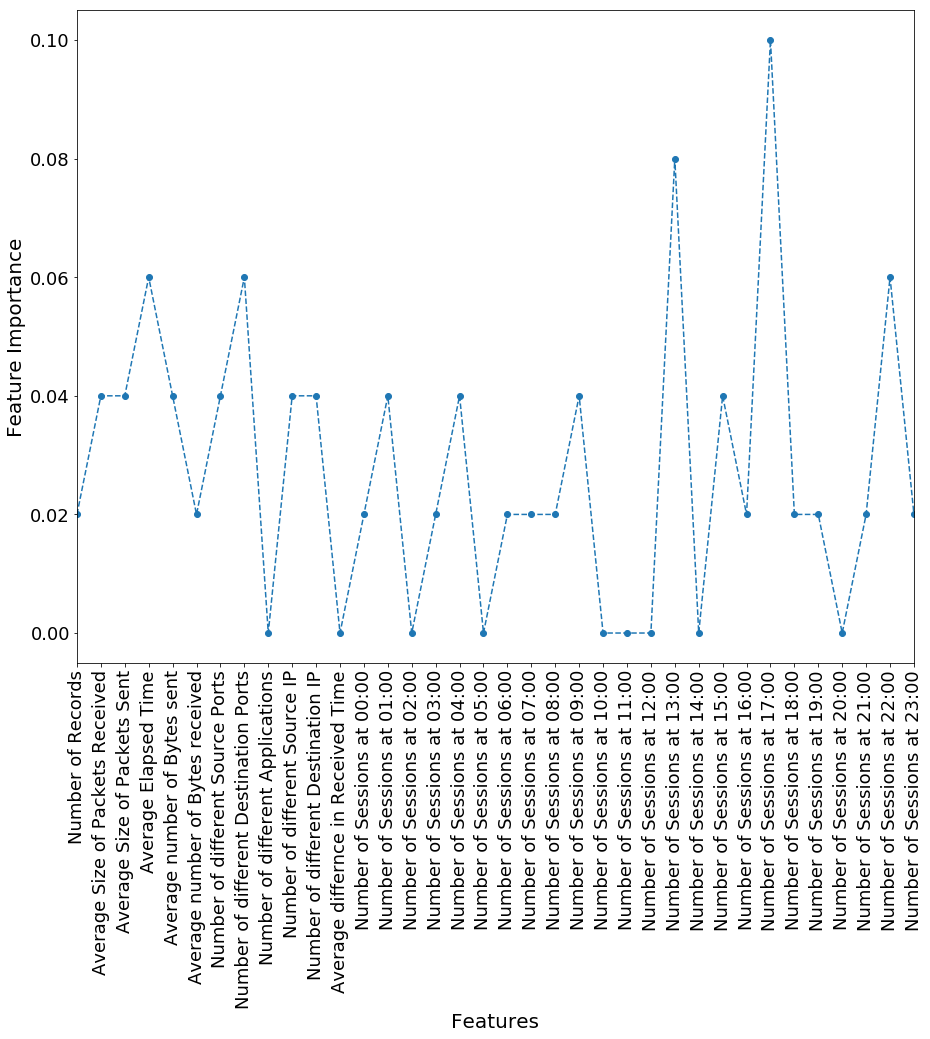

In [20]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_50_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_50_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [21]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.758377425044

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          599  248      847
1          114  740      854
__all__    713  988     1701

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.76268861454

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          253  115      368
1           58  303      361
__all__    311  418      729

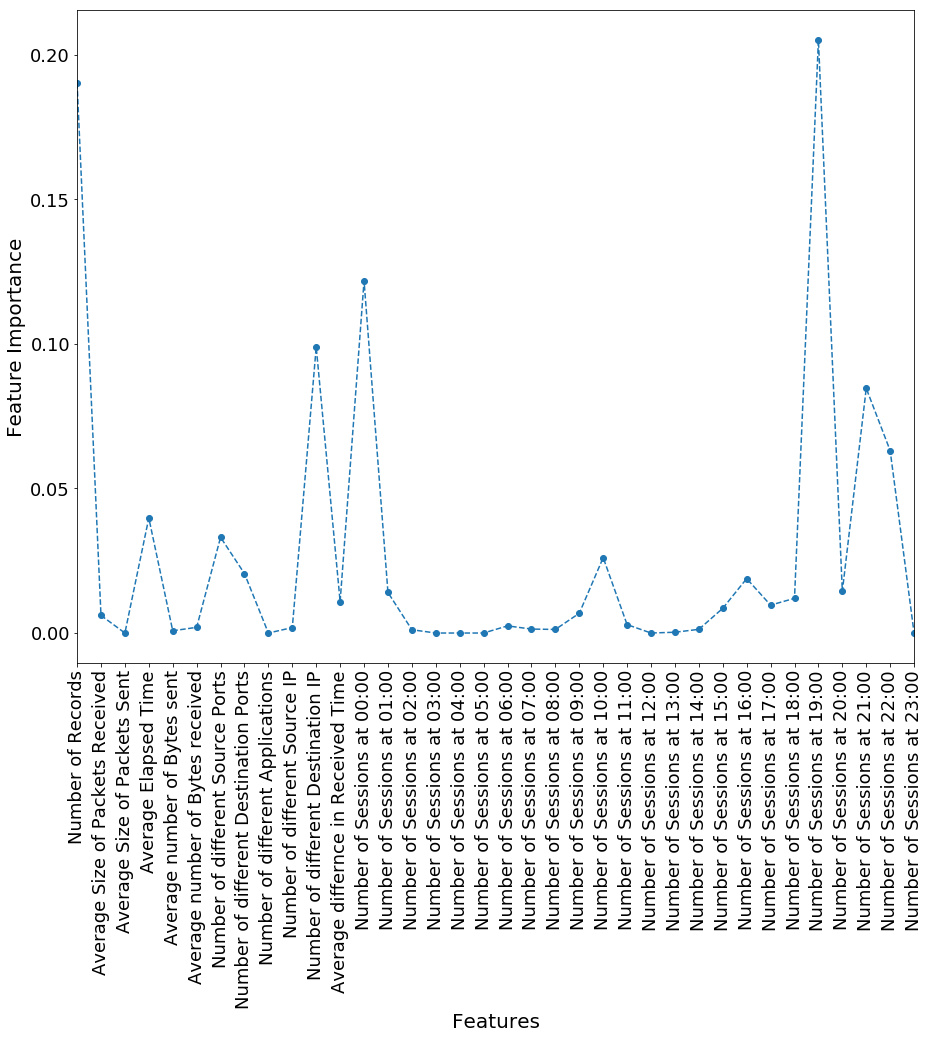

In [22]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_50_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_50_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [23]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.757201646091

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          598  249      847
1          158  696      854
__all__    756  945     1701

Accuracy of the  Extra Decision Tree  model for test data is: 0.753086419753

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          263  105      368
1           75  286      361
__all__    338  391      729

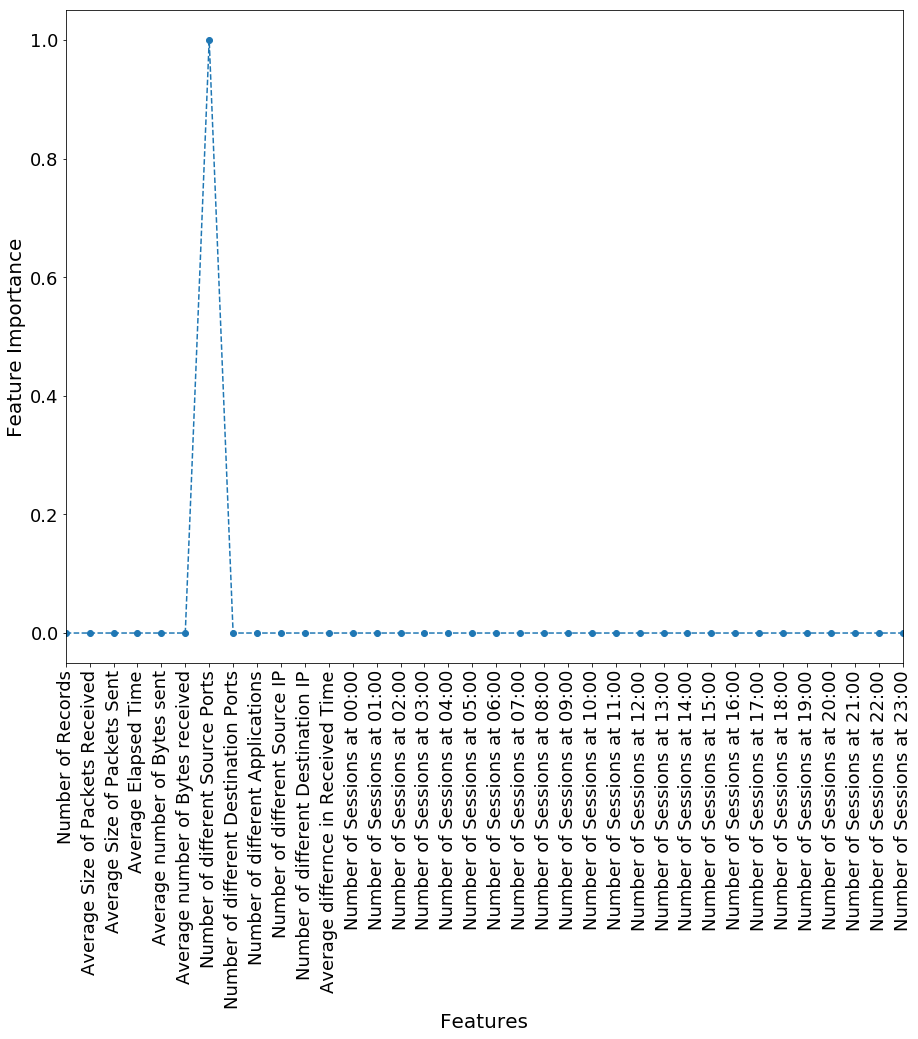

In [24]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_70_50_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_50_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [25]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.764256319812

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          717  130      847
1           74  780      854
__all__    791  910     1701

Accuracy of the  Bagging  model for test data is: 0.764060356653

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          259  109      368
1           63  298      361
__all__    322  407      729

In [26]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_70_50_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_50_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [27]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.802469135802


Predicted    0    1  __all__
Actual                      
0          626  221      847
1          115  739      854
__all__    741  960     1701

The test accuracy is: 0.766803840878


Predicted    0    1  __all__
Actual                      
0          267  101      368
1           69  292      361
__all__    336  393      729

In [28]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_50_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_50_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [29]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.958847736626


Predicted    0    1  __all__
Actual                      
0          834   13      847
1           57  797      854
__all__    891  810     1701

The accuracy of the model on test data is: 0.700960219479


Predicted    0    1  __all__
Actual                      
0          264  104      368
1          114  247      361
__all__    378  351      729

In [30]:
table_70_50_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_50_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [31]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


The accuracy of the model on training data is: 0.784244562022


In [32]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted    0    1  __all__
Actual                      
0          638  209      847
1          158  696      854
__all__    796  905     1701

The accuracy of the model on test data is: 0.742112482853


Predicted    0    1  __all__
Actual                      
0          268  100      368
1           88  273      361
__all__    356  373      729

In [33]:
table_70_50_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_50_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [34]:
table_70_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)

<a id='1.C.C' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [35]:
print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

Comparision Table for Training Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        1.000000  854.0  847.0    0.0    0.0  0.000000   
LogisticRegression          0.749559  630.0  645.0  202.0  224.0  0.262295   
RandomForestClassifier      0.760141  689.0  604.0  243.0  165.0  0.193208   
AdaBoostClassifier          0.771311  721.0  591.0  256.0  133.0  0.155738   
GradientBoostingClassifier  0.787184  740.0  599.0  248.0  114.0  0.133489   
ExtraTreeClassifier         0.760729  696.0  598.0  249.0  158.0  0.185012   
BaggingClassifier           0.880071  780.0  717.0  130.0   74.0  0.086651   
VotingClassifier            0.802469  739.0  626.0  221.0  115.0  0.134660   
Neural Network-1            0.958848  797.0  834.0   13.0   57.0  0.066745   
Neural-Network-2            0.784245  696.0  638.0  209.0  158.0  0.185012   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.238489  
RandomForestClassifier      0.286895  
AdaBoostClassifier          0.302243  
GradientBoostingClassifier  0.292798  
ExtraTreeClassifier         0.293979  
BaggingClassifier           0.153483  
VotingClassifier            0.260921  
Neural Network-1            0.015348  
Neural-Network-2            0.246753

In [36]:
print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.770919  283.0  279.0   89.0   78.0  0.216066   
LogisticRegression          0.744856  260.0  283.0   85.0  101.0  0.279778   
RandomForestClassifier      0.764060  288.0  269.0   99.0   73.0  0.202216   
AdaBoostClassifier          0.758573  294.0  259.0  109.0   67.0  0.185596   
GradientBoostingClassifier  0.762689  303.0  253.0  115.0   58.0  0.160665   
ExtraTreeClassifier         0.753086  286.0  263.0  105.0   75.0  0.207756   
BaggingClassifier           0.764060  298.0  259.0  109.0   63.0  0.174515   
VotingClassifier            0.766804  292.0  267.0  101.0   69.0  0.191136   
Neural Network-1            0.700960  247.0  264.0  104.0  114.0  0.315789   
Neural-Network-2            0.742112  273.0  268.0  100.0   88.0  0.243767   

                                 FNR  
index                                 
KNeighborsClassifier        0.241848  
LogisticRegression          0.230978  
RandomForestClassifier      0.269022  
AdaBoostClassifier          0.296196  
GradientBoostingClassifier  0.312500  
ExtraTreeClassifier         0.285326  
BaggingClassifier           0.296196  
VotingClassifier            0.274457  
Neural Network-1            0.282609  
Neural-Network-2            0.271739

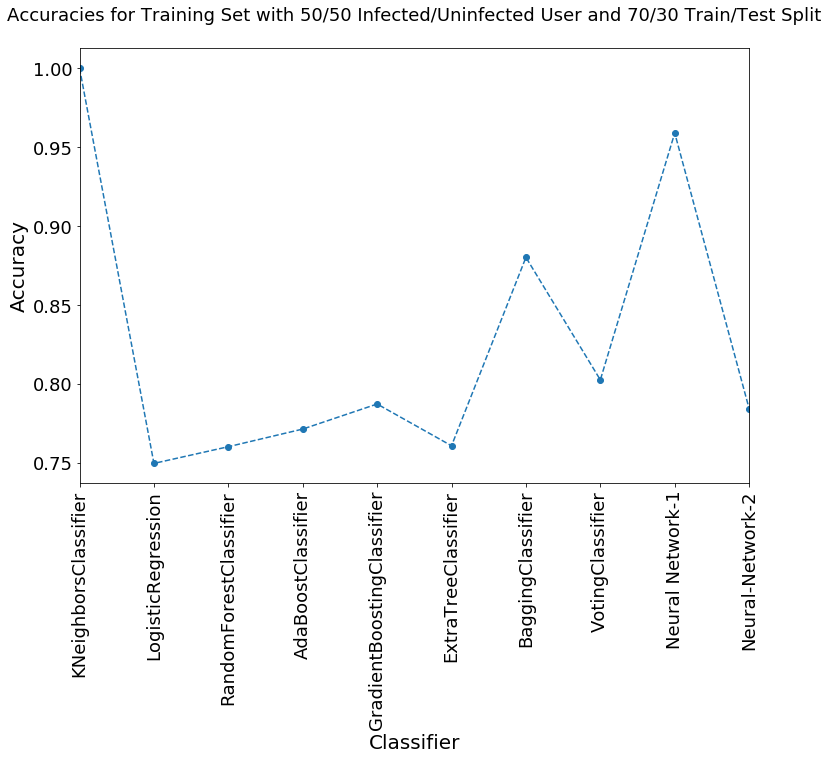

In [37]:
get_accuracy_plot(table_70_50_train,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split')

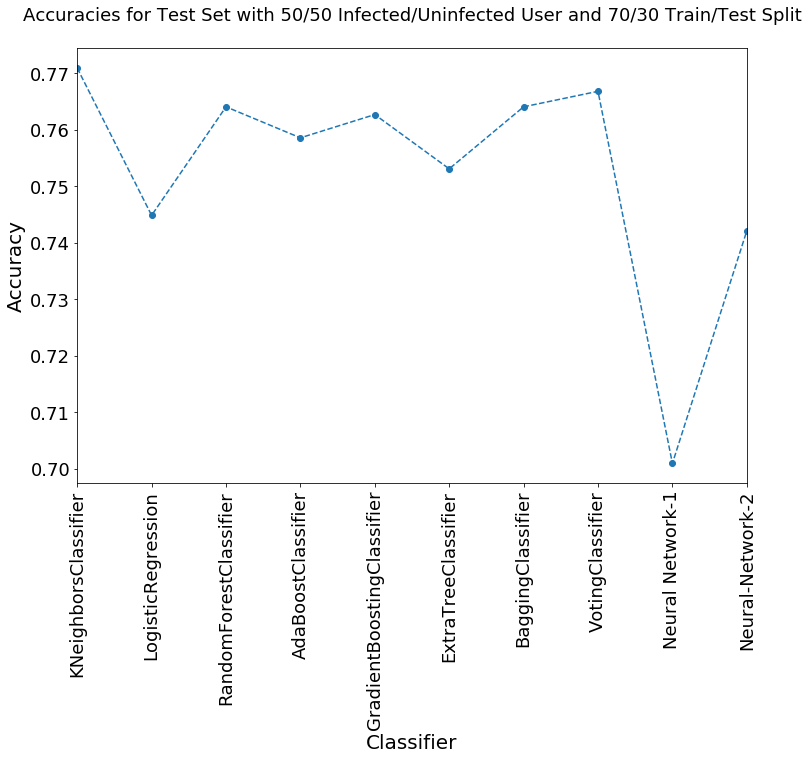

In [38]:
get_accuracy_plot(table_70_50_test,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split')

<a id='1.D' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split with PCA</h3.</a>

In [69]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

Variance explained using 13 components is: 0.885937278413
The train/test split ratio is 70:30


In [40]:
table_70_50_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance


Accuracy of the  KNN  model for training data is: 0.738389182834

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          847    0      847
1            0  854      854
__all__    847  854     1701

Accuracy of the  KNN  model for test data is: 0.750342935528

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          282   86      368
1           96  265      361
__all__    378  351      729

In [42]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_50_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_50_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [43]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5       100  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001


Accuracy of the  Logistic  model for training data is: 0.752498530276

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          630  217      847
1          198  656      854
__all__    828  873     1701

Accuracy of the  Logistic  model for test data is: 0.744855967078

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          279   89      368
1           97  264      361
__all__    376  353      729

In [44]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=False,intercept_scaling=0.5,max_iter=100,multi_class='multinomial',penalty='l2',solver='sag',tol=1e-3)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_50_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_50_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [45]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.760141093474


Predicted    0    1  __all__
Actual                      
0          574  273      847
1          135  719      854
__all__    709  992     1701

Accuracy of Random Forest Model on test data is: 0.742112482853


Predicted    0    1  __all__
Actual                      
0          251  117      368
1           71  290      361
__all__    322  407      729

In [46]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_50_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_50_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

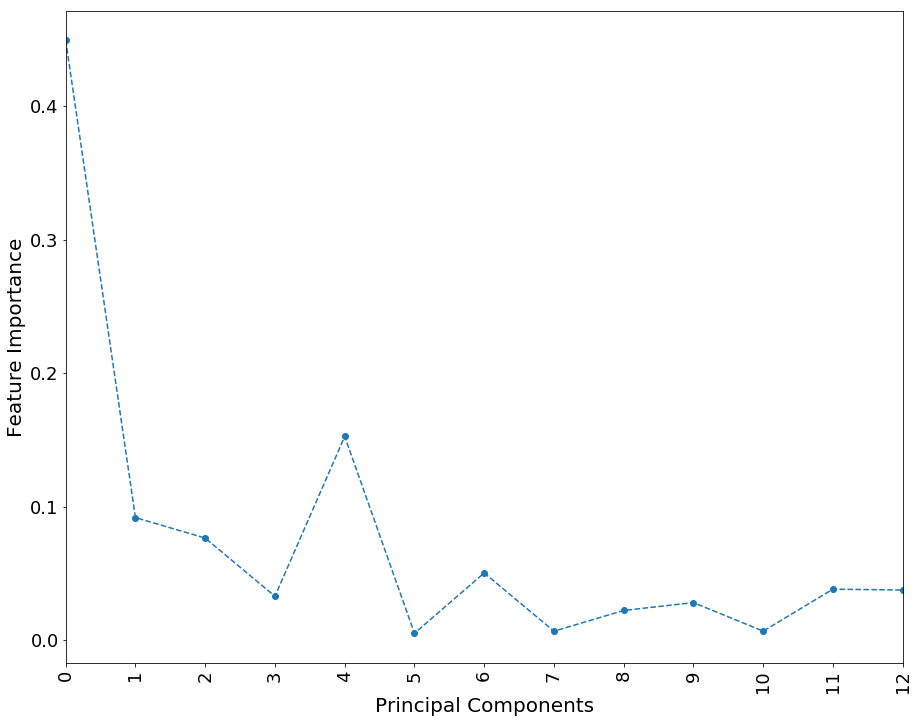

In [47]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [48]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.75543797766

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          617  230      847
1          157  697      854
__all__    774  927     1701

Accuracy of the  AdaBoostClassifier  model for test data is: 0.728395061728

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          260  108      368
1           90  271      361
__all__    350  379      729

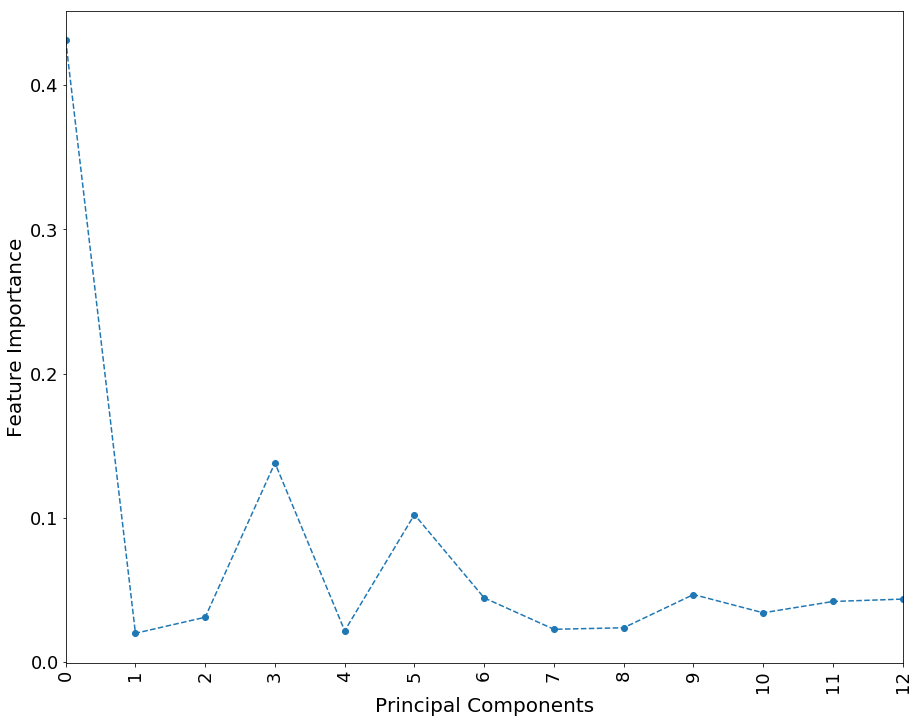

In [49]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.5,n_estimators=100,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_50_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_50_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [50]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.758965314521

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          608  239      847
1          134  720      854
__all__    742  959     1701

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.753086419753

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          259  109      368
1           71  290      361
__all__    330  399      729

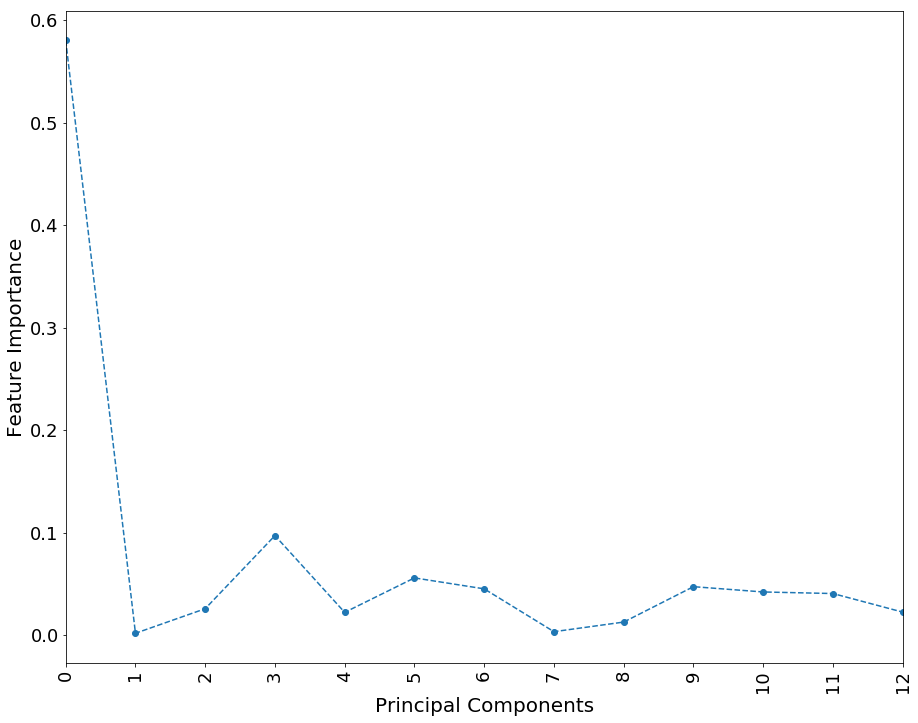

In [51]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_50_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_50_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [52]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  5             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.716637272193

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          676  171      847
1          100  754      854
__all__    776  925     1701

Accuracy of the  Extra Decision Tree  model for test data is: 0.695473251029

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          242  126      368
1           96  265      361
__all__    338  391      729

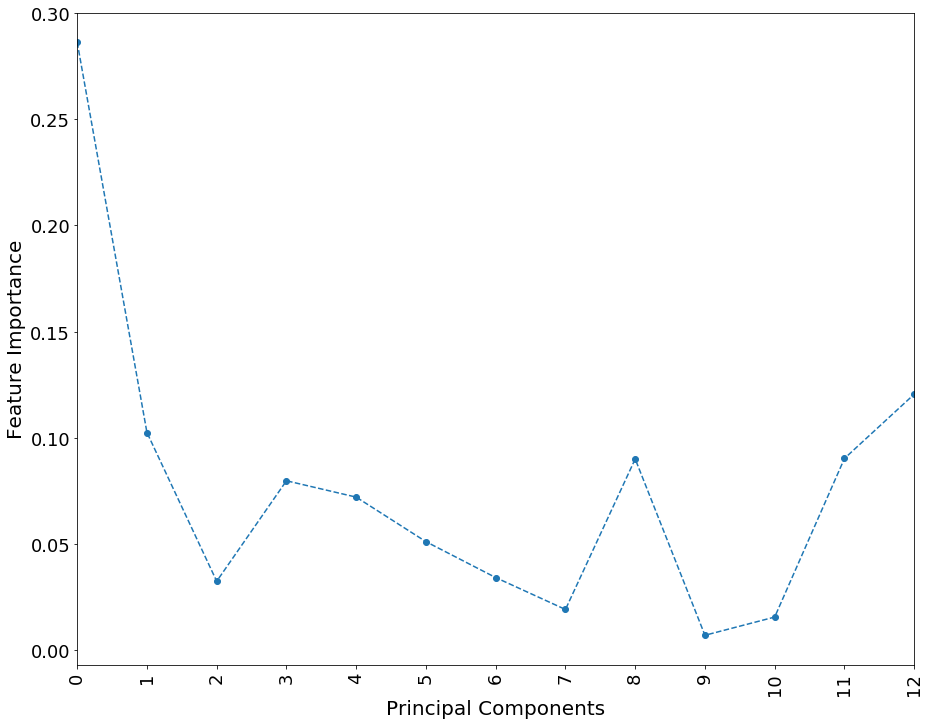

In [54]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=5,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_70_50_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_50_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [55]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.743092298648

Confusion Matrix for Training data is:


Predicted    0    1  __all__
Actual                      
0          765   82      847
1           52  802      854
__all__    817  884     1701

Accuracy of the  Bagging  model for test data is: 0.748971193416

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          255  113      368
1           70  291      361
__all__    325  404      729

In [56]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_70_50_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_50_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [57]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.784244562022


Predicted    0    1  __all__
Actual                      
0          621  226      847
1          141  713      854
__all__    762  939     1701

The test accuracy is: 0.748971193416


Predicted    0    1  __all__
Actual                      
0          263  105      368
1           78  283      361
__all__    341  388      729

In [58]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_50_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_50_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [59]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.842445620293


Predicted    0    1  __all__
Actual                      
0          699  148      847
1          120  734      854
__all__    819  882     1701

The accuracy of the model on test data is: 0.742112482853


Predicted    0    1  __all__
Actual                      
0          257  111      368
1           77  284      361
__all__    334  395      729

In [60]:
table_70_50_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_50_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [61]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


The accuracy of the model on training data is: 0.784832451499


In [62]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted    0     1  __all__
Actual                       
0          573   274      847
1           92   762      854
__all__    665  1036     1701

The accuracy of the model on test data is: 0.757201646091


Predicted    0    1  __all__
Actual                      
0          244  124      368
1           53  308      361
__all__    297  432      729

In [63]:
table_70_50_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_50_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [64]:
table_70_50_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_test_PCA.set_index(['index'],drop=True,inplace=True)
table_70_50_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.D.D' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [65]:
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_PCA)

Comparision Table for Training Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.750735  613.0  664.0  183.0  241.0  0.282201   
LogisticRegression          0.754850  656.0  628.0  219.0  198.0  0.231850   
RandomForestClassifier      0.760141  719.0  574.0  273.0  135.0  0.158080   
AdaBoostClassifier          0.772487  697.0  617.0  230.0  157.0  0.183841   
GradientBoostingClassifier  0.780717  720.0  608.0  239.0  134.0  0.156909   
ExtraTreeClassifier         0.840682  754.0  676.0  171.0  100.0  0.117096   
BaggingClassifier           0.921223  802.0  765.0   82.0   52.0  0.060890   
VotingClassifier            0.784245  713.0  621.0  226.0  141.0  0.165105   
Neural Network-1            0.842446  734.0  699.0  148.0  120.0  0.140515   
Neural-Network-2            0.784832  762.0  573.0  274.0   92.0  0.107728   

                                 FNR  
index                                 
KNeighborsClassifier        0.216057  
LogisticRegression          0.258560  
RandomForestClassifier      0.322314  
AdaBoostClassifier          0.271547  
GradientBoostingClassifier  0.282172  
ExtraTreeClassifier         0.201889  
BaggingClassifier           0.096812  
VotingClassifier            0.266824  
Neural Network-1            0.174734  
Neural-Network-2            0.323495

In [66]:
print("Comparision Table for Test Accuracies:")
display(table_70_50_test_PCA)

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.740741  254.0  286.0   82.0  107.0  0.296399   
LogisticRegression          0.744856  264.0  279.0   89.0   97.0  0.268698   
RandomForestClassifier      0.742112  290.0  251.0  117.0   71.0  0.196676   
AdaBoostClassifier          0.728395  271.0  260.0  108.0   90.0  0.249307   
GradientBoostingClassifier  0.753086  290.0  259.0  109.0   71.0  0.196676   
ExtraTreeClassifier         0.695473  265.0  242.0  126.0   96.0  0.265928   
BaggingClassifier           0.748971  291.0  255.0  113.0   70.0  0.193906   
VotingClassifier            0.748971  283.0  263.0  105.0   78.0  0.216066   
Neural Network-1            0.742112  284.0  257.0  111.0   77.0  0.213296   
Neural-Network-2            0.757202  308.0  244.0  124.0   53.0  0.146814   

                                 FNR  
index                                 
KNeighborsClassifier        0.222826  
LogisticRegression          0.241848  
RandomForestClassifier      0.317935  
AdaBoostClassifier          0.293478  
GradientBoostingClassifier  0.296196  
ExtraTreeClassifier         0.342391  
BaggingClassifier           0.307065  
VotingClassifier            0.285326  
Neural Network-1            0.301630  
Neural-Network-2            0.336957

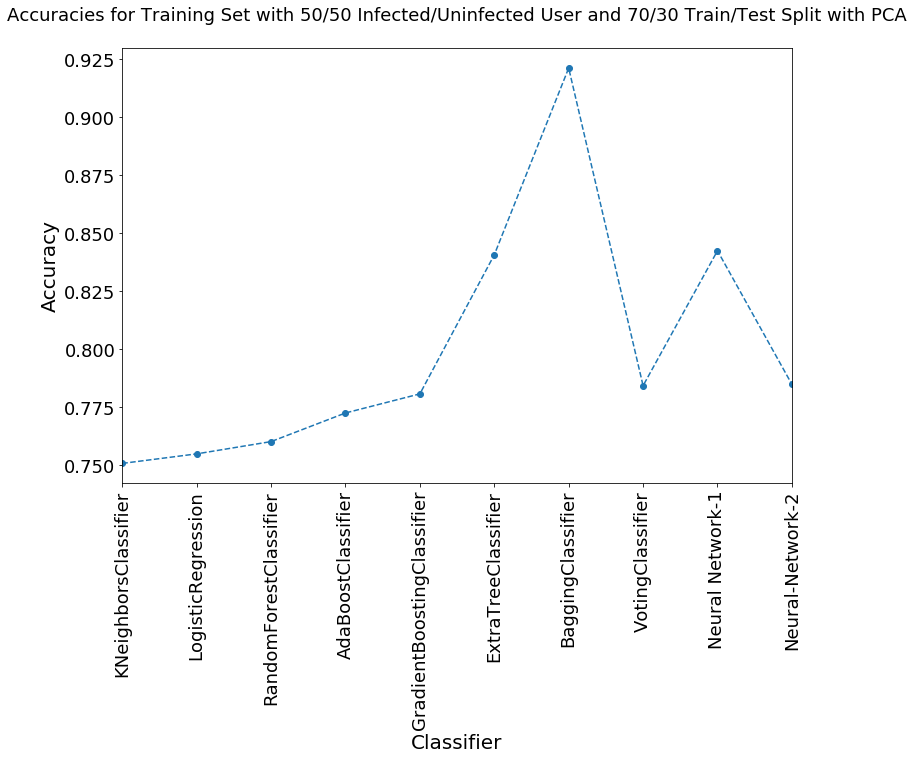

In [67]:
get_accuracy_plot(table_70_50_train_PCA,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

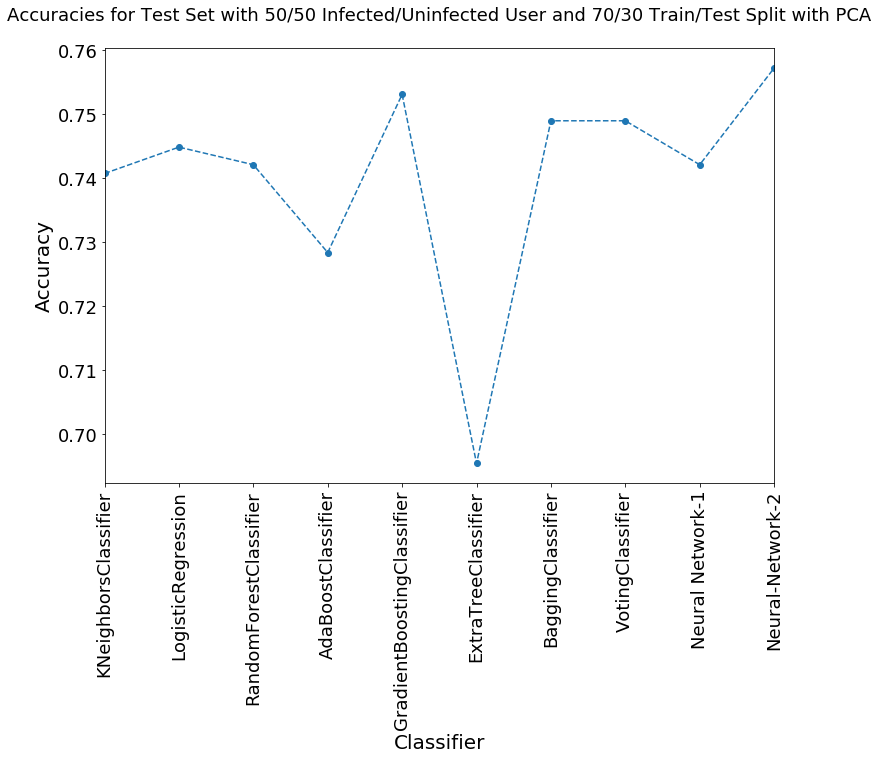

In [68]:
get_accuracy_plot(table_70_50_test_PCA,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

<a id='1.E' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split</h3.</a>

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.1)

The train/test split ratio is 90:10


In [72]:
table_90_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance


Accuracy of the  KNN  model for training data is: 0.75674439872

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1089     0     1089
1             0  1098     1098
__all__    1089  1098     2187

Accuracy of the  KNN  model for test data is: 0.711934156379

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           84   42      126
1           28   89      117
__all__    112  131      243

In [74]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_50_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_50_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [75]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.75674439872

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           851   238     1089
1           293   805     1098
__all__    1144  1043     2187

Accuracy of the  Logistic  model for test data is: 0.695473251029

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           91   35      126
1           39   78      117
__all__    130  113      243

In [76]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_50_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_50_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [77]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.765889346136


Predicted     0     1  __all__
Actual                        
0           793   296     1089
1           216   882     1098
__all__    1009  1178     2187

Accuracy of Random Forest Model on test data is: 0.728395061728


Predicted    0    1  __all__
Actual                      
0           86   40      126
1           26   91      117
__all__    112  131      243

In [78]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_50_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_50_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

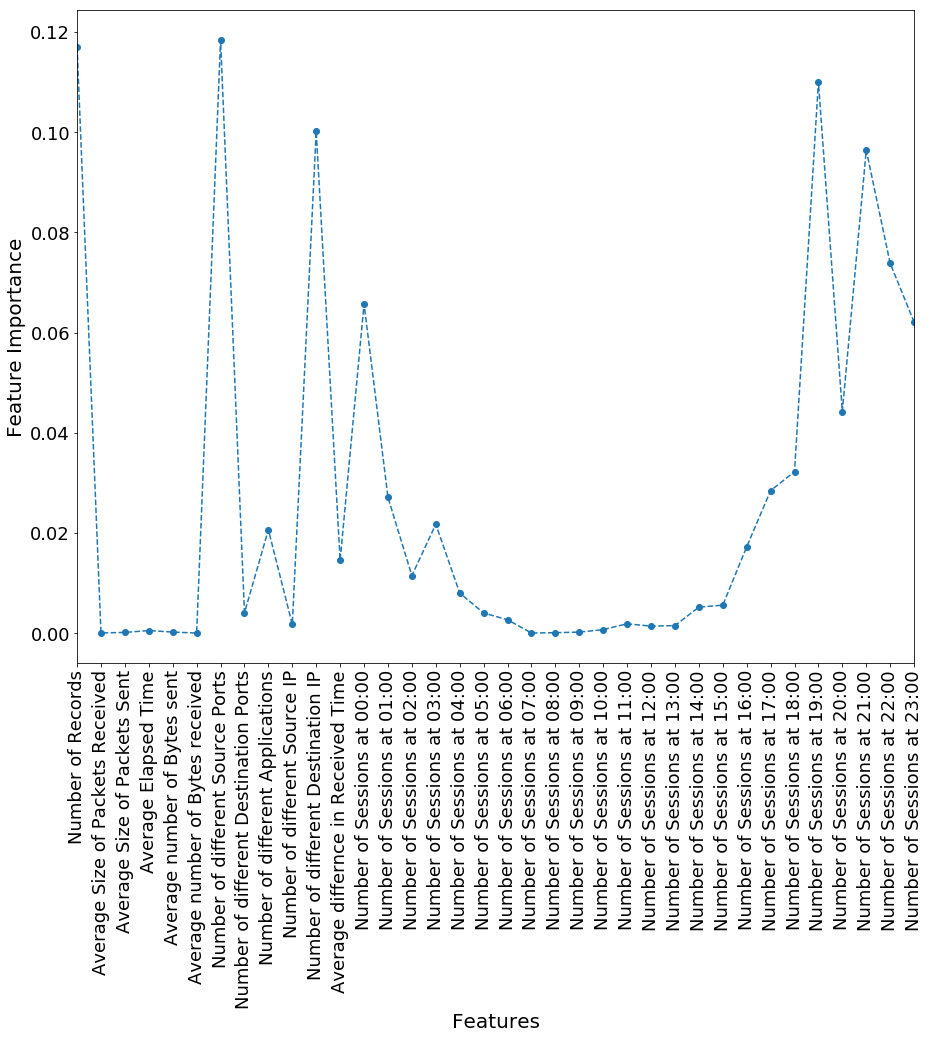

In [79]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [80]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.757658893461

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          766   323     1089
1          178   920     1098
__all__    944  1243     2187

Accuracy of the  AdaBoostClassifier  model for test data is: 0.716049382716

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           83   43      126
1           26   91      117
__all__    109  134      243

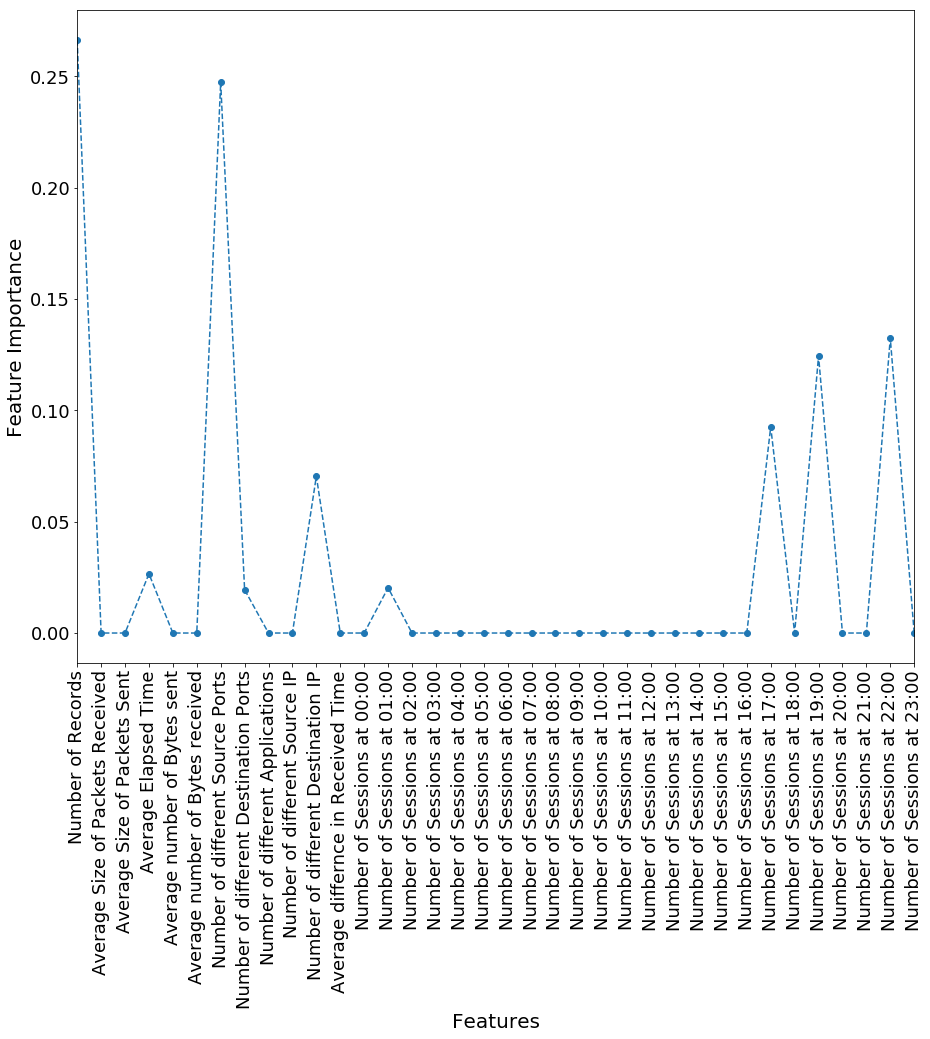

In [82]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=100,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_90_50_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_50_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [83]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.76771833562

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          784   305     1089
1          158   940     1098
__all__    942  1245     2187

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.711934156379

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           83   43      126
1           27   90      117
__all__    110  133      243

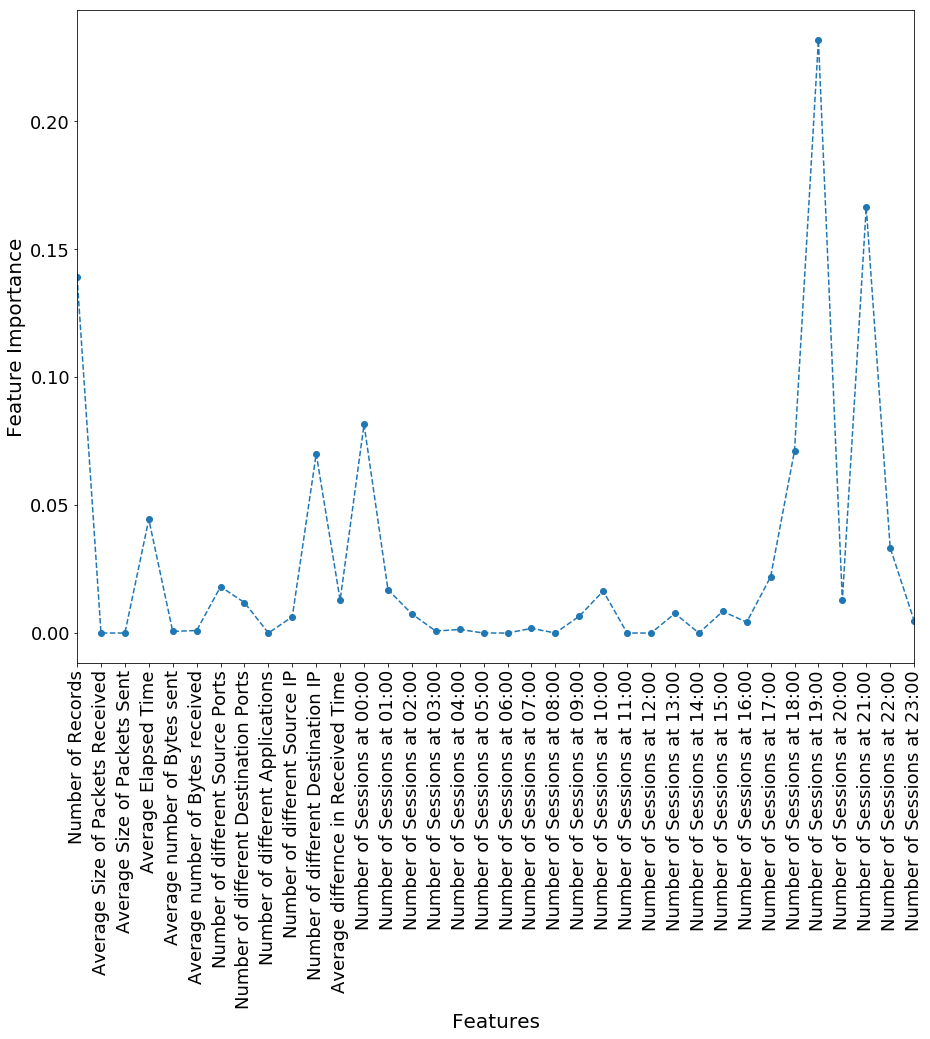

In [84]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_50_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_50_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [85]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.761774119799

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          767   322     1089
1          193   905     1098
__all__    960  1227     2187

Accuracy of the  Extra Decision Tree  model for test data is: 0.699588477366

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           79   47      126
1           26   91      117
__all__    105  138      243

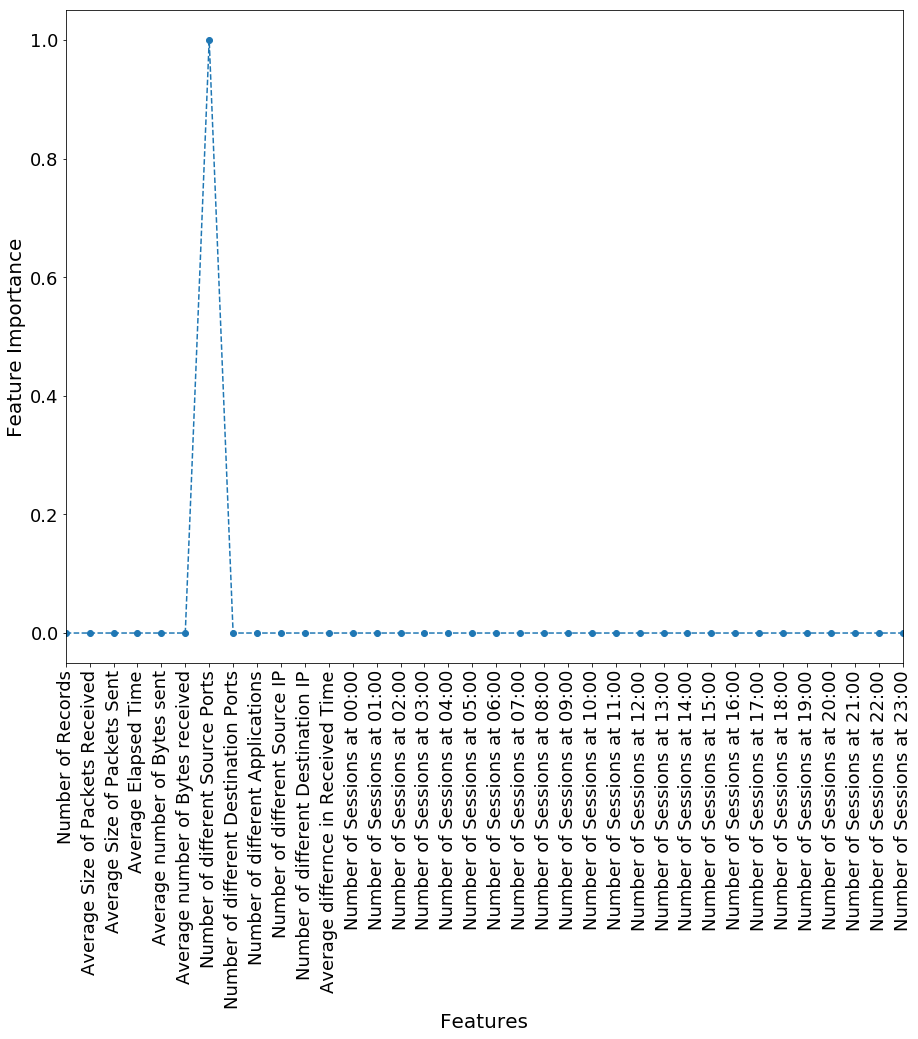

In [86]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_50_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_50_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [87]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.765432098765

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           922   167     1089
1            93  1005     1098
__all__    1015  1172     2187

Accuracy of the  Bagging  model for test data is: 0.724279835391

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           83   43      126
1           24   93      117
__all__    107  136      243

In [88]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_50_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_50_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [89]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.80109739369


Predicted    0     1  __all__
Actual                       
0          815   274     1089
1          161   937     1098
__all__    976  1211     2187

The test accuracy is: 0.711934156379


Predicted    0    1  __all__
Actual                      
0           82   44      126
1           26   91      117
__all__    108  135      243

In [90]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_50_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                        cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_50_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [91]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.948331047096


Predicted     0     1  __all__
Actual                        
0          1069    20     1089
1            93  1005     1098
__all__    1162  1025     2187

The accuracy of the model on test data is: 0.683127572016


Predicted    0    1  __all__
Actual                      
0           86   40      126
1           37   80      117
__all__    123  120      243

In [92]:
table_90_50_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_50_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [93]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


The accuracy of the model on training data is: 0.787379972565


In [94]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted    0     1  __all__
Actual                       
0          804   285     1089
1          180   918     1098
__all__    984  1203     2187

The accuracy of the model on test data is: 0.695473251029


Predicted    0    1  __all__
Actual                      
0           82   44      126
1           30   87      117
__all__    112  131      243

In [95]:
table_90_50_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_50_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [96]:
table_90_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_50_test.set_index(['index'],drop=True,inplace=True)
table_90_50_train.set_index(['index'],drop=True,inplace=True)

<a id='1.E.E' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [97]:
print("Comparision Table for Training Accuracies:")
display(table_90_50_train)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1098.0  1089.0    0.0    0.0  0.000000   
LogisticRegression          0.757202   808.0   848.0  241.0  290.0  0.264117   
RandomForestClassifier      0.765889   882.0   793.0  296.0  216.0  0.196721   
AdaBoostClassifier          0.770919   920.0   766.0  323.0  178.0  0.162113   
GradientBoostingClassifier  0.788294   940.0   784.0  305.0  158.0  0.143898   
ExtraTreeClassifier         0.764518   905.0   767.0  322.0  193.0  0.175774   
BaggingClassifier           0.881116  1005.0   922.0  167.0   93.0  0.084699   
VotingClassifier            0.801097   937.0   815.0  274.0  161.0  0.146630   
Neural Network-1            0.948331  1005.0  1069.0   20.0   93.0  0.084699   
Neural-Network-2            0.787380   918.0   804.0  285.0  180.0  0.163934   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.221304  
RandomForestClassifier      0.271809  
AdaBoostClassifier          0.296602  
GradientBoostingClassifier  0.280073  
ExtraTreeClassifier         0.295684  
BaggingClassifier           0.153352  
VotingClassifier            0.251607  
Neural Network-1            0.018365  
Neural-Network-2            0.261708

In [98]:
print("Comparision Table for Test Accuracies:")
display(table_90_50_test)

Comparision Table for Test Accuracies:


accuracy    TP    TN    FP    FN       FPR  \
index                                                                    
KNeighborsClassifier        0.711934  89.0  84.0  42.0  28.0  0.239316   
LogisticRegression          0.691358  78.0  90.0  36.0  39.0  0.333333   
RandomForestClassifier      0.728395  91.0  86.0  40.0  26.0  0.222222   
AdaBoostClassifier          0.716049  91.0  83.0  43.0  26.0  0.222222   
GradientBoostingClassifier  0.711934  90.0  83.0  43.0  27.0  0.230769   
ExtraTreeClassifier         0.699588  91.0  79.0  47.0  26.0  0.222222   
BaggingClassifier           0.724280  93.0  83.0  43.0  24.0  0.205128   
VotingClassifier            0.711934  91.0  82.0  44.0  26.0  0.222222   
Neural Network-1            0.683128  80.0  86.0  40.0  37.0  0.316239   
Neural-Network-2            0.695473  87.0  82.0  44.0  30.0  0.256410   

                                 FNR  
index                                 
KNeighborsClassifier        0.333333  
LogisticRegression          0.285714  
RandomForestClassifier      0.317460  
AdaBoostClassifier          0.341270  
GradientBoostingClassifier  0.341270  
ExtraTreeClassifier         0.373016  
BaggingClassifier           0.341270  
VotingClassifier            0.349206  
Neural Network-1            0.317460  
Neural-Network-2            0.349206

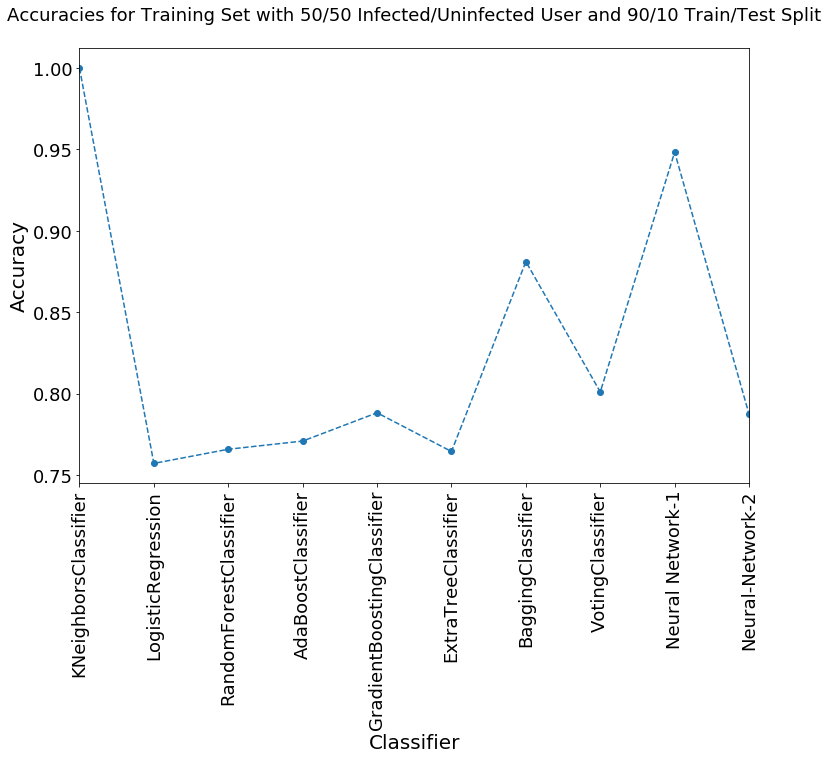

In [99]:
get_accuracy_plot(table_90_50_train,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split')

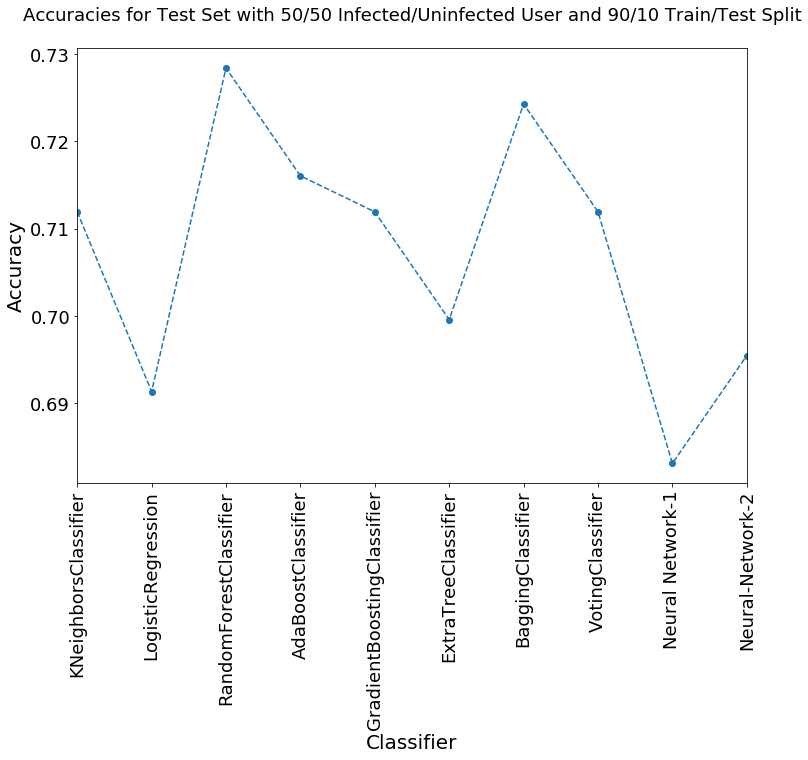

In [100]:
get_accuracy_plot(table_90_50_test,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split')

<a id='1.F' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split with PCA</h3.</a>

In [131]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.1)

Variance explained using 13 components is: 0.885937278413
The train/test split ratio is 90:10


In [132]:
table_90_50_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_50_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance


Accuracy of the  KNN  model for training data is: 0.746684956561

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1089     0     1089
1             0  1098     1098
__all__    1089  1098     2187

Accuracy of the  KNN  model for test data is: 0.687242798354

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           87   39      126
1           37   80      117
__all__    124  119      243

In [134]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_50_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_50_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [135]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05


Accuracy of the  Logistic  model for training data is: 0.760402377686

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           819   270     1089
1           253   845     1098
__all__    1072  1115     2187

Accuracy of the  Logistic  model for test data is: 0.699588477366

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           89   37      126
1           36   81      117
__all__    125  118      243

In [136]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=False,intercept_scaling=0.5,max_iter=50,multi_class='multinomial',penalty='l2',solver='newton-cg',tol=1e-5)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_50_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_50_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [137]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.761316872428


Predicted    0     1  __all__
Actual                       
0          741   348     1089
1          174   924     1098
__all__    915  1272     2187

Accuracy of Random Forest Model on test data is: 0.703703703704


Predicted    0    1  __all__
Actual                      
0           77   49      126
1           23   94      117
__all__    100  143      243

In [138]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_50_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_50_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

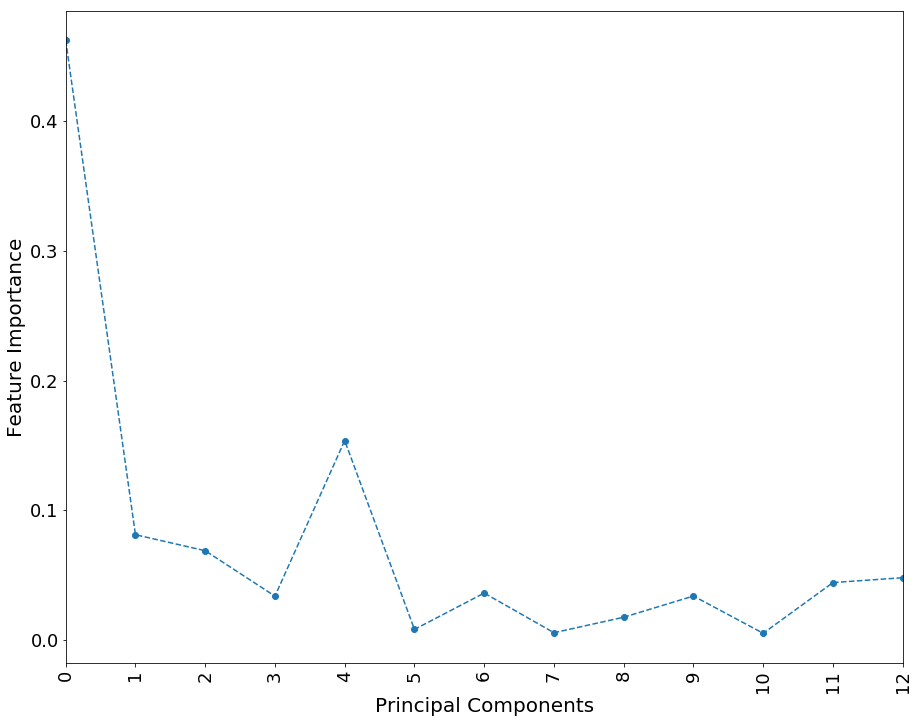

In [139]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [140]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.757658893461

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          753   336     1089
1          184   914     1098
__all__    937  1250     2187

Accuracy of the  AdaBoostClassifier  model for test data is: 0.703703703704

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           78   48      126
1           24   93      117
__all__    102  141      243

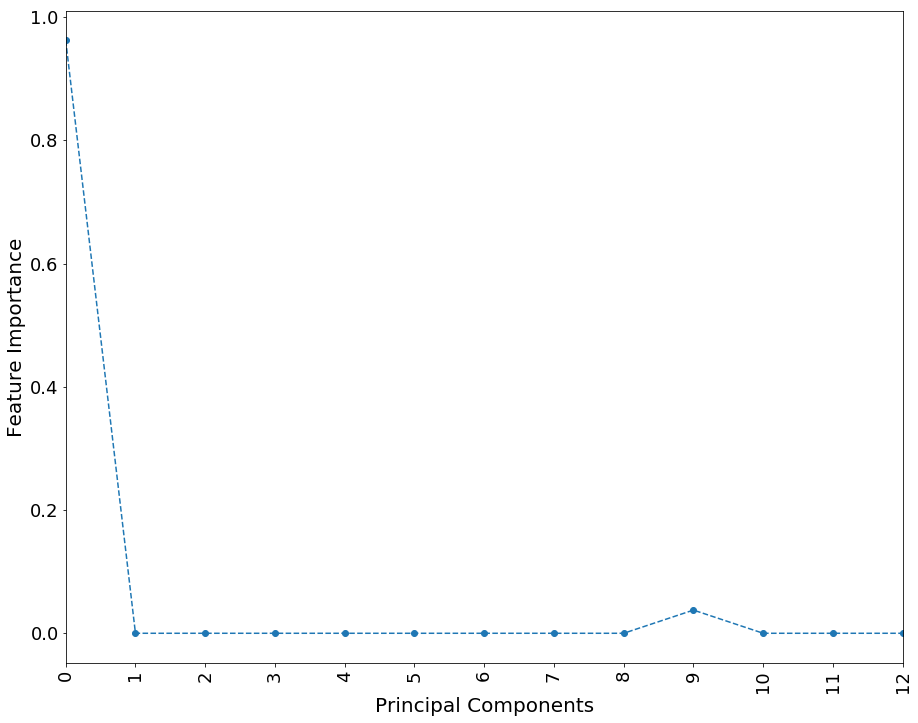

In [142]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_90_50_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_50_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [143]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.763603109282

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          790   299     1089
1          178   920     1098
__all__    968  1219     2187

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.703703703704

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           80   46      126
1           26   91      117
__all__    106  137      243

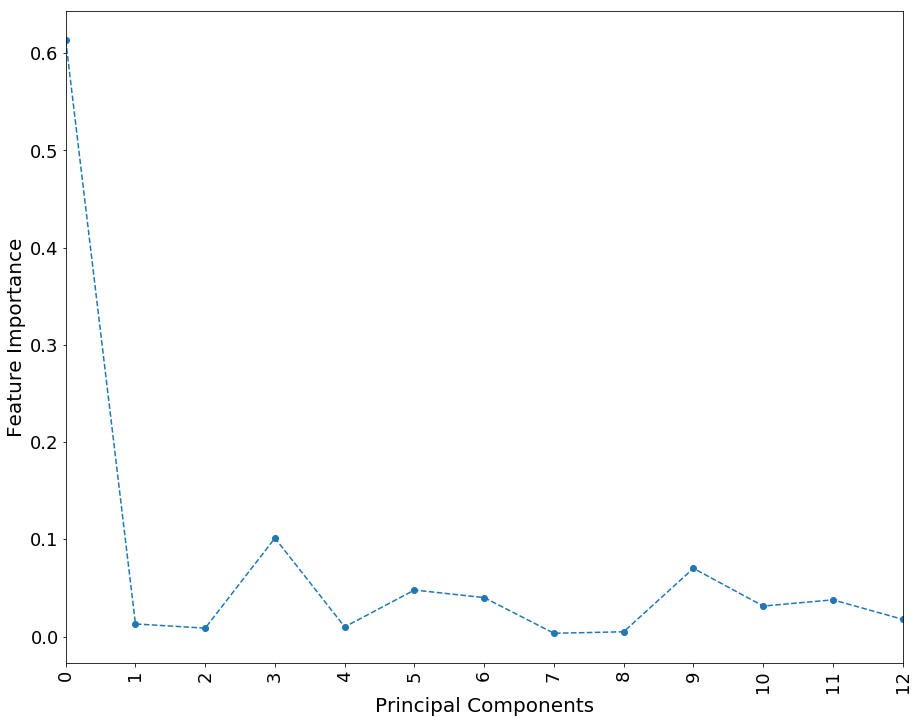

In [144]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_50_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_50_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [145]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.726566072245

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           842   247     1089
1           187   911     1098
__all__    1029  1158     2187

Accuracy of the  Extra Decision Tree  model for test data is: 0.625514403292

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           80   46      126
1           45   72      117
__all__    125  118      243

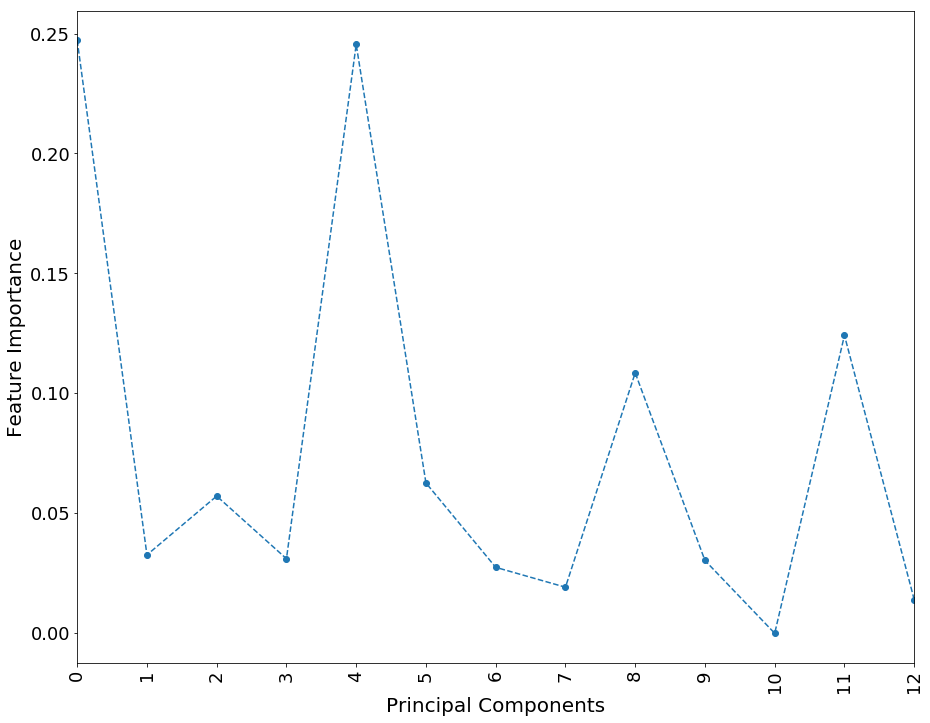

In [146]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=3,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_50_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_50_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [147]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.754458161866

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           967   122     1089
1            62  1036     1098
__all__    1029  1158     2187

Accuracy of the  Bagging  model for test data is: 0.699588477366

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0           80   46      126
1           27   90      117
__all__    107  136      243

In [148]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_50_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_50_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [149]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.787837219936


Predicted    0     1  __all__
Actual                       
0          803   286     1089
1          178   920     1098
__all__    981  1206     2187

The test accuracy is: 0.703703703704


Predicted    0    1  __all__
Actual                      
0           81   45      126
1           27   90      117
__all__    108  135      243

In [150]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_50_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_50_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [151]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.85825331518


Predicted     0     1  __all__
Actual                        
0           939   150     1089
1           160   938     1098
__all__    1099  1088     2187

The accuracy of the model on test data is: 0.716049382716


Predicted    0    1  __all__
Actual                      
0           84   42      126
1           27   90      117
__all__    111  132      243

In [152]:
table_90_50_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_50_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [153]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.7min finished


The accuracy of the model on training data is: 0.783721993599


In [154]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0     1  __all__
Actual                        
0           810   279     1089
1           194   904     1098
__all__    1004  1183     2187

The accuracy of the model on test data is: 0.716049382716


Predicted    0    1  __all__
Actual                      
0           84   42      126
1           27   90      117
__all__    111  132      243

In [155]:
table_90_50_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_50_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [156]:
table_90_50_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_50_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_50_test_PCA.set_index(['index'],drop=True,inplace=True)
table_90_50_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.D.D' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [157]:
print("Comparision Table for Training Accuracies:")
display(table_90_50_train_PCA)

Comparision Table for Training Accuracies:


accuracy      TP     TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.757659   800.0  857.0  232.0  298.0  0.271403   
LogisticRegression          0.760860   845.0  819.0  270.0  253.0  0.230419   
RandomForestClassifier      0.761317   924.0  741.0  348.0  174.0  0.158470   
AdaBoostClassifier          0.762231   914.0  753.0  336.0  184.0  0.167577   
GradientBoostingClassifier  0.781893   920.0  790.0  299.0  178.0  0.162113   
ExtraTreeClassifier         0.801555   911.0  842.0  247.0  187.0  0.170310   
BaggingClassifier           0.915866  1036.0  967.0  122.0   62.0  0.056466   
VotingClassifier            0.787837   920.0  803.0  286.0  178.0  0.162113   
Neural Network-1            0.858253   938.0  939.0  150.0  160.0  0.145719   
Neural-Network-2            0.783722   904.0  810.0  279.0  194.0  0.176685   

                                 FNR  
index                                 
KNeighborsClassifier        0.213039  
LogisticRegression          0.247934  
RandomForestClassifier      0.319559  
AdaBoostClassifier          0.308540  
GradientBoostingClassifier  0.274564  
ExtraTreeClassifier         0.226814  
BaggingClassifier           0.112029  
VotingClassifier            0.262626  
Neural Network-1            0.137741  
Neural-Network-2            0.256198

In [158]:
print("Comparision Table for Test Accuracies:")
display(table_90_50_test_PCA)

Comparision Table for Test Accuracies:


accuracy    TP    TN    FP    FN       FPR  \
index                                                                    
KNeighborsClassifier        0.691358  78.0  90.0  36.0  39.0  0.333333   
LogisticRegression          0.699588  81.0  89.0  37.0  36.0  0.307692   
RandomForestClassifier      0.703704  94.0  77.0  49.0  23.0  0.196581   
AdaBoostClassifier          0.703704  93.0  78.0  48.0  24.0  0.205128   
GradientBoostingClassifier  0.703704  91.0  80.0  46.0  26.0  0.222222   
ExtraTreeClassifier         0.625514  72.0  80.0  46.0  45.0  0.384615   
BaggingClassifier           0.699588  90.0  80.0  46.0  27.0  0.230769   
VotingClassifier            0.703704  90.0  81.0  45.0  27.0  0.230769   
Neural Network-1            0.716049  90.0  84.0  42.0  27.0  0.230769   
Neural-Network-2            0.716049  90.0  84.0  42.0  27.0  0.230769   

                                 FNR  
index                                 
KNeighborsClassifier        0.285714  
LogisticRegression          0.293651  
RandomForestClassifier      0.388889  
AdaBoostClassifier          0.380952  
GradientBoostingClassifier  0.365079  
ExtraTreeClassifier         0.365079  
BaggingClassifier           0.365079  
VotingClassifier            0.357143  
Neural Network-1            0.333333  
Neural-Network-2            0.333333

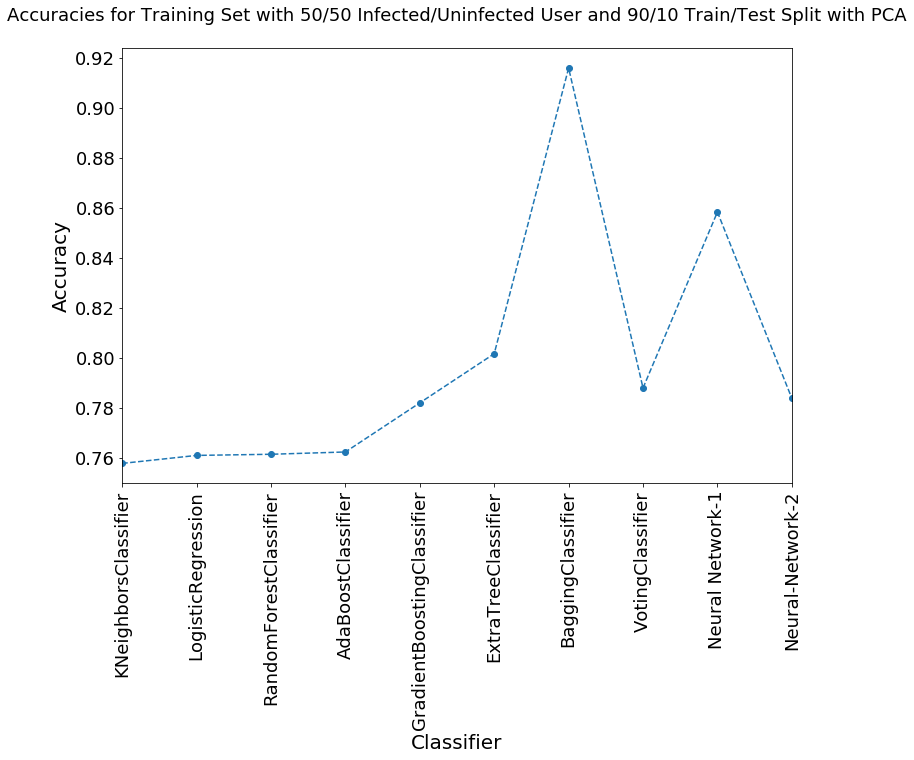

In [159]:
get_accuracy_plot(table_90_50_train_PCA,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

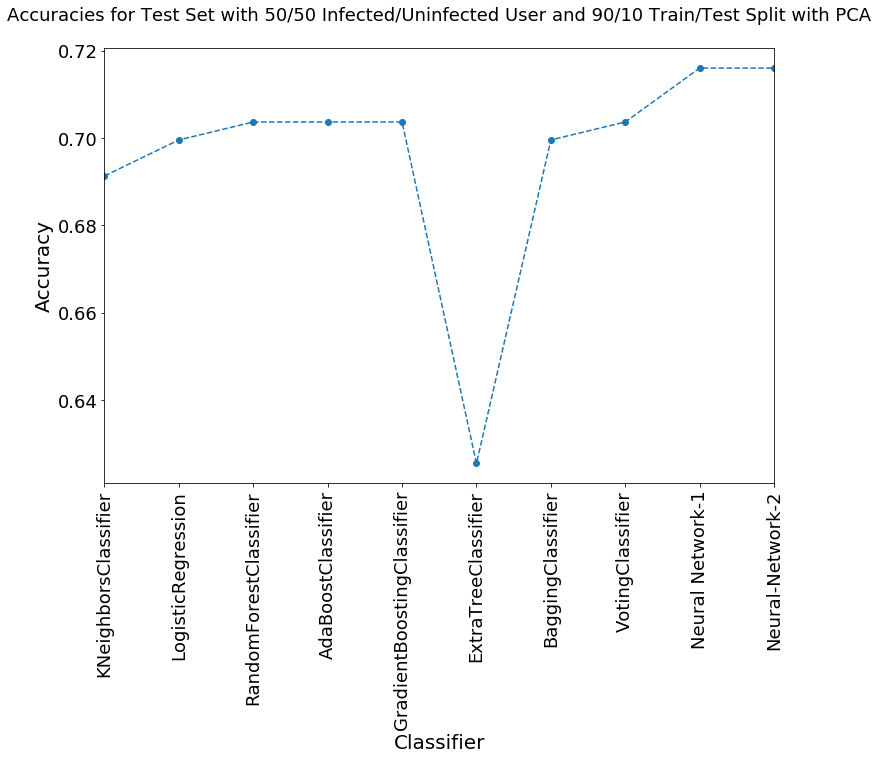

In [160]:
get_accuracy_plot(table_90_50_test_PCA,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

<a id='2' style="text-decoration : none; color : #000000;"><h3>2. 30:70 Infected/Uninfected Users</h3.</a>

In [161]:
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [162]:
z.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Target','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [163]:
z.Target.value_counts()

0    2832
1    1215
Name: Target, dtype: int64

In [164]:
print("The feature vector for infected users and sample of uninfected users")

The feature vector for infected users and sample of uninfected users


In [165]:
z=z.sample(frac=1)
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

Number of Records  \
Source_User                                                             
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                394   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...               2191   

                                                    Average Size of Packets Received  \
Source_User                                                                            
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                         24.654822   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                        104.607942   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                     25.271574   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                     53.599726   

                                                    Average Elapsed Time  \
Source_User                                                                
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...             84.916244   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...            104.247832   

                                                    Average number of Bytes sent  \
Source_User                                                                        
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                   4746.162437   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                   5682.697855   

                                                    Average number of Bytes received  \
Source_User                                                                            
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                      22889.078680   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                     122721.783204   

                                                    Number of different Source Ports  \
Source_User                                                                            
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                             386.0   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                            2018.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                                   11.0   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                                   18.0   

                                                    Number of different Applications  \
Source_User                                                                            
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                                26   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                                42   

                                                    Number of different Source IP  \
Source_User                                                                         
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                             41   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                             16   

                                                    Number of different Destination IP  \
Source_User                                                                              
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                                 134   
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b12...                                 564   

                                                    Average differnce in Received Time  \
Source_User                                                                              
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8...                         6615.939086   
e3a51f940fa7129a71731fa

In [166]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
dbdc1f76c7df38cc2a1e4008ac772ee10117f1a0e9b69e8b663447ab99229eb2    1
e3a51f940fa7129a71731fa6719f2b5873a39e9dab50b1225d6ee03c2520519e    1
b2dcc73cefc45981041058302ce05af8e2b1014c01dd256c3b1e9fbe7f3660e4    0
b2c6f4e4020b005300930022ad7f176ba3bc0a0331415ed6a21250faabcb9fec    0
0fb9a8b4313ab8cb8918cfef1f991bda8ab03548b59af816fa5b5f09346b4d2a    0
d487fb3eaf4e620ba1acd93bfce4387f10e162062f03f15f813c62481bf0a518    1
5f8ba8c614ff6fa703d3325d3634db18200c1c97c1b57217cd393efbef4b056f    0
8309306316e85c430dc7bc8c14bd026a14fdd1a0f57525b0074d1378b33e54d7    1
97b2ac363807aa05c1e700a3675e79713276a634e5dd672fcd5c3098afc48b98    0
2bec92cd5540f918af4ccae596cbd571a05c7a468979a0c47692ecd595a748b4    0
Name: Target, dtype: int64

<a id='2.A' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split</h3.</a>

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [163]:
table_80_75_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_75_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           30  uniform


Accuracy of the  KNN  model for training data is: 0.761507568736

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2039  229     2268
1           490  479      969
__all__    2529  708     3237

Accuracy of the  KNN  model for test data is: 0.741975308642

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          496   68      564
1          141  105      246
__all__    637  173      810

In [166]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_75_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_75_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [167]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.772011121409

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2015  253     2268
1           495  474      969
__all__    2510  727     3237

Accuracy of the  Logistic  model for test data is: 0.756790123457

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          499   65      564
1          132  114      246
__all__    631  179      810

In [168]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_75_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_75_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [169]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.776953969725


Predicted     0    1  __all__
Actual                       
0          1948  320     2268
1           402  567      969
__all__    2350  887     3237

Accuracy of Random Forest Model on test data is: 0.751851851852


Predicted    0    1  __all__
Actual                      
0          472   92      564
1          109  137      246
__all__    581  229      810

In [170]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_75_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_75_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

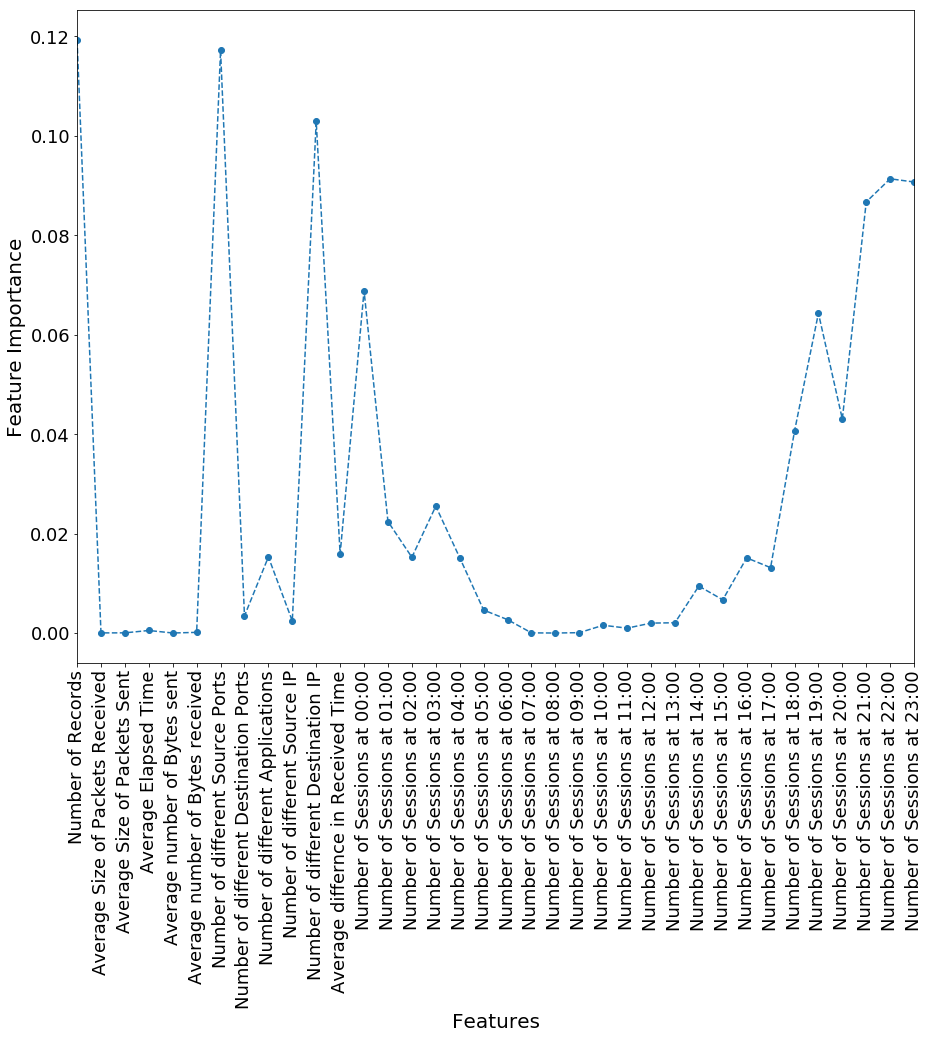

In [171]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [172]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.768612913191

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1972  296     2268
1           406  563      969
__all__    2378  859     3237

Accuracy of the  AdaBoostClassifier  model for test data is: 0.738271604938

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          464  100      564
1          112  134      246
__all__    576  234      810

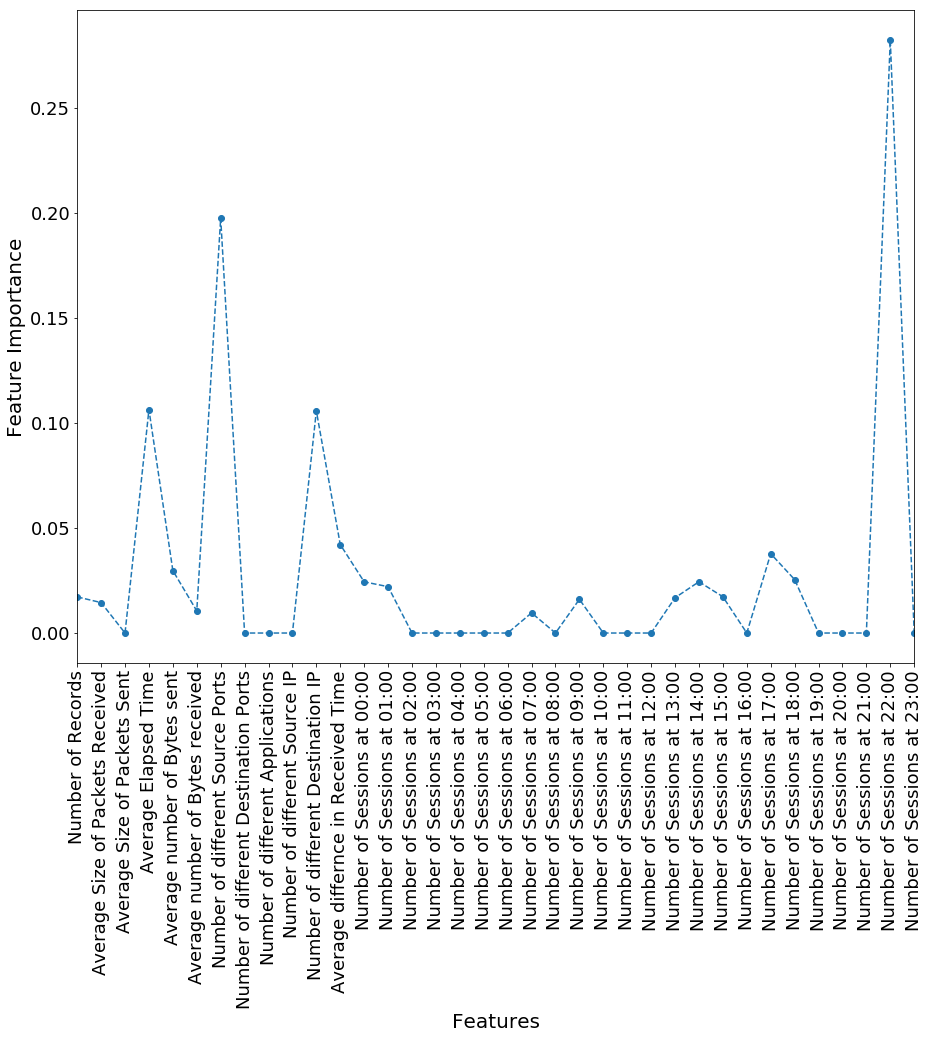

In [173]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_75_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_75_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [174]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.767377201112

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2037  231     2268
1           423  546      969
__all__    2460  777     3237

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.77037037037

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          496   68      564
1          118  128      246
__all__    614  196      810

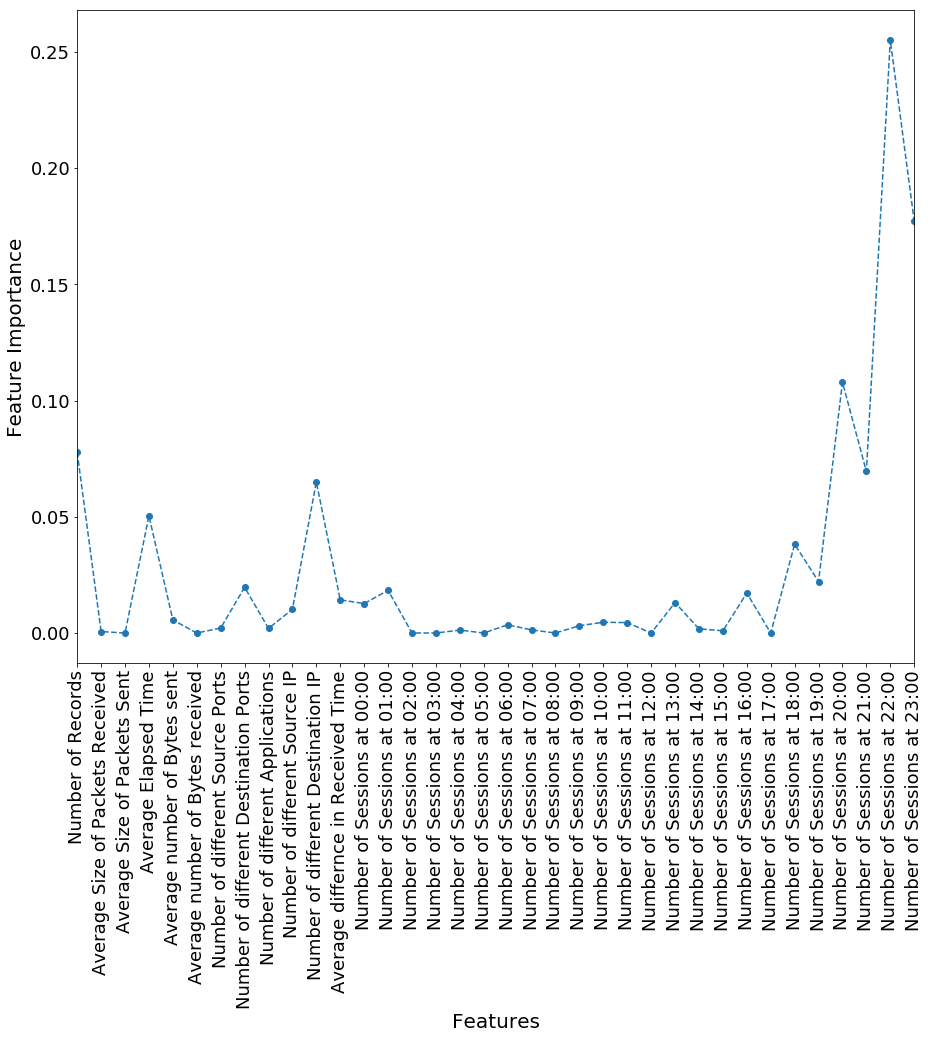

In [175]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_75_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_75_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [176]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.767686129132

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1987  281     2268
1           502  467      969
__all__    2489  748     3237

Accuracy of the  Extra Decision Tree  model for test data is: 0.735802469136

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          485   79      564
1          135  111      246
__all__    620  190      810

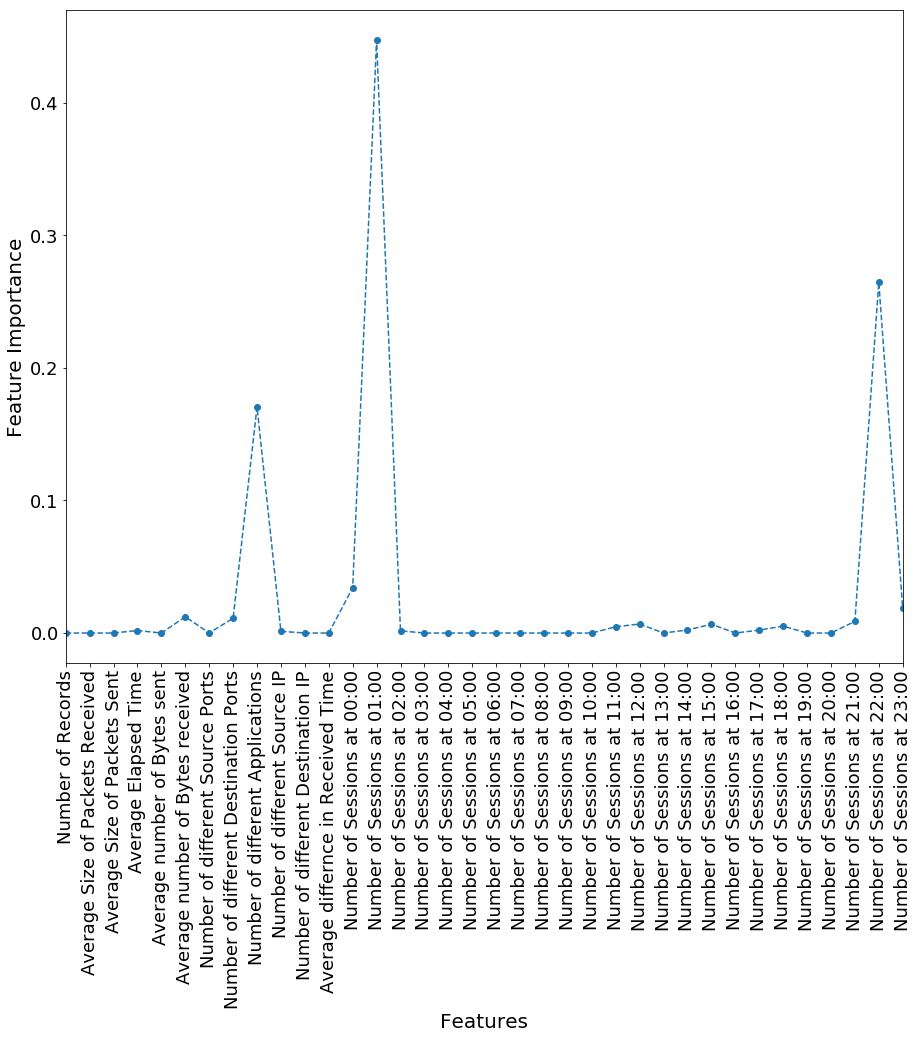

In [177]:
ext_tree=ExtraTreeClassifier(criterion='entropy',max_depth=10,max_features='auto',min_impurity_decrease=0.0001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_75_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_75_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [178]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.4          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.776645041705

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2259    9     2268
1           118  851      969
__all__    2377  860     3237

Accuracy of the  Bagging  model for test data is: 0.774074074074

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          475   89      564
1           94  152      246
__all__    569  241      810

In [179]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_75_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_75_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [180]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.804757491504


Predicted     0    1  __all__
Actual                       
0          2012  256     2268
1           376  593      969
__all__    2388  849     3237

The test accuracy is: 0.764197530864


Predicted    0    1  __all__
Actual                      
0          480   84      564
1          107  139      246
__all__    587  223      810

In [181]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_75_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_75_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [182]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.967871485944


Predicted     0    1  __all__
Actual                       
0          2255   13     2268
1            91  878      969
__all__    2346  891     3237

The accuracy of the model on test data is: 0.734567901235


Predicted    0    1  __all__
Actual                      
0          469   95      564
1          120  126      246
__all__    589  221      810

In [183]:
table_80_75_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_75_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [184]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished


The accuracy of the model on training data is: 0.809082483781


In [185]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0    1  __all__
Actual                       
0          1990  278     2268
1           340  629      969
__all__    2330  907     3237

The accuracy of the model on test data is: 0.753086419753


Predicted    0    1  __all__
Actual                      
0          470   94      564
1          106  140      246
__all__    576  234      810

In [186]:
table_80_75_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_75_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [188]:
table_80_75_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_75_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_75_test.set_index(['index'],drop=True,inplace=True)
table_80_75_train.set_index(['index'],drop=True,inplace=True)

<a id='2.A.A' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [189]:
print("Comparision Table for Training Accuracies:")
display(table_80_75_train)

Comparision Table for Training Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.777881  479.0  2039.0  229.0  490.0  0.505676   
LogisticRegression          0.767686  472.0  2013.0  255.0  497.0  0.512900   
RandomForestClassifier      0.776954  567.0  1948.0  320.0  402.0  0.414861   
AdaBoostClassifier          0.783133  563.0  1972.0  296.0  406.0  0.418989   
GradientBoostingClassifier  0.797961  546.0  2037.0  231.0  423.0  0.436533   
ExtraTreeClassifier         0.768922  717.0  1772.0  496.0  252.0  0.260062   
BaggingClassifier           0.960766  851.0  2259.0    9.0  118.0  0.121775   
VotingClassifier            0.804757  593.0  2012.0  256.0  376.0  0.388029   
Neural Network-1            0.967871  878.0  2255.0   13.0   91.0  0.093911   
Neural-Network-2            0.809082  629.0  1990.0  278.0  340.0  0.350877   

                                 FNR  
index                                 
KNeighborsClassifier        0.100970  
LogisticRegression          0.112434  
RandomForestClassifier      0.141093  
AdaBoostClassifier          0.130511  
GradientBoostingClassifier  0.101852  
ExtraTreeClassifier         0.218695  
BaggingClassifier           0.003968  
VotingClassifier            0.112875  
Neural Network-1            0.005732  
Neural-Network-2            0.122575

In [190]:
print("Comparision Table for Test Accuracies:")
display(table_80_75_test)

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.741975  105.0  496.0   68.0  141.0  0.573171   
LogisticRegression          0.755556  115.0  497.0   67.0  131.0  0.532520   
RandomForestClassifier      0.751852  137.0  472.0   92.0  109.0  0.443089   
AdaBoostClassifier          0.738272  134.0  464.0  100.0  112.0  0.455285   
GradientBoostingClassifier  0.770370  128.0  496.0   68.0  118.0  0.479675   
ExtraTreeClassifier         0.749383  176.0  431.0  133.0   70.0  0.284553   
BaggingClassifier           0.774074  152.0  475.0   89.0   94.0  0.382114   
VotingClassifier            0.764198  139.0  480.0   84.0  107.0  0.434959   
Neural Network-1            0.734568  126.0  469.0   95.0  120.0  0.487805   
Neural-Network-2            0.753086  140.0  470.0   94.0  106.0  0.430894   

                                 FNR  
index                                 
KNeighborsClassifier        0.120567  
LogisticRegression          0.118794  
RandomForestClassifier      0.163121  
AdaBoostClassifier          0.177305  
GradientBoostingClassifier  0.120567  
ExtraTreeClassifier         0.235816  
BaggingClassifier           0.157801  
VotingClassifier            0.148936  
Neural Network-1            0.168440  
Neural-Network-2            0.166667

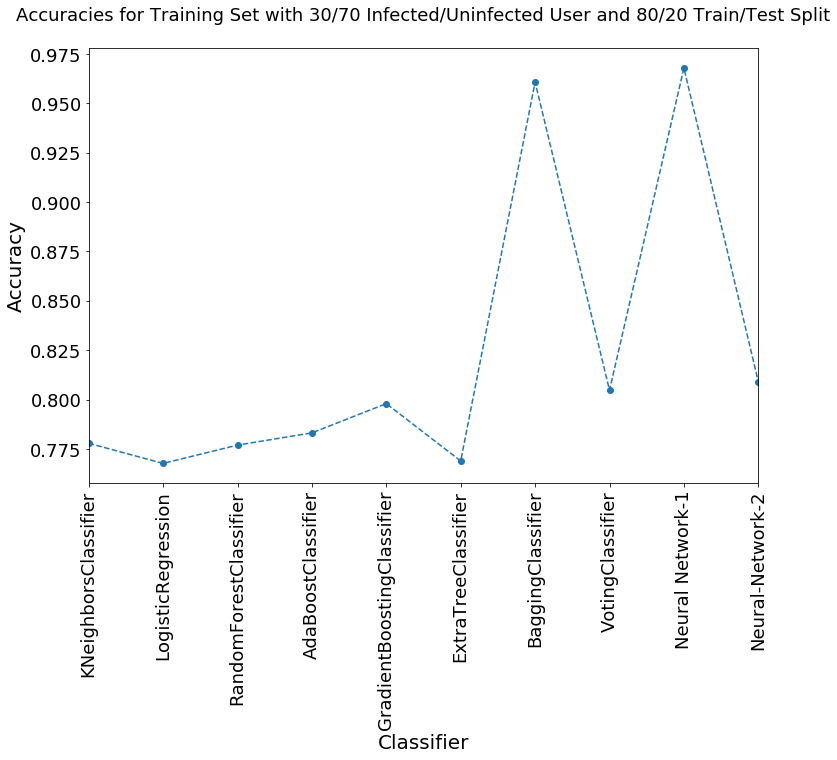

In [191]:
get_accuracy_plot(table_80_75_train,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split')

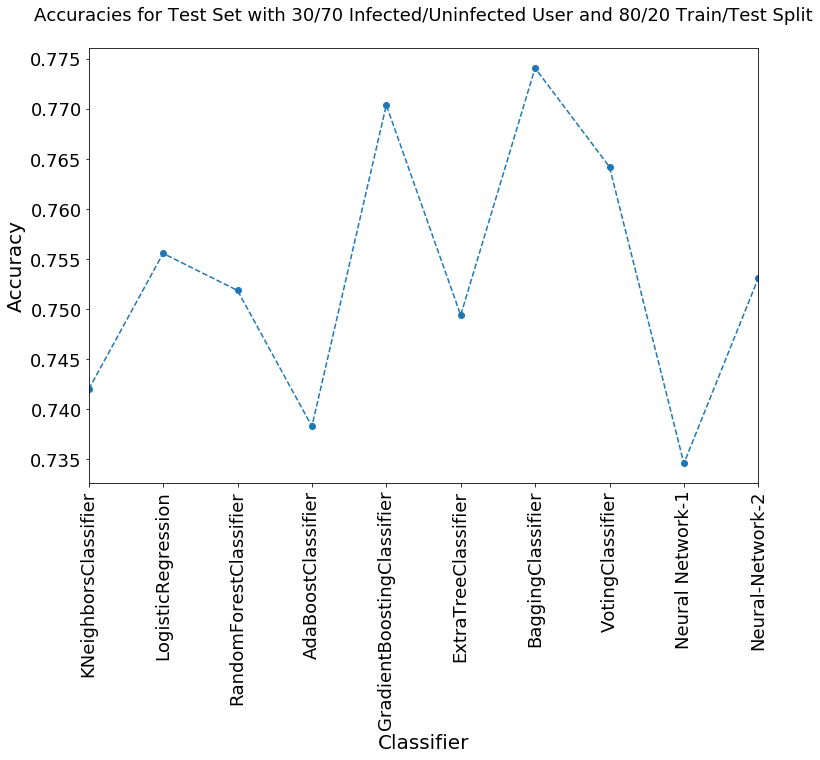

In [192]:
get_accuracy_plot(table_80_75_test,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split')

<a id='2.B' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split with PCA</h3.</a>

In [193]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

Variance explained using 13 components is: 0.915033450989
The train/test split ratio is 80:20


In [197]:
table_80_75_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_75_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           20  distance


Accuracy of the  KNN  model for training data is: 0.755329008341

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2268    0     2268
1             0  969      969
__all__    2268  969     3237

Accuracy of the  KNN  model for test data is: 0.741975308642

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          502   62      564
1          147   99      246
__all__    649  161      810

In [198]:
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_75_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_75_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [199]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05


Accuracy of the  Logistic  model for training data is: 0.77015755329

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2003  265     2268
1           477  492      969
__all__    2480  757     3237

Accuracy of the  Logistic  model for test data is: 0.750617283951

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          490   74      564
1          128  118      246
__all__    618  192      810

In [200]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='multinomial',penalty='l2',solver='newton-cg',tol=1e-5)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_75_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_75_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [201]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.736793327155


Predicted     0    1  __all__
Actual                       
0          2189   79     2268
1           773  196      969
__all__    2962  275     3237

Accuracy of Random Forest Model on test data is: 0.723456790123


Predicted    0   1  __all__
Actual                     
0          537  27      564
1          197  49      246
__all__    734  76      810

In [202]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_75_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_75_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

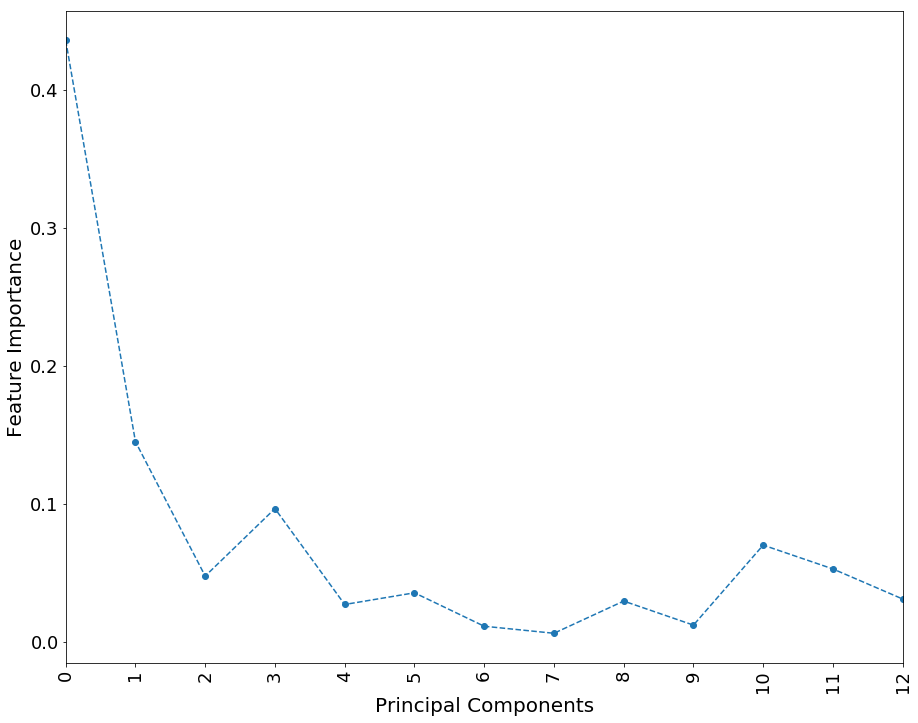

In [203]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [204]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.767068273092

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1780   488     2268
1           264   705      969
__all__    2044  1193     3237

Accuracy of the  AdaBoostClassifier  model for test data is: 0.745679012346

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          435  129      564
1           77  169      246
__all__    512  298      810

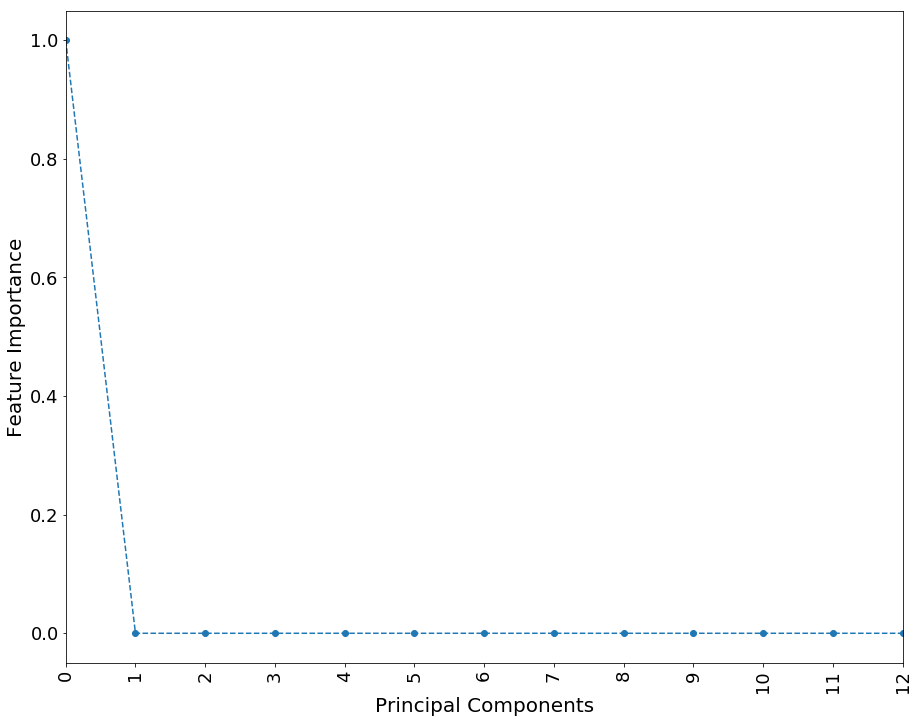

In [205]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_75_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_75_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [206]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.776953969725

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1973  295     2268
1           371  598      969
__all__    2344  893     3237

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.758024691358

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          479   85      564
1          111  135      246
__all__    590  220      810

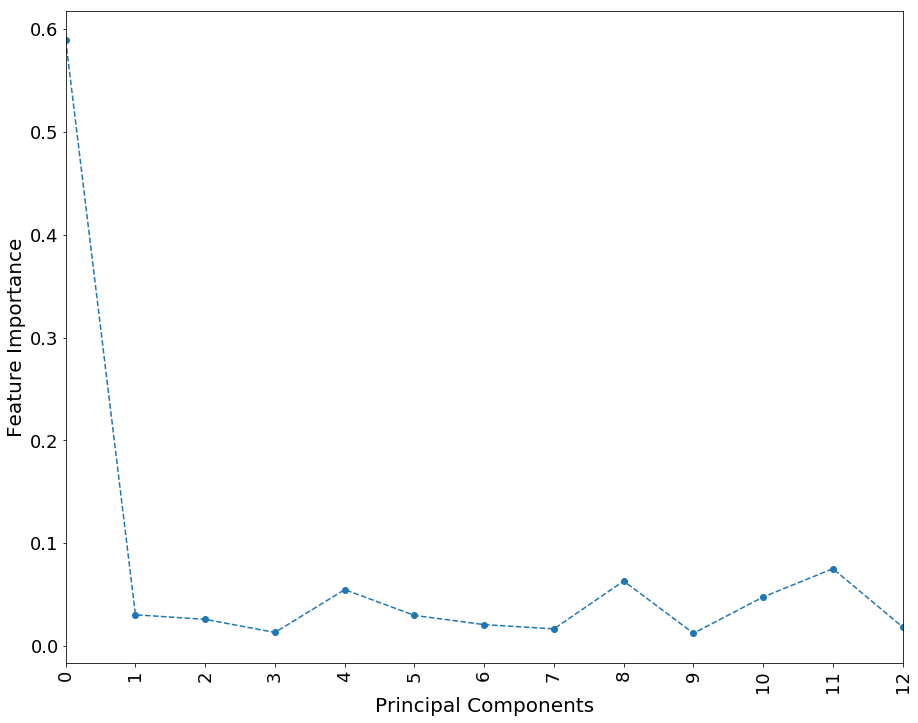

In [207]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_75_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_75_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [208]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.759345072598

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1988  280     2268
1           413  556      969
__all__    2401  836     3237

Accuracy of the  Extra Decision Tree  model for test data is: 0.73950617284

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          474   90      564
1          121  125      246
__all__    595  215      810

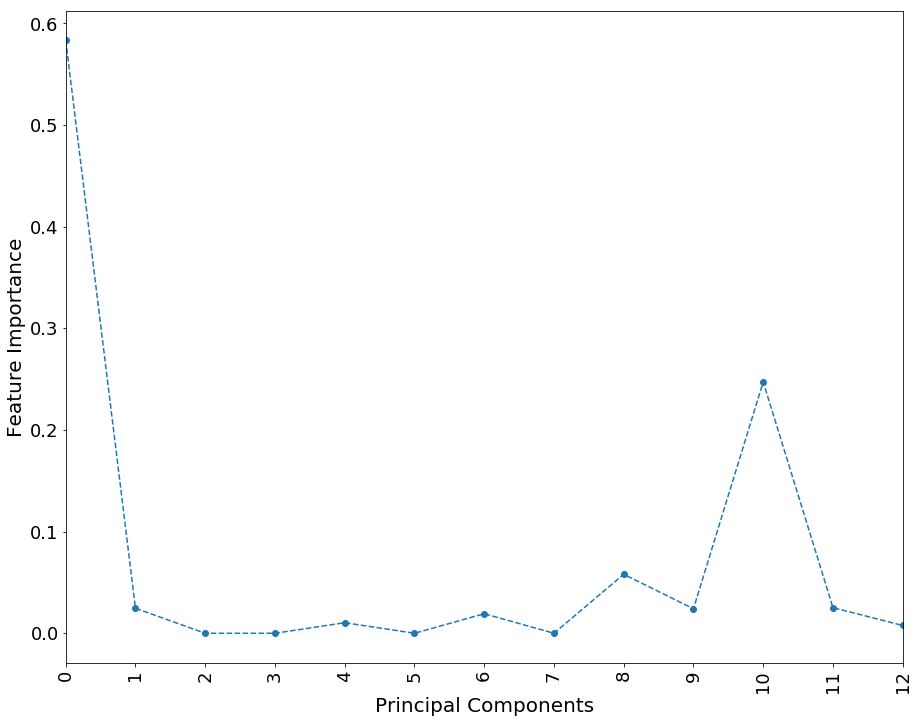

In [209]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_75_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_75_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [210]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.4          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.764905776954

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2265    3     2268
1           112  857      969
__all__    2377  860     3237

Accuracy of the  Bagging  model for test data is: 0.745679012346

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          502   62      564
1          144  102      246
__all__    646  164      810

In [211]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_75_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_75_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [212]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.815878900216


Predicted     0    1  __all__
Actual                       
0          2061  207     2268
1           389  580      969
__all__    2450  787     3237

The test accuracy is: 0.759259259259


Predicted    0    1  __all__
Actual                      
0          498   66      564
1          129  117      246
__all__    627  183      810

In [213]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_75_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_75_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [214]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.870868087754


Predicted     0    1  __all__
Actual                       
0          2054  214     2268
1           204  765      969
__all__    2258  979     3237

The accuracy of the model on test data is: 0.737037037037


Predicted    0    1  __all__
Actual                      
0          462  102      564
1          111  135      246
__all__    573  237      810

In [215]:
table_80_75_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_75_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [216]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.9min finished


The accuracy of the model on training data is: 0.79765214705


In [217]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0    1  __all__
Actual                       
0          1997  271     2268
1           384  585      969
__all__    2381  856     3237

The accuracy of the model on test data is: 0.758024691358


Predicted    0    1  __all__
Actual                      
0          477   87      564
1          109  137      246
__all__    586  224      810

In [218]:
table_80_75_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_75_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [219]:
table_80_75_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_75_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_75_test_PCA.set_index(['index'],drop=True,inplace=True)
table_80_75_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='2.B.B' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [220]:
print("Comparision Table for Training Accuracies:")
display(table_80_75_train_PCA)

Comparision Table for Training Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.772011  390.0  2109.0  159.0  579.0  0.597523   
LogisticRegression          0.770775  492.0  2003.0  265.0  477.0  0.492260   
RandomForestClassifier      0.736793  196.0  2189.0   79.0  773.0  0.797730   
AdaBoostClassifier          0.767686  705.0  1780.0  488.0  264.0  0.272446   
GradientBoostingClassifier  0.794254  598.0  1973.0  295.0  371.0  0.382869   
ExtraTreeClassifier         0.785913  556.0  1988.0  280.0  413.0  0.426213   
BaggingClassifier           0.964473  857.0  2265.0    3.0  112.0  0.115583   
VotingClassifier            0.815879  580.0  2061.0  207.0  389.0  0.401445   
Neural Network-1            0.870868  765.0  2054.0  214.0  204.0  0.210526   
Neural-Network-2            0.797652  585.0  1997.0  271.0  384.0  0.396285   

                                 FNR  
index                                 
KNeighborsClassifier        0.070106  
LogisticRegression          0.116843  
RandomForestClassifier      0.034832  
AdaBoostClassifier          0.215168  
GradientBoostingClassifier  0.130071  
ExtraTreeClassifier         0.123457  
BaggingClassifier           0.001323  
VotingClassifier            0.091270  
Neural Network-1            0.094356  
Neural-Network-2            0.119489

In [221]:
print("Comparision Table for Test Accuracies:")
display(table_80_75_test_PCA)

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.738272   84.0  514.0   50.0  162.0  0.658537   
LogisticRegression          0.750617  118.0  490.0   74.0  128.0  0.520325   
RandomForestClassifier      0.723457   49.0  537.0   27.0  197.0  0.800813   
AdaBoostClassifier          0.745679  169.0  435.0  129.0   77.0  0.313008   
GradientBoostingClassifier  0.758025  135.0  479.0   85.0  111.0  0.451220   
ExtraTreeClassifier         0.739506  125.0  474.0   90.0  121.0  0.491870   
BaggingClassifier           0.745679  102.0  502.0   62.0  144.0  0.585366   
VotingClassifier            0.759259  117.0  498.0   66.0  129.0  0.524390   
Neural Network-1            0.737037  135.0  462.0  102.0  111.0  0.451220   
Neural-Network-2            0.758025  137.0  477.0   87.0  109.0  0.443089   

                                 FNR  
index                                 
KNeighborsClassifier        0.088652  
LogisticRegression          0.131206  
RandomForestClassifier      0.047872  
AdaBoostClassifier          0.228723  
GradientBoostingClassifier  0.150709  
ExtraTreeClassifier         0.159574  
BaggingClassifier           0.109929  
VotingClassifier            0.117021  
Neural Network-1            0.180851  
Neural-Network-2            0.154255

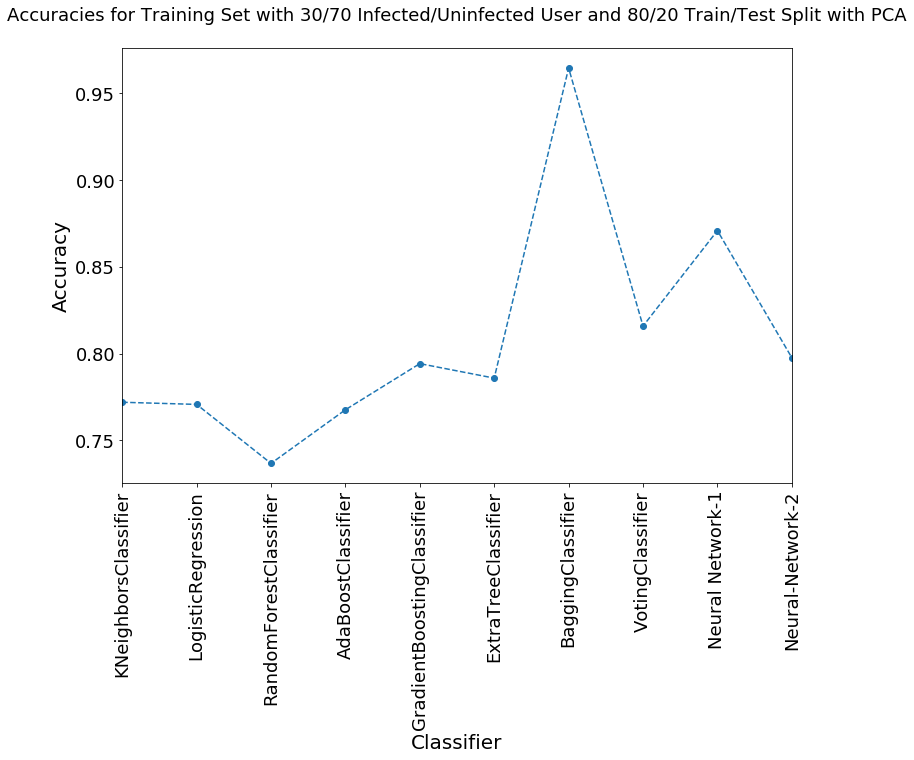

In [223]:
get_accuracy_plot(table_80_75_train_PCA,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

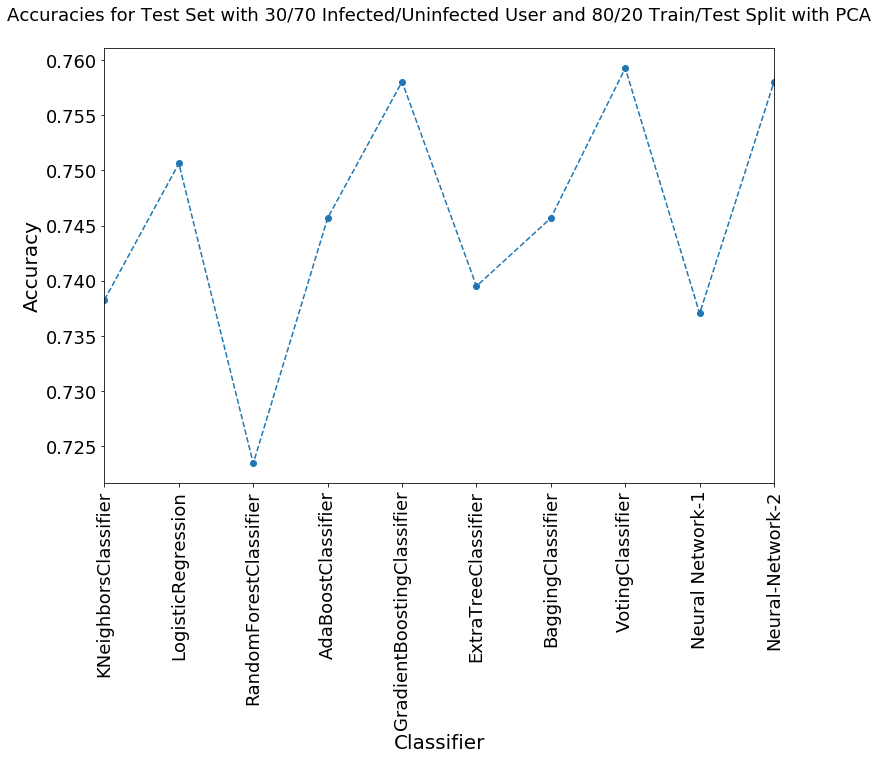

In [224]:
get_accuracy_plot(table_80_75_test_PCA,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

<a id='2.C' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split</h3.</a>

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [252]:
table_70_75_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_75_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto         10  chebyshev           30  uniform


Accuracy of the  KNN  model for training data is: 0.752824858757

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1778  208     1986
1           441  405      846
__all__    2219  613     2832

Accuracy of the  KNN  model for test data is: 0.762962962963

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          761   85      846
1          203  166      369
__all__    964  251     1215

In [210]:
knn=KNeighborsClassifier(n_neighbors=10,weights='uniform',leaf_size=2,metric='chebyshev',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_75_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_75_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [171]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.767302259887

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1748  238     1986
1           419  427      846
__all__    2167  665     2832

Accuracy of the  Logistic  model for test data is: 0.762962962963

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          758   88      846
1          200  169      369
__all__    958  257     1215

In [211]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_75_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_75_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [173]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.770833333333


Predicted     0    1  __all__
Actual                       
0          1697  289     1986
1           360  486      846
__all__    2057  775     2832

Accuracy of Random Forest Model on test data is: 0.772839506173


Predicted    0    1  __all__
Actual                      
0          742  104      846
1          172  197      369
__all__    914  301     1215

In [212]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_75_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_75_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

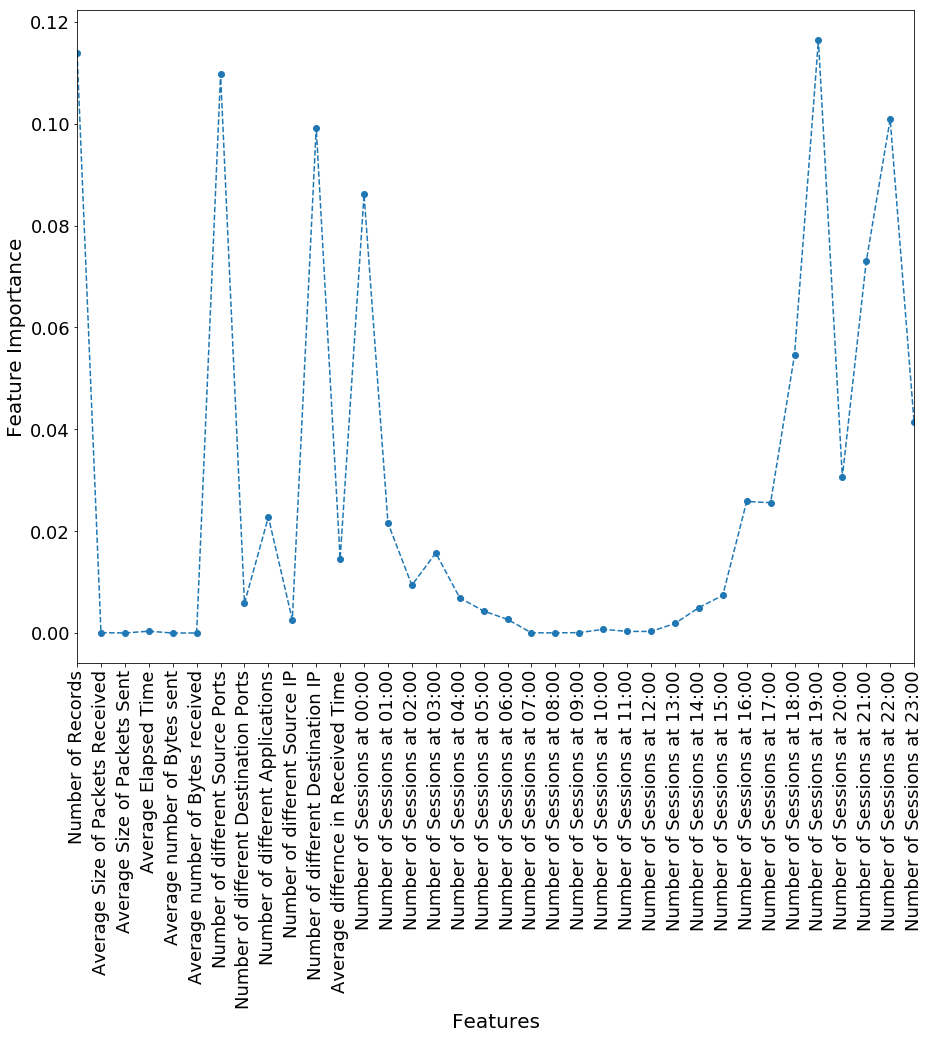

In [199]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [176]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R              1            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.763771186441

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1728  258     1986
1           313  533      846
__all__    2041  791     2832

Accuracy of the  AdaBoostClassifier  model for test data is: 0.748148148148

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          721  125      846
1          181  188      369
__all__    902  313     1215

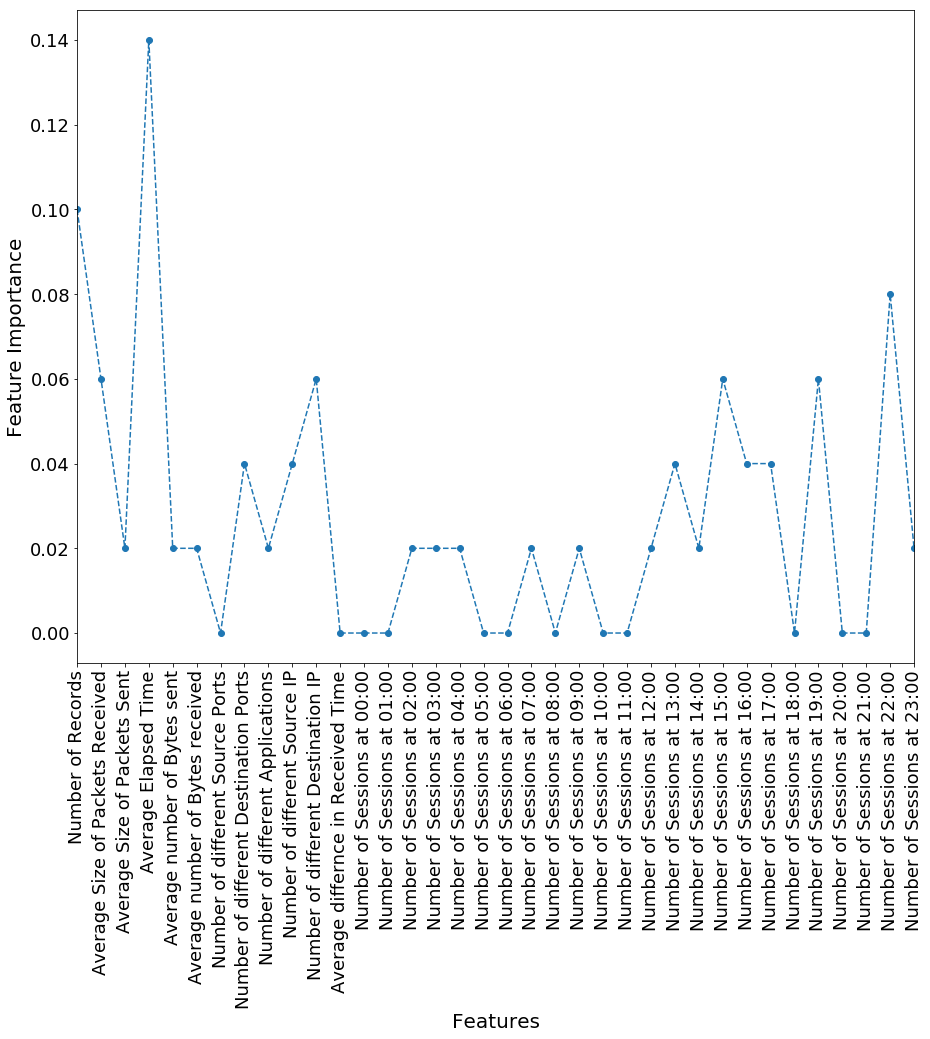

In [213]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_75_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_75_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [178]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.766949152542

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1788  198     1986
1           391  455      846
__all__    2179  653     2832

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.776131687243

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          754   92      846
1          180  189      369
__all__    934  281     1215

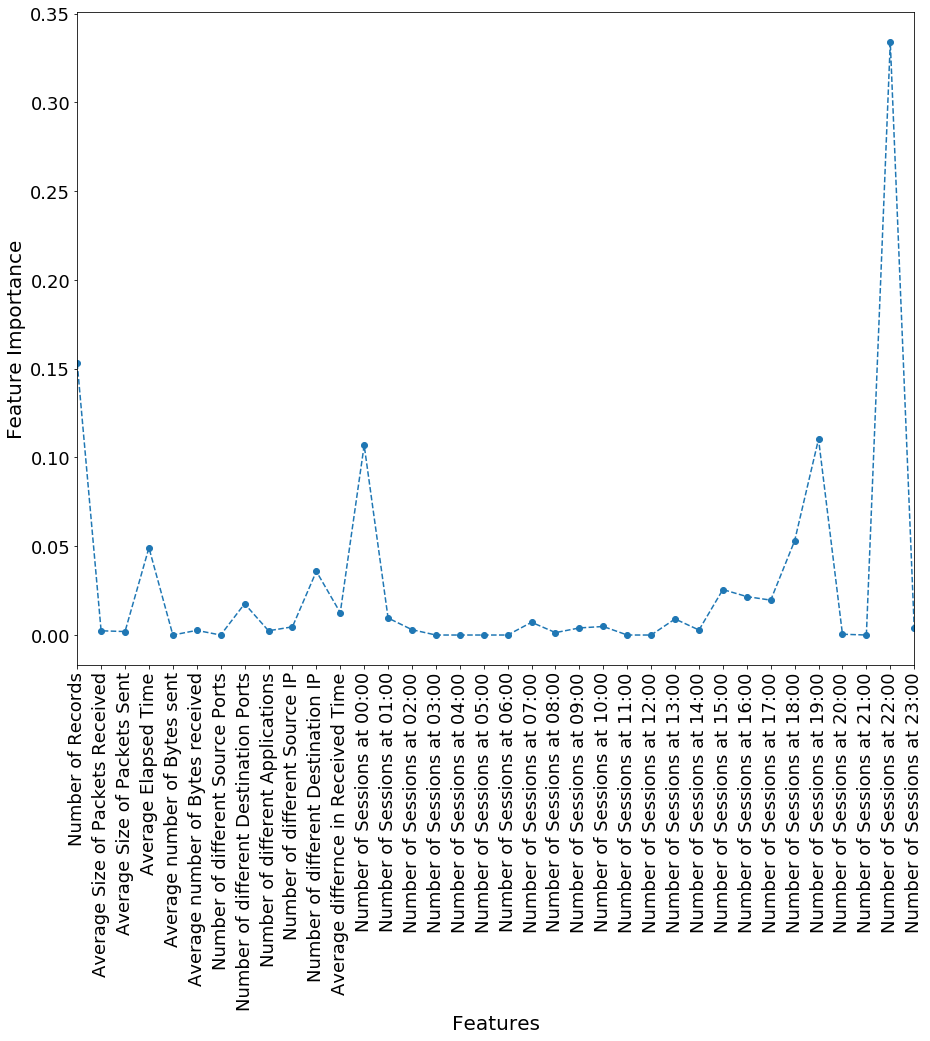

In [214]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_75_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_75_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [180]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.757768361582

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1759  227     1986
1           422  424      846
__all__    2181  651     2832

Accuracy of the  Extra Decision Tree  model for test data is: 0.759670781893

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          754   92      846
1          200  169      369
__all__    954  261     1215

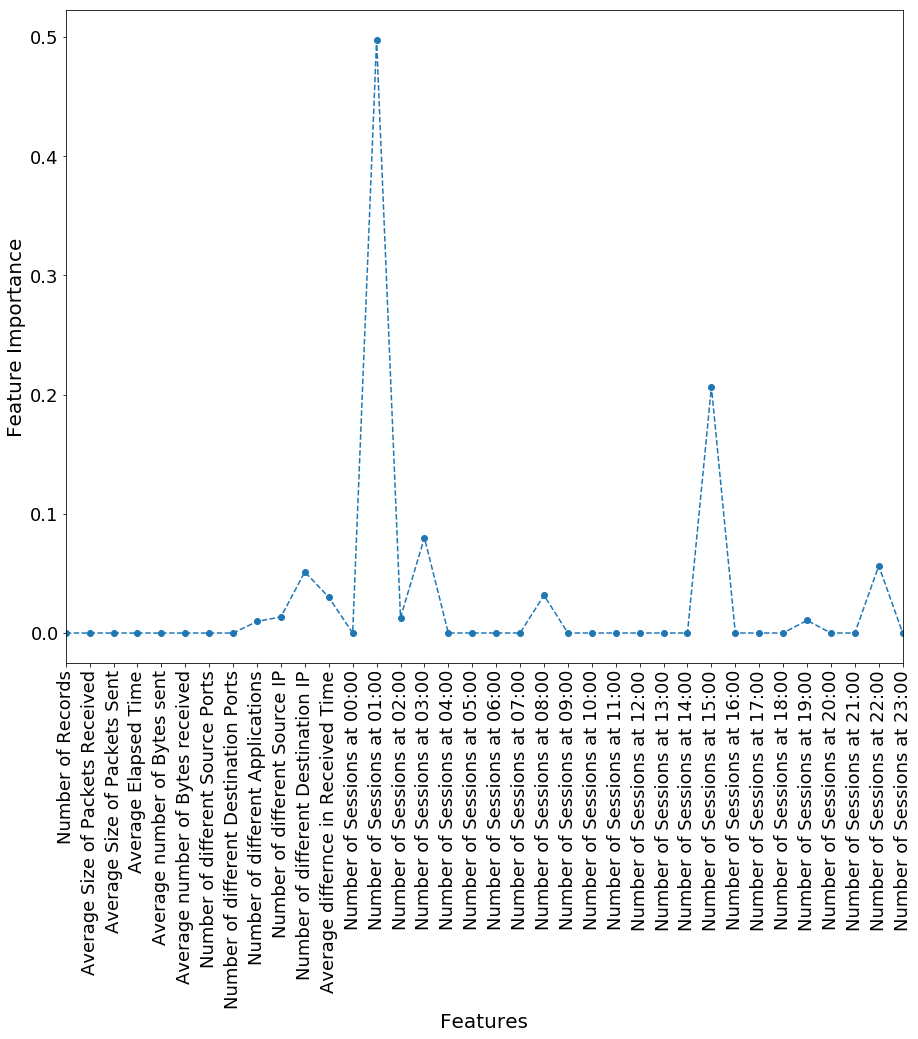

In [215]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_70_75_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_75_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [182]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.771186440678

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1943   43     1986
1           152  694      846
__all__    2095  737     2832

Accuracy of the  Bagging  model for test data is: 0.781893004115

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          735  111      846
1          154  215      369
__all__    889  326     1215

In [216]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_70_75_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_75_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [204]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.807556497175


Predicted     0    1  __all__
Actual                       
0          1792  194     1986
1           351  495      846
__all__    2143  689     2832

The test accuracy is: 0.771193415638


Predicted    0    1  __all__
Actual                      
0          748   98      846
1          180  189      369
__all__    928  287     1215

In [217]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_75_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_75_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [186]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.967161016949


Predicted     0    1  __all__
Actual                       
0          1971   15     1986
1            78  768      846
__all__    2049  783     2832

The accuracy of the model on test data is: 0.733333333333


Predicted    0    1  __all__
Actual                      
0          739  107      846
1          217  152      369
__all__    956  259     1215

In [218]:
table_70_75_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_75_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [188]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.6min finished


The accuracy of the model on training data is: 0.813559322034


In [189]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0    1  __all__
Actual                       
0          1659  327     1986
1           201  645      846
__all__    1860  972     2832

The accuracy of the model on test data is: 0.76378600823


Predicted    0    1  __all__
Actual                      
0          684  162      846
1          125  244      369
__all__    809  406     1215

In [219]:
table_70_75_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_75_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [220]:
table_70_75_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_75_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_75_test.set_index(['index'],drop=True,inplace=True)
table_70_75_train.set_index(['index'],drop=True,inplace=True)

<a id='2.C.C' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [221]:
print("Comparision Table for Training Accuracies:")
display(table_70_75_train)

Comparision Table for Training Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.785664  405.0  1820.0  166.0  441.0  0.521277   
LogisticRegression          0.768362  425.0  1751.0  235.0  421.0  0.497636   
RandomForestClassifier      0.770833  486.0  1697.0  289.0  360.0  0.425532   
AdaBoostClassifier          0.798376  533.0  1728.0  258.0  313.0  0.369976   
GradientBoostingClassifier  0.792020  455.0  1788.0  198.0  391.0  0.462175   
ExtraTreeClassifier         0.770833  424.0  1759.0  227.0  422.0  0.498818   
BaggingClassifier           0.931144  694.0  1943.0   43.0  152.0  0.179669   
VotingClassifier            0.807556  495.0  1792.0  194.0  351.0  0.414894   
Neural Network-1            0.967161  768.0  1971.0   15.0   78.0  0.092199   
Neural-Network-2            0.813559  645.0  1659.0  327.0  201.0  0.237589   

                                 FNR  
index                                 
KNeighborsClassifier        0.083585  
LogisticRegression          0.118328  
RandomForestClassifier      0.145519  
AdaBoostClassifier          0.129909  
GradientBoostingClassifier  0.099698  
ExtraTreeClassifier         0.114300  
BaggingClassifier           0.021652  
VotingClassifier            0.097684  
Neural Network-1            0.007553  
Neural-Network-2            0.164653

In [222]:
print("Comparision Table for Test Accuracies:")
display(table_70_75_test)

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.736626  144.0  751.0   95.0  225.0  0.609756   
LogisticRegression          0.764609  169.0  760.0   86.0  200.0  0.542005   
RandomForestClassifier      0.772840  197.0  742.0  104.0  172.0  0.466125   
AdaBoostClassifier          0.748148  188.0  721.0  125.0  181.0  0.490515   
GradientBoostingClassifier  0.776132  189.0  754.0   92.0  180.0  0.487805   
ExtraTreeClassifier         0.759671  169.0  754.0   92.0  200.0  0.542005   
BaggingClassifier           0.781893  215.0  735.0  111.0  154.0  0.417344   
VotingClassifier            0.771193  189.0  748.0   98.0  180.0  0.487805   
Neural Network-1            0.733333  152.0  739.0  107.0  217.0  0.588076   
Neural-Network-2            0.763786  244.0  684.0  162.0  125.0  0.338753   

                                 FNR  
index                                 
KNeighborsClassifier        0.112293  
LogisticRegression          0.101655  
RandomForestClassifier      0.122931  
AdaBoostClassifier          0.147754  
GradientBoostingClassifier  0.108747  
ExtraTreeClassifier         0.108747  
BaggingClassifier           0.131206  
VotingClassifier            0.115839  
Neural Network-1            0.126478  
Neural-Network-2            0.191489

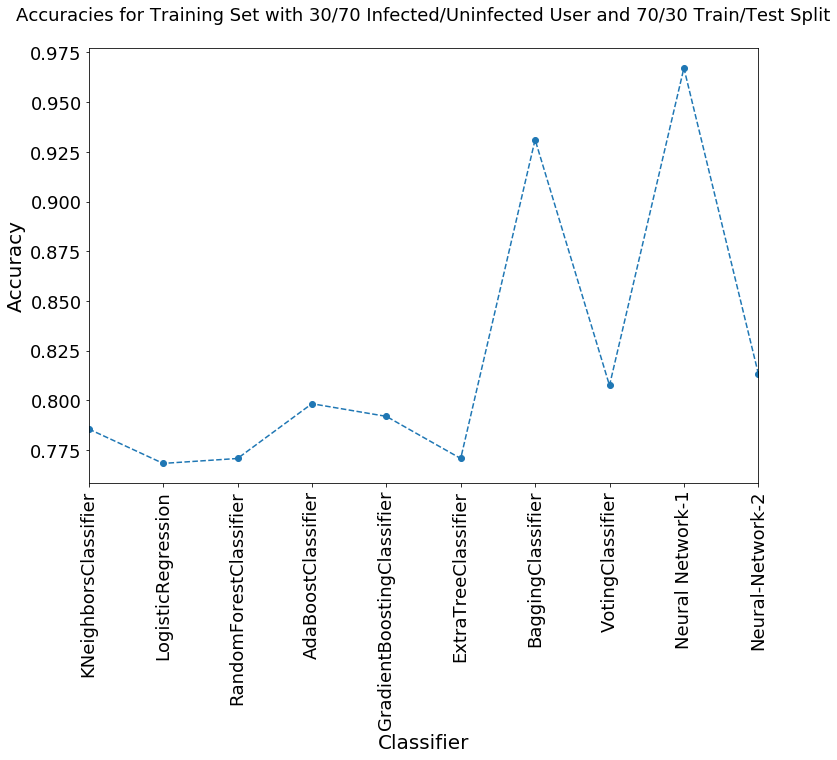

In [223]:
get_accuracy_plot(table_70_75_train,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split')

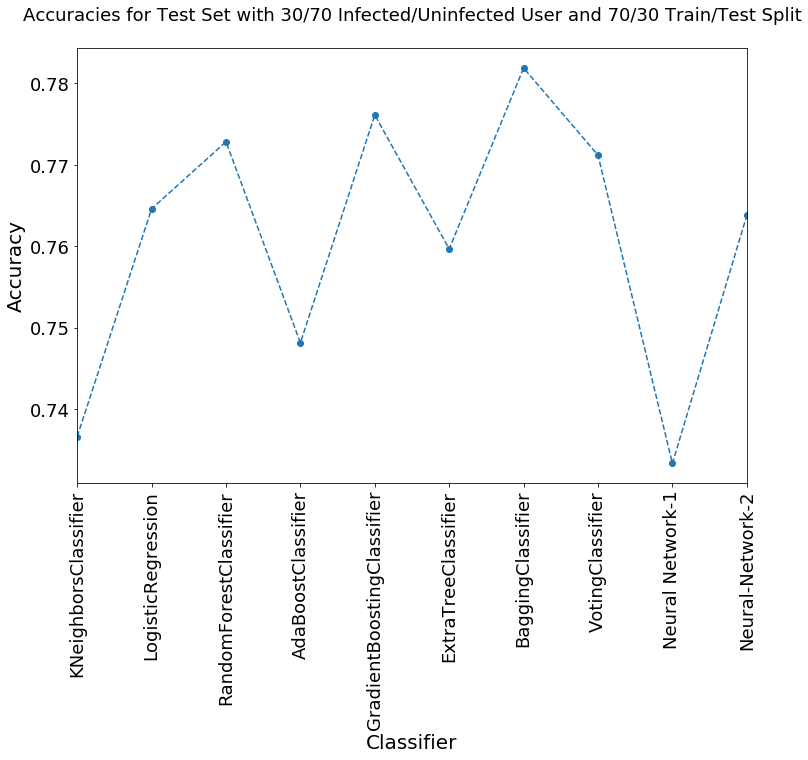

In [224]:
get_accuracy_plot(table_70_75_test,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split')

<a id='2.D' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split with PCA</h3.</a>

In [225]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

Variance explained using 13 components is: 0.915033450989
The train/test split ratio is 70:30


In [258]:
table_70_75_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_75_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [229]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance


Accuracy of the  KNN  model for training data is: 0.753531073446

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1986    0     1986
1             0  846      846
__all__    1986  846     2832

Accuracy of the  KNN  model for test data is: 0.759670781893

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0           778   68      846
1           224  145      369
__all__    1002  213     1215

In [259]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_75_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_75_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [231]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05


Accuracy of the  Logistic  model for training data is: 0.763064971751

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1755  231     1986
1           433  413      846
__all__    2188  644     2832

Accuracy of the  Logistic  model for test data is: 0.767901234568

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          763   83      846
1          199  170      369
__all__    962  253     1215

In [260]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='multinomial',penalty='l2',solver='newton-cg',tol=1e-5)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_75_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_75_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [233]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.729872881356


Predicted     0    1  __all__
Actual                       
0          1918   68     1986
1           697  149      846
__all__    2615  217     2832

Accuracy of Random Forest Model on test data is: 0.715226337449


Predicted     0   1  __all__
Actual                      
0           823  23      846
1           323  46      369
__all__    1146  69     1215

In [261]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_75_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_75_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

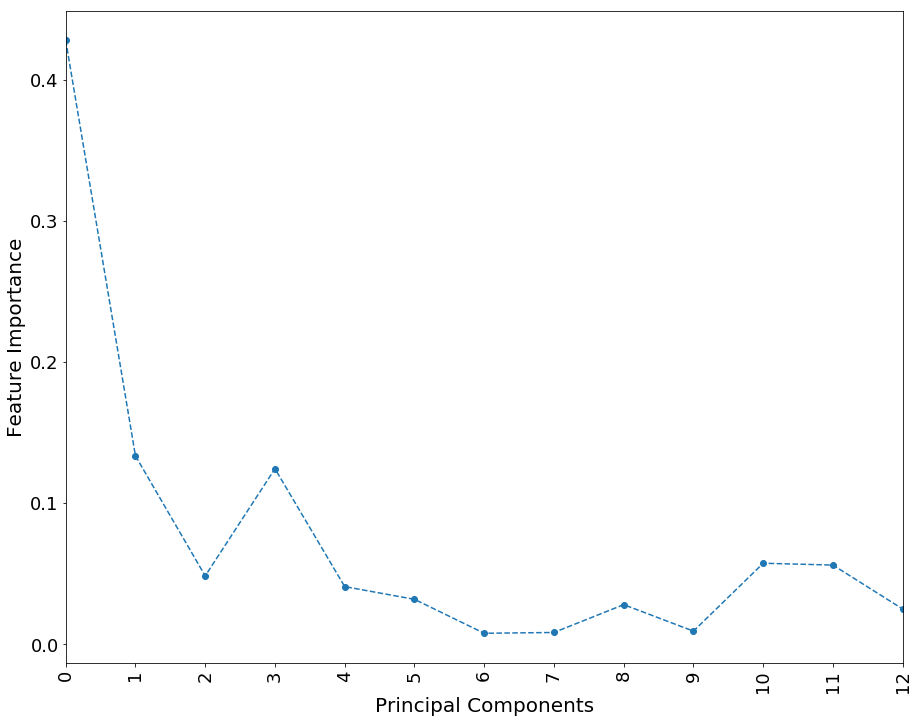

In [235]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [236]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.766596045198

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1722  264     1986
1           323  523      846
__all__    2045  787     2832

Accuracy of the  AdaBoostClassifier  model for test data is: 0.768724279835

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          724  122      846
1          159  210      369
__all__    883  332     1215

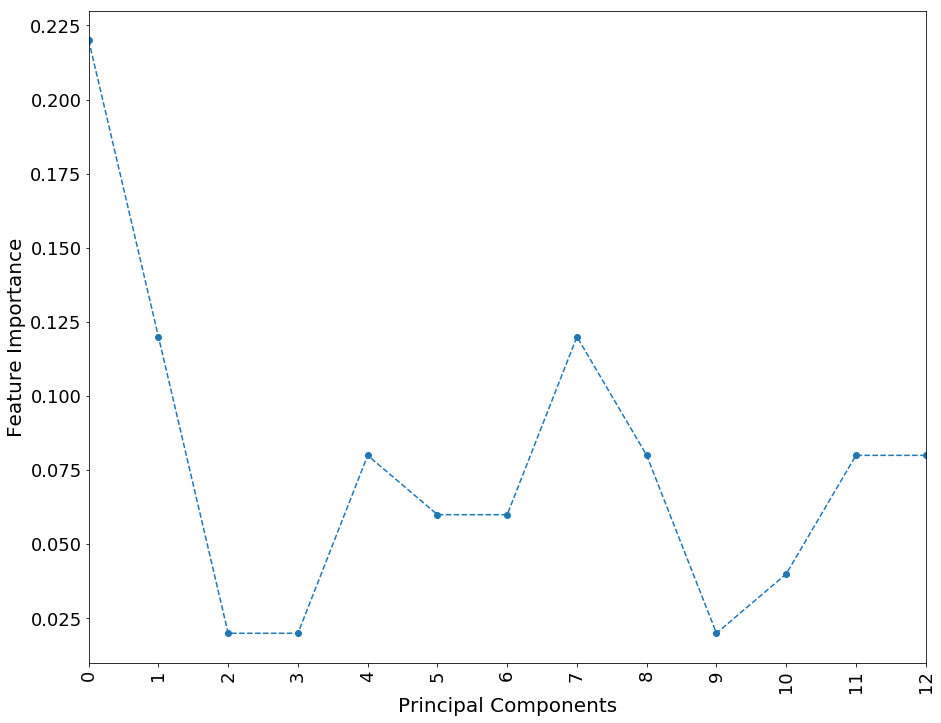

In [262]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_75_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_75_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [238]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           200             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.770127118644

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1763  223     1986
1           311  535      846
__all__    2074  758     2832

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.772016460905

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          746  100      846
1          177  192      369
__all__    923  292     1215

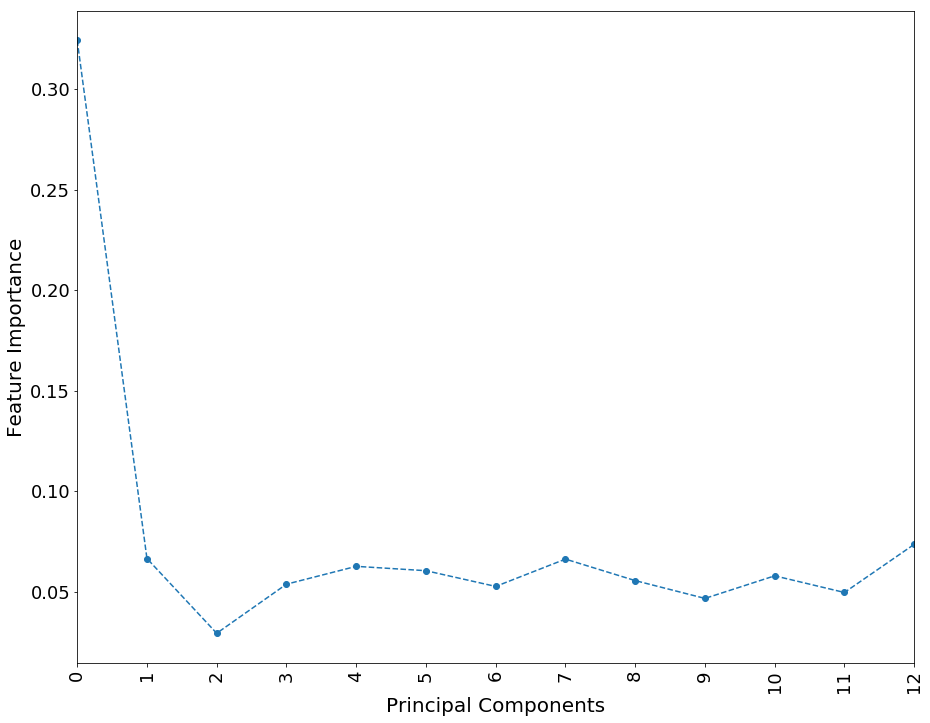

In [263]:
gbc=GradientBoostingClassifier(n_estimators=200,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_75_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_75_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [240]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.74081920904

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1756  230     1986
1           362  484      846
__all__    2118  714     2832

Accuracy of the  Extra Decision Tree  model for test data is: 0.734979423868

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          730  116      846
1          206  163      369
__all__    936  279     1215

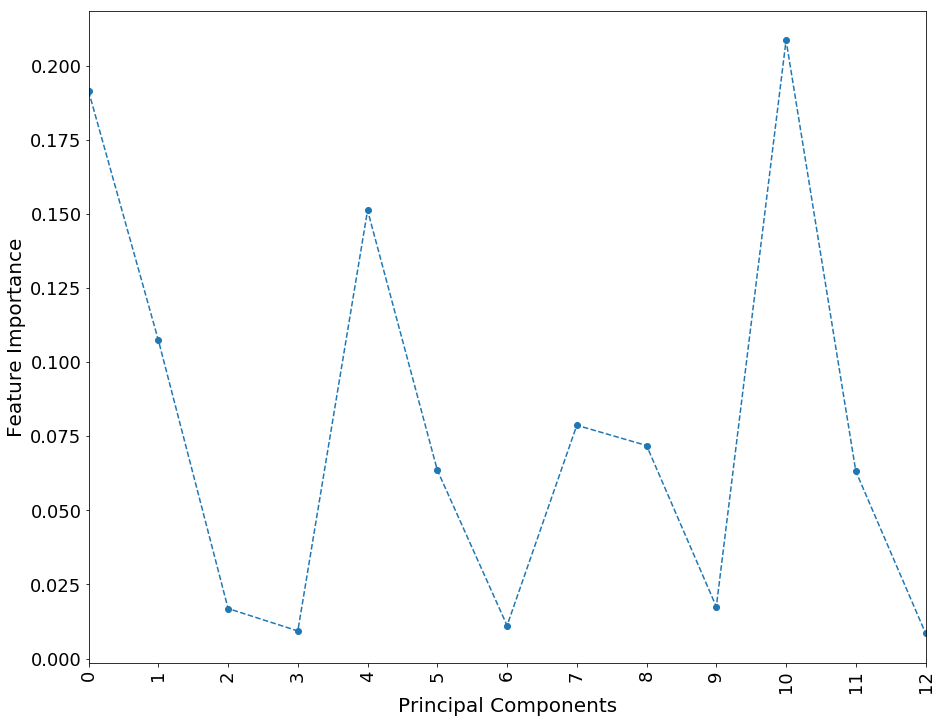

In [264]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=3,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_70_75_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_75_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [242]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.761299435028

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          1976   10     1986
1           163  683      846
__all__    2139  693     2832

Accuracy of the  Bagging  model for test data is: 0.764609053498

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          770   76      846
1          210  159      369
__all__    980  235     1215

In [265]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_70_75_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_75_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [244]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.801906779661


Predicted     0    1  __all__
Actual                       
0          1797  189     1986
1           372  474      846
__all__    2169  663     2832

The test accuracy is: 0.772016460905


Predicted    0    1  __all__
Actual                      
0          766   80      846
1          197  172      369
__all__    963  252     1215

In [266]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_75_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_75_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [246]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.864406779661


Predicted     0    1  __all__
Actual                       
0          1859  127     1986
1           257  589      846
__all__    2116  716     2832

The accuracy of the model on test data is: 0.743209876543


Predicted    0    1  __all__
Actual                      
0          731  115      846
1          197  172      369
__all__    928  287     1215

In [267]:
table_70_75_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_75_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [248]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.9min finished


The accuracy of the model on training data is: 0.782485875706


In [249]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0    1  __all__
Actual                       
0          1604  382     1986
1           234  612      846
__all__    1838  994     2832

The accuracy of the model on test data is: 0.776131687243


Predicted    0    1  __all__
Actual                      
0          683  163      846
1          109  260      369
__all__    792  423     1215

In [268]:
table_70_75_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_75_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [269]:
table_70_75_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_75_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_75_test_PCA.set_index(['index'],drop=True,inplace=True)
table_70_75_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='2.D.D' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [270]:
print("Comparision Table for Training Accuracies:")
display(table_70_75_train_PCA)

Comparision Table for Training Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        1.000000  846.0  1986.0    0.0    0.0  0.000000   
LogisticRegression          0.765537  413.0  1755.0  231.0  433.0  0.511820   
RandomForestClassifier      0.729873  149.0  1918.0   68.0  697.0  0.823877   
AdaBoostClassifier          0.792726  523.0  1722.0  264.0  323.0  0.381797   
GradientBoostingClassifier  0.811441  535.0  1763.0  223.0  311.0  0.367612   
ExtraTreeClassifier         0.790960  484.0  1756.0  230.0  362.0  0.427896   
BaggingClassifier           0.938912  683.0  1976.0   10.0  163.0  0.192671   
VotingClassifier            0.801907  474.0  1797.0  189.0  372.0  0.439716   
Neural Network-1            0.864407  589.0  1859.0  127.0  257.0  0.303783   
Neural-Network-2            0.782486  612.0  1604.0  382.0  234.0  0.276596   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.116314  
RandomForestClassifier      0.034240  
AdaBoostClassifier          0.132931  
GradientBoostingClassifier  0.112286  
ExtraTreeClassifier         0.115811  
BaggingClassifier           0.005035  
VotingClassifier            0.095166  
Neural Network-1            0.063948  
Neural-Network-2            0.192346

In [271]:
print("Comparision Table for Test Accuracies:")
display(table_70_75_test_PCA)

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.759671  145.0  778.0   68.0  224.0  0.607046   
LogisticRegression          0.767901  170.0  763.0   83.0  199.0  0.539295   
RandomForestClassifier      0.715226   46.0  823.0   23.0  323.0  0.875339   
AdaBoostClassifier          0.768724  210.0  724.0  122.0  159.0  0.430894   
GradientBoostingClassifier  0.772016  192.0  746.0  100.0  177.0  0.479675   
ExtraTreeClassifier         0.734979  163.0  730.0  116.0  206.0  0.558266   
BaggingClassifier           0.764609  159.0  770.0   76.0  210.0  0.569106   
VotingClassifier            0.772016  172.0  766.0   80.0  197.0  0.533875   
Neural Network-1            0.743210  172.0  731.0  115.0  197.0  0.533875   
Neural-Network-2            0.776132  260.0  683.0  163.0  109.0  0.295393   

                                 FNR  
index                                 
KNeighborsClassifier        0.080378  
LogisticRegression          0.098109  
RandomForestClassifier      0.027187  
AdaBoostClassifier          0.144208  
GradientBoostingClassifier  0.118203  
ExtraTreeClassifier         0.137116  
BaggingClassifier           0.089835  
VotingClassifier            0.094563  
Neural Network-1            0.135934  
Neural-Network-2            0.192671

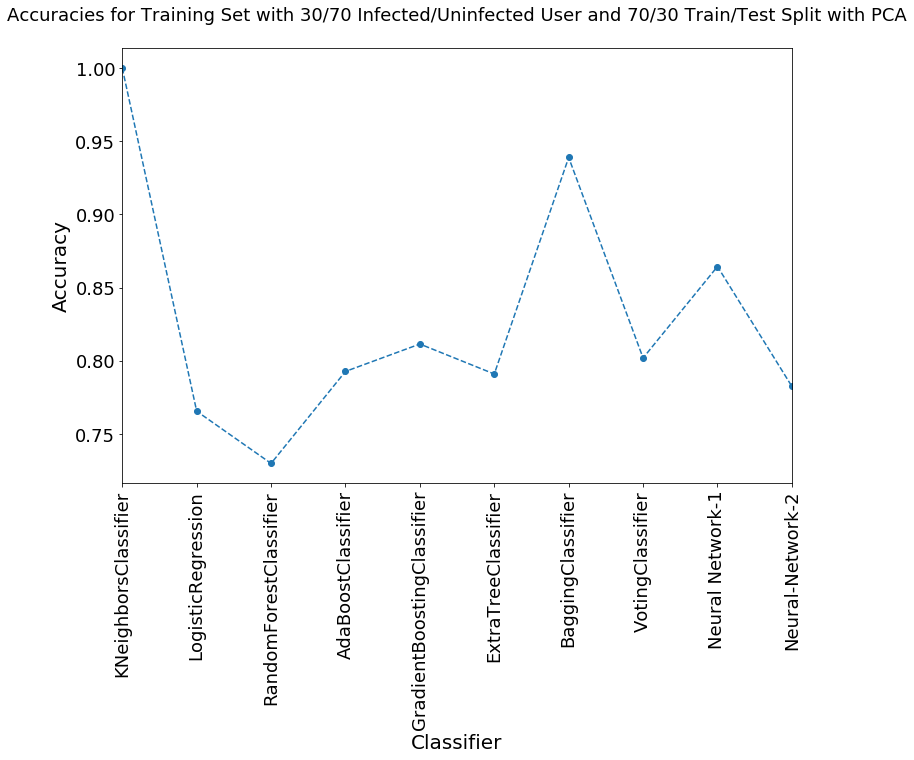

In [272]:
get_accuracy_plot(table_70_75_train_PCA,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

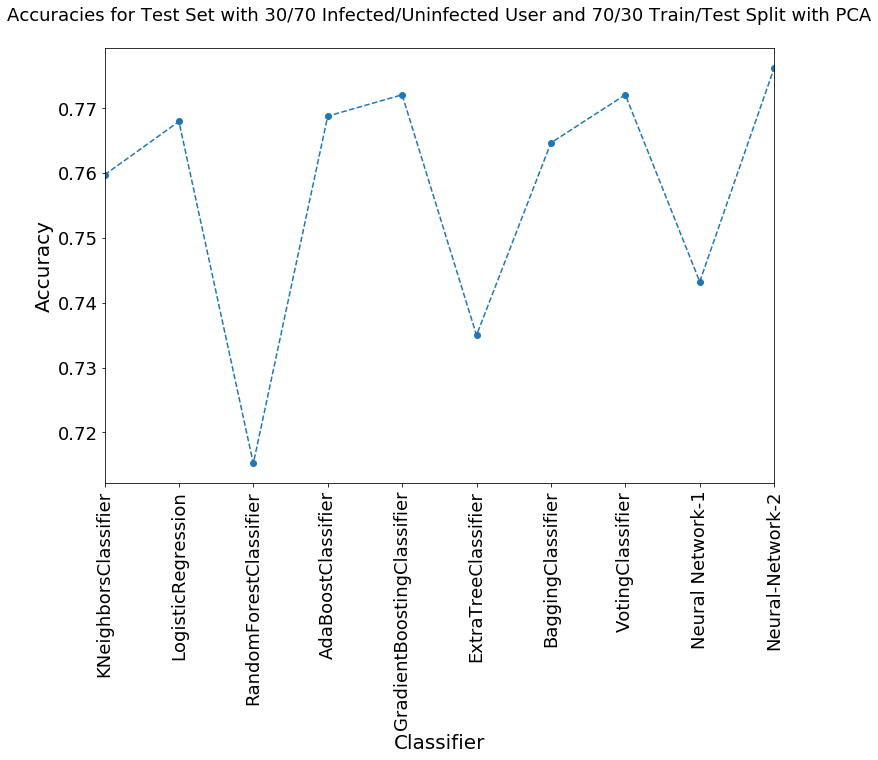

In [273]:
get_accuracy_plot(table_70_75_test_PCA,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

<a id='2.E' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split</h3.</a>

In [275]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.1)

The train/test split ratio is 90:10


In [304]:
table_90_75_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_75_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [277]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance


Accuracy of the  KNN  model for training data is: 0.758923668314

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2546     0     2546
1             0  1096     1096
__all__    2546  1096     3642

Accuracy of the  KNN  model for test data is: 0.748148148148

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          243   43      286
1           59   60      119
__all__    302  103      405

In [305]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_75_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_75_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [279]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.77018121911

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2271  275     2546
1           567  529     1096
__all__    2838  804     3642

Accuracy of the  Logistic  model for test data is: 0.745679012346

Confusion Matrix for test data is:


Predicted    0   1  __all__
Actual                     
0          253  33      286
1           70  49      119
__all__    323  82      405

In [306]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_75_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_75_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [281]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.776221856123


Predicted     0    1  __all__
Actual                       
0          2206  340     2546
1           475  621     1096
__all__    2681  961     3642

Accuracy of Random Forest Model on test data is: 0.738271604938


Predicted    0    1  __all__
Actual                      
0          242   44      286
1           62   57      119
__all__    304  101      405

In [307]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_75_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_75_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

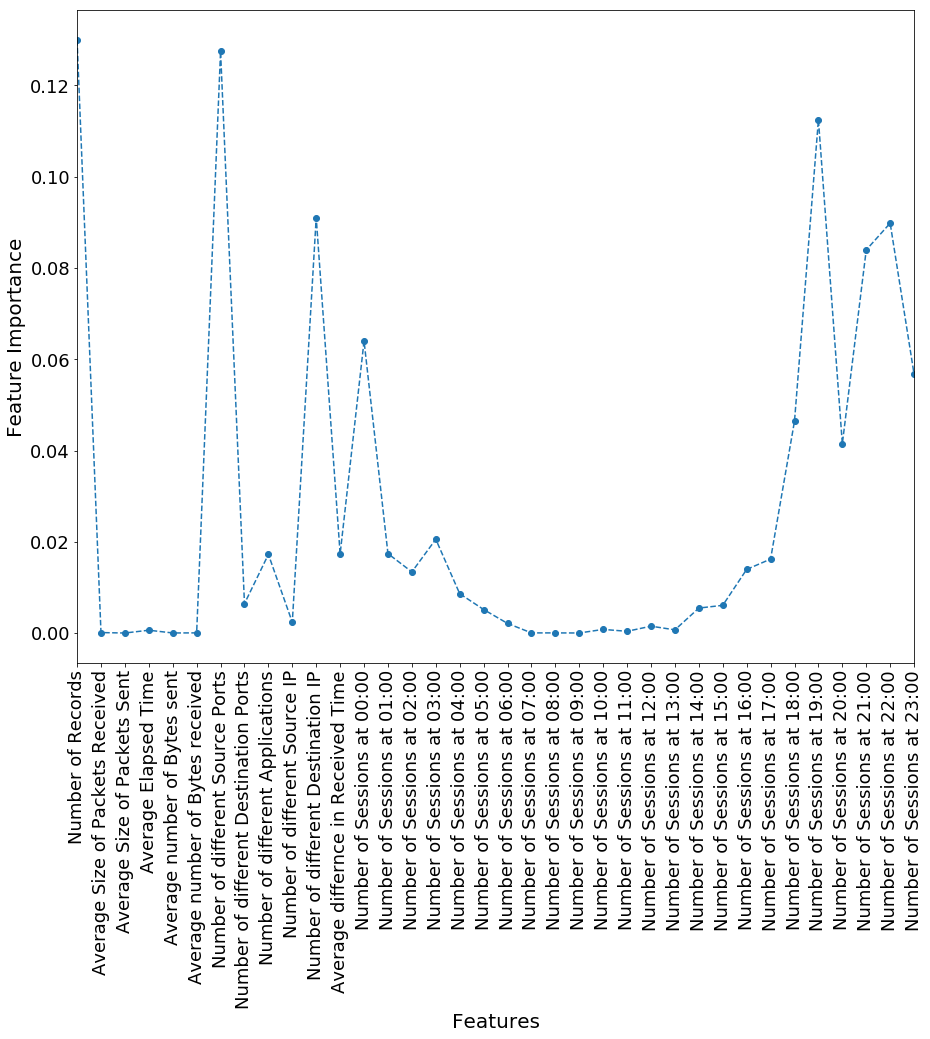

In [308]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [284]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.769906644701

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2143   403     2546
1           393   703     1096
__all__    2536  1106     3642

Accuracy of the  AdaBoostClassifier  model for test data is: 0.750617283951

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          232   54      286
1           47   72      119
__all__    279  126      405

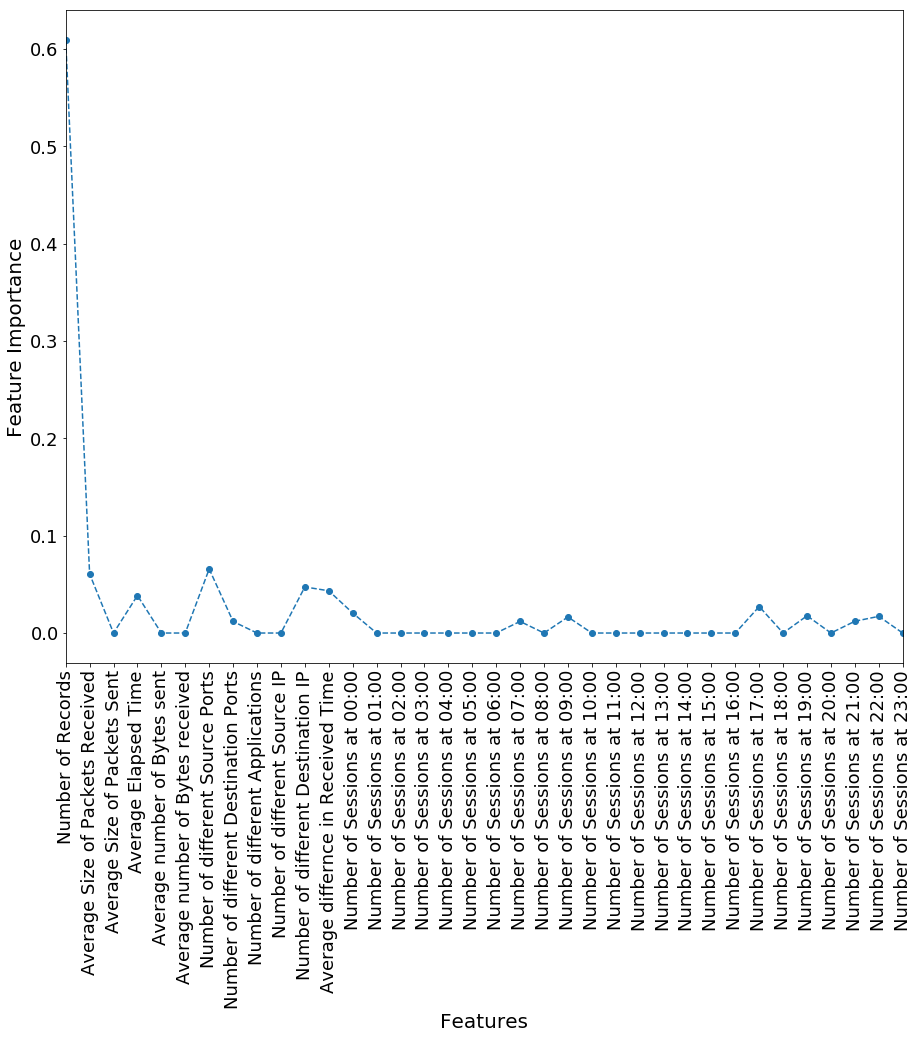

In [309]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_90_75_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_75_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [286]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.771828665568

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2258  288     2546
1           463  633     1096
__all__    2721  921     3642

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.755555555556

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          246   40      286
1           59   60      119
__all__    305  100      405

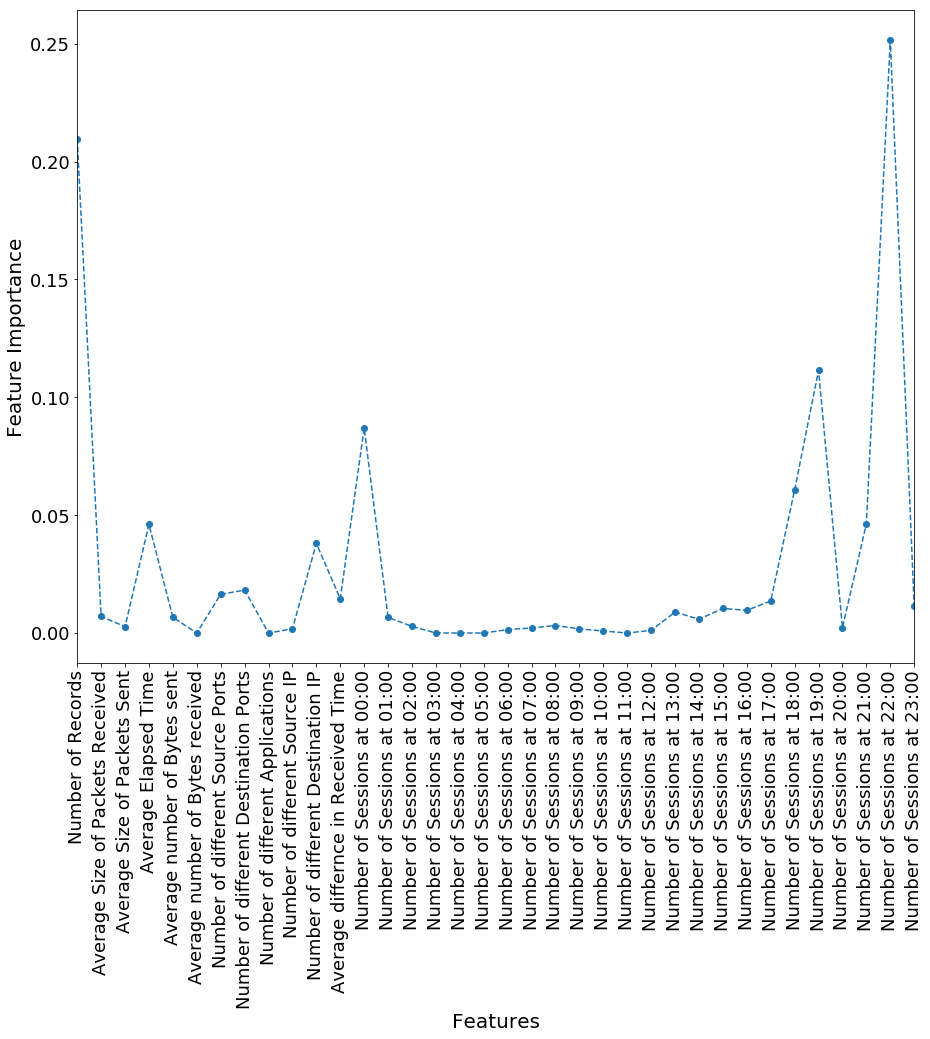

In [310]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_75_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_75_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [288]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.766886326194

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2079   467     2546
1           283   813     1096
__all__    2362  1280     3642

Accuracy of the  Extra Decision Tree  model for test data is: 0.728395061728

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          217   69      286
1           41   78      119
__all__    258  147      405

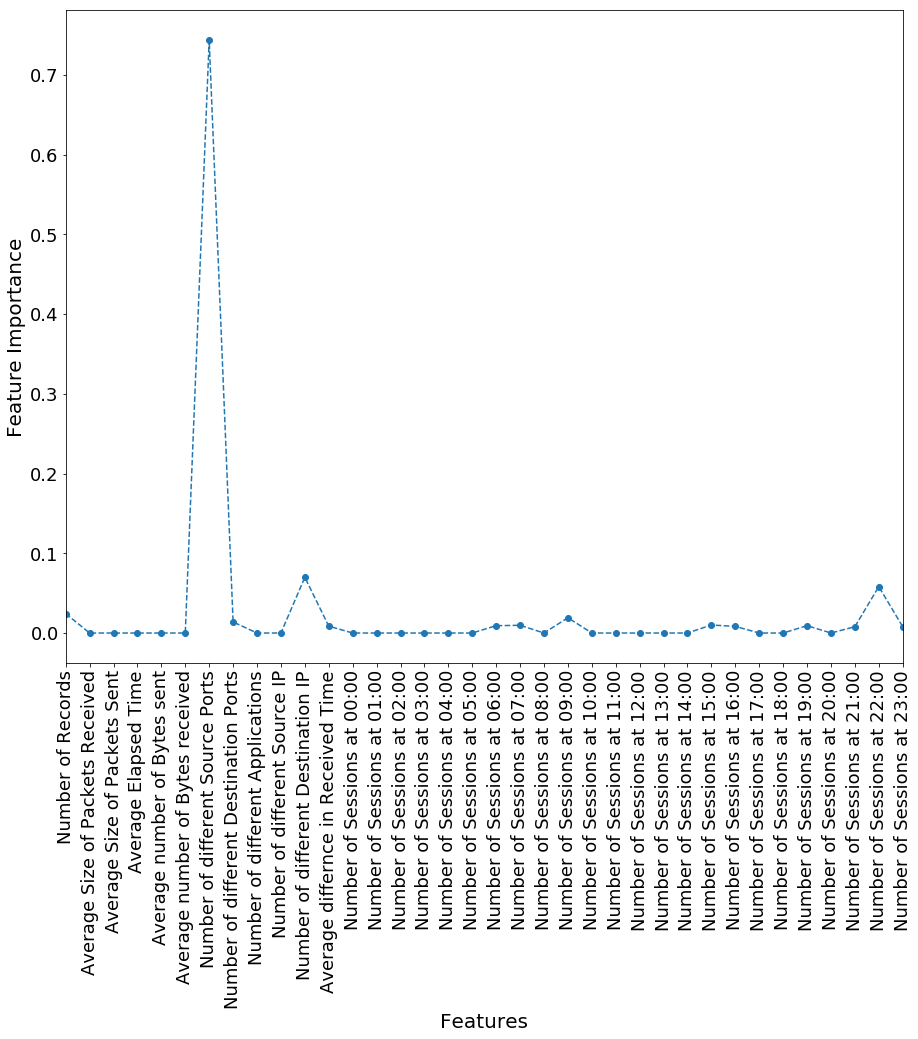

In [311]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=20,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=3,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_75_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_75_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [290]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.779516749039

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2491   55     2546
1           207  889     1096
__all__    2698  944     3642

Accuracy of the  Bagging  model for test data is: 0.753086419753

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          240   46      286
1           54   65      119
__all__    294  111      405

In [312]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_75_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_75_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [292]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.807797913234


Predicted     0    1  __all__
Actual                       
0          2288  258     2546
1           442  654     1096
__all__    2730  912     3642

The test accuracy is: 0.738271604938


Predicted    0    1  __all__
Actual                      
0          241   45      286
1           61   58      119
__all__    302  103      405

In [313]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_75_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_75_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [294]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.947281713344


Predicted     0    1  __all__
Actual                       
0          2536   10     2546
1           182  914     1096
__all__    2718  924     3642

The accuracy of the model on test data is: 0.730864197531


Predicted    0    1  __all__
Actual                      
0          239   47      286
1           62   57      119
__all__    301  104      405

In [314]:
table_90_75_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_75_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [296]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.0min finished


The accuracy of the model on training data is: 0.783635365184


In [297]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0    1  __all__
Actual                       
0          2353  193     2546
1           595  501     1096
__all__    2948  694     3642

The accuracy of the model on test data is: 0.728395061728


Predicted    0   1  __all__
Actual                     
0          249  37      286
1           73  46      119
__all__    322  83      405

In [315]:
table_90_75_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_75_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [316]:
table_90_75_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_75_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_75_test.set_index(['index'],drop=True,inplace=True)
table_90_75_train.set_index(['index'],drop=True,inplace=True)

<a id='2.E.E' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [317]:
print("Comparision Table for Training Accuracies:")
display(table_90_75_train)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1096.0  2546.0    0.0    0.0  0.000000   
LogisticRegression          0.769357   537.0  2265.0  281.0  559.0  0.510036   
RandomForestClassifier      0.776222   621.0  2206.0  340.0  475.0  0.433394   
AdaBoostClassifier          0.781439   703.0  2143.0  403.0  393.0  0.358577   
GradientBoostingClassifier  0.793795   633.0  2258.0  288.0  463.0  0.422445   
ExtraTreeClassifier         0.794069   813.0  2079.0  467.0  283.0  0.258212   
BaggingClassifier           0.928062   889.0  2491.0   55.0  207.0  0.188869   
VotingClassifier            0.807798   654.0  2288.0  258.0  442.0  0.403285   
Neural Network-1            0.947282   914.0  2536.0   10.0  182.0  0.166058   
Neural-Network-2            0.783635   501.0  2353.0  193.0  595.0  0.542883   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.110369  
RandomForestClassifier      0.133543  
AdaBoostClassifier          0.158288  
GradientBoostingClassifier  0.113119  
ExtraTreeClassifier         0.183425  
BaggingClassifier           0.021603  
VotingClassifier            0.101335  
Neural Network-1            0.003928  
Neural-Network-2            0.075805

In [318]:
print("Comparision Table for Test Accuracies:")
display(table_90_75_test)

Comparision Table for Test Accuracies:


accuracy    TP     TN    FP    FN       FPR  \
index                                                                     
KNeighborsClassifier        0.748148  60.0  243.0  43.0  59.0  0.495798   
LogisticRegression          0.745679  49.0  253.0  33.0  70.0  0.588235   
RandomForestClassifier      0.738272  57.0  242.0  44.0  62.0  0.521008   
AdaBoostClassifier          0.750617  72.0  232.0  54.0  47.0  0.394958   
GradientBoostingClassifier  0.755556  60.0  246.0  40.0  59.0  0.495798   
ExtraTreeClassifier         0.728395  78.0  217.0  69.0  41.0  0.344538   
BaggingClassifier           0.753086  65.0  240.0  46.0  54.0  0.453782   
VotingClassifier            0.738272  58.0  241.0  45.0  61.0  0.512605   
Neural Network-1            0.730864  57.0  239.0  47.0  62.0  0.521008   
Neural-Network-2            0.728395  46.0  249.0  37.0  73.0  0.613445   

                                 FNR  
index                                 
KNeighborsClassifier        0.150350  
LogisticRegression          0.115385  
RandomForestClassifier      0.153846  
AdaBoostClassifier          0.188811  
GradientBoostingClassifier  0.139860  
ExtraTreeClassifier         0.241259  
BaggingClassifier           0.160839  
VotingClassifier            0.157343  
Neural Network-1            0.164336  
Neural-Network-2            0.129371

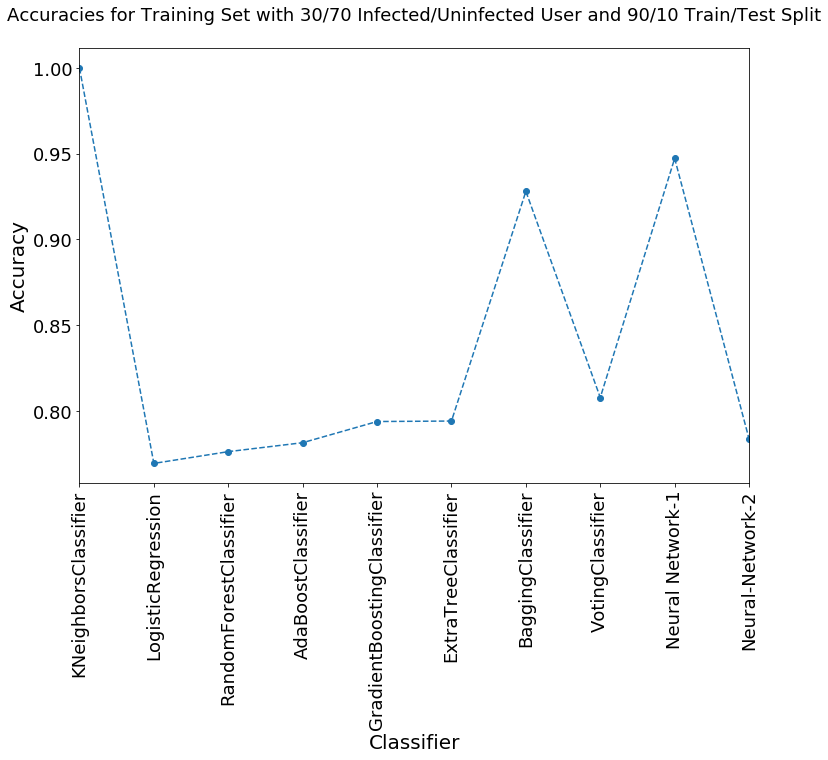

In [319]:
get_accuracy_plot(table_90_75_train,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split')

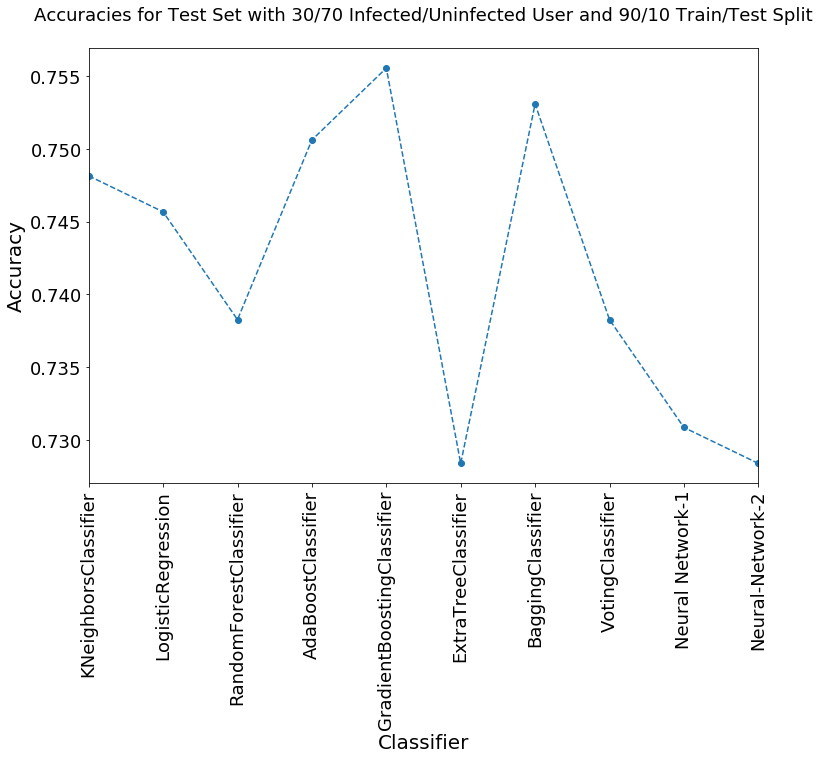

In [320]:
get_accuracy_plot(table_90_75_test,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split')

<a id='2.F' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split with PCA</h3.</a>

In [322]:
### With the PCA
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.1)

Variance explained using 13 components is: 0.915033450989
The train/test split ratio is 90:10


In [340]:
table_90_75_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_75_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [325]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance


Accuracy of the  KNN  model for training data is: 0.758923668314

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2546     0     2546
1             0  1096     1096
__all__    2546  1096     3642

Accuracy of the  KNN  model for test data is: 0.748148148148

Confusion Matrix for test data is:


Predicted    0   1  __all__
Actual                     
0          257  29      286
1           73  46      119
__all__    330  75      405

In [341]:
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_75_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_75_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [327]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5       100  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001


Accuracy of the  Logistic  model for training data is: 0.767710049423

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2247  299     2546
1           547  549     1096
__all__    2794  848     3642

Accuracy of the  Logistic  model for test data is: 0.755555555556

Confusion Matrix for test data is:


Predicted    0   1  __all__
Actual                     
0          253  33      286
1           66  53      119
__all__    319  86      405

In [342]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=100,multi_class='multinomial',penalty='l2',solver='sag',tol=1e-3)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_75_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_75_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [329]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.73778143877


Predicted     0    1  __all__
Actual                       
0          2439  107     2546
1           848  248     1096
__all__    3287  355     3642

Accuracy of Random Forest Model on test data is: 0.701234567901


Predicted    0   1  __all__
Actual                     
0          268  18      286
1          103  16      119
__all__    371  34      405

In [343]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_75_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_75_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

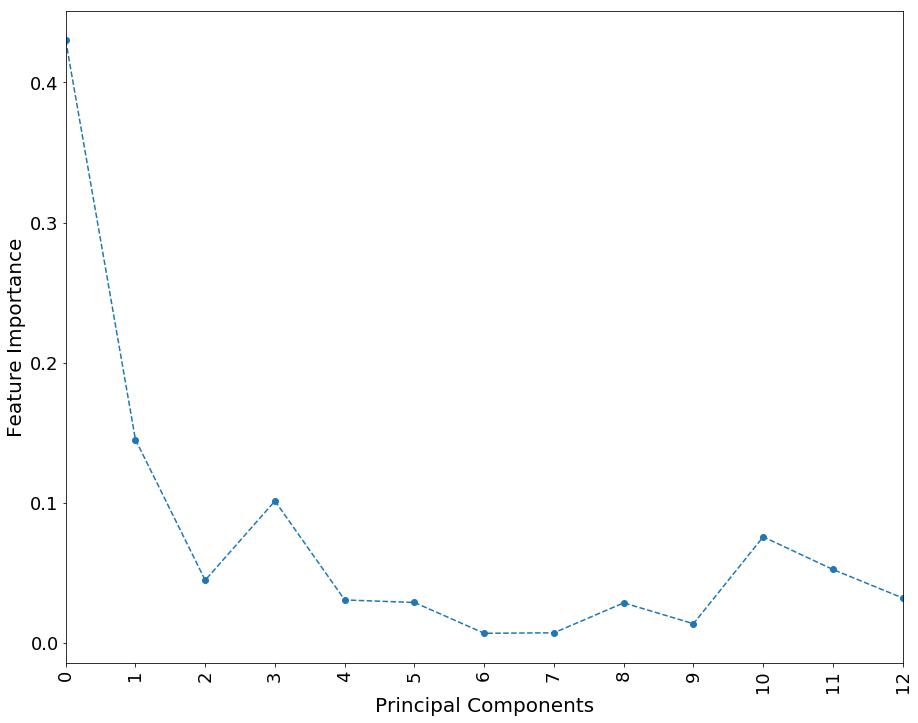

In [344]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [332]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 0.771828665568

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2189   357     2546
1           451   645     1096
__all__    2640  1002     3642

Accuracy of the  AdaBoostClassifier  model for test data is: 0.745679012346

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          238   48      286
1           55   64      119
__all__    293  112      405

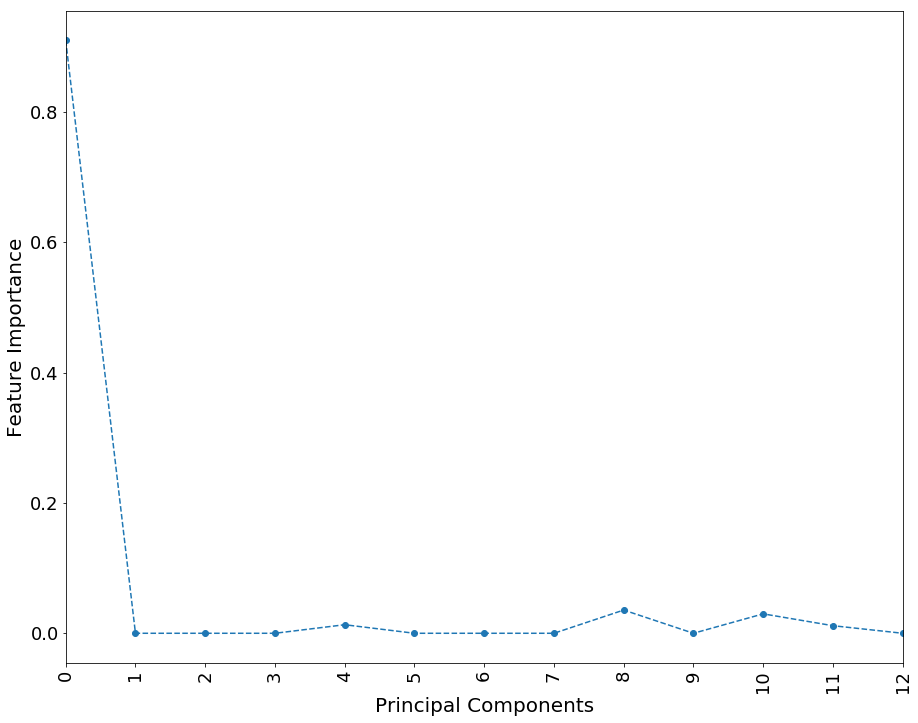

In [345]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_90_75_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_75_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [334]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           200             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.775123558484

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2229   317     2546
1           405   691     1096
__all__    2634  1008     3642

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.753086419753

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          238   48      286
1           52   67      119
__all__    290  115      405

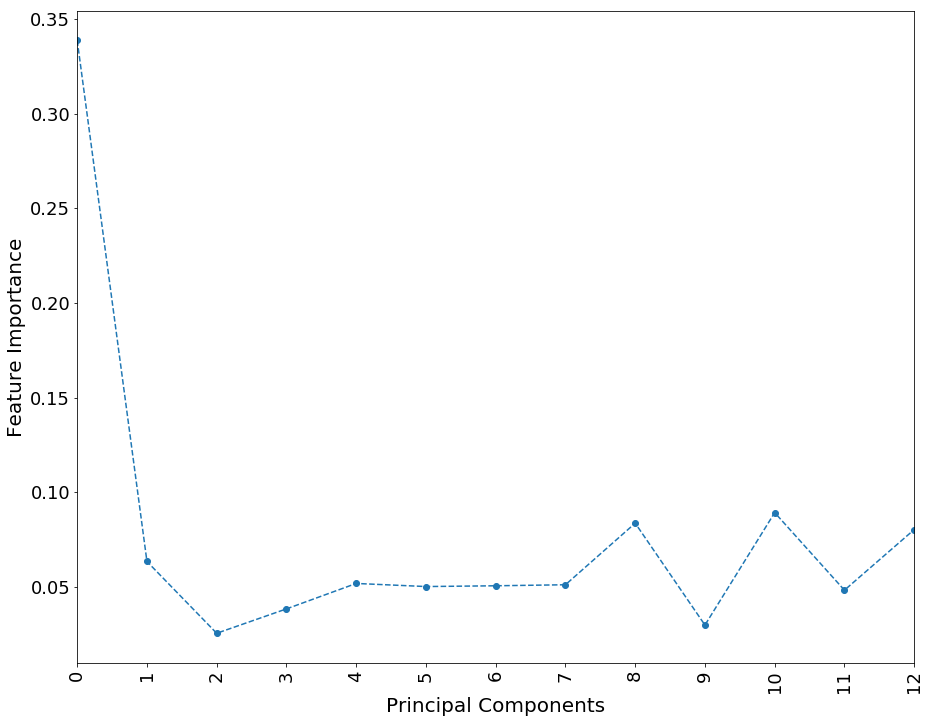

In [346]:
gbc=GradientBoostingClassifier(n_estimators=200,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_75_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_75_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [336]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.763316858869

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2248  298     2546
1           487  609     1096
__all__    2735  907     3642

Accuracy of the  Extra Decision Tree  model for test data is: 0.745679012346

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          243   43      286
1           60   59      119
__all__    303  102      405

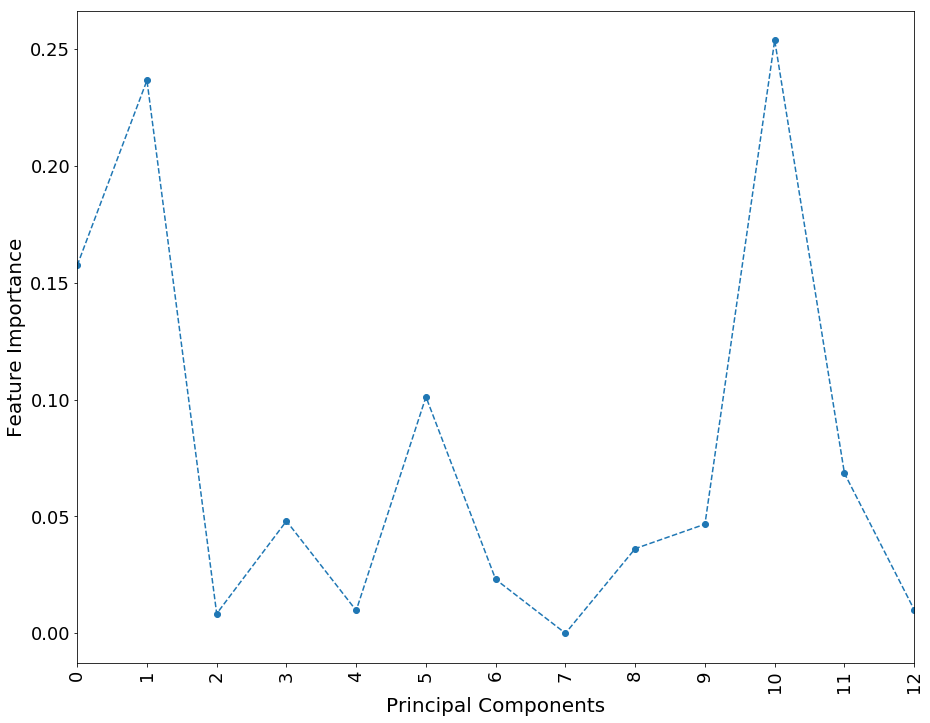

In [347]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=3,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_75_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_75_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [338]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.766611751785

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2533   13     2546
1           211  885     1096
__all__    2744  898     3642

Accuracy of the  Bagging  model for test data is: 0.730864197531

Confusion Matrix for test data is:


Predicted    0   1  __all__
Actual                     
0          247  39      286
1           70  49      119
__all__    317  88      405

In [348]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_75_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_75_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [349]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.836628226249


Predicted     0    1  __all__
Actual                       
0          2351  195     2546
1           400  696     1096
__all__    2751  891     3642

The test accuracy is: 0.748148148148


Predicted    0   1  __all__
Actual                     
0          248  38      286
1           64  55      119
__all__    312  93      405

In [350]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_75_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_75_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [351]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.869302580869


Predicted     0    1  __all__
Actual                       
0          2375  171     2546
1           305  791     1096
__all__    2680  962     3642

The accuracy of the model on test data is: 0.725925925926


Predicted    0    1  __all__
Actual                      
0          235   51      286
1           60   59      119
__all__    295  110      405

In [352]:
table_90_75_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_75_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [353]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.4min finished


The accuracy of the model on training data is: 0.796265788029


In [354]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted     0     1  __all__
Actual                        
0          2192   354     2546
1           388   708     1096
__all__    2580  1062     3642

The accuracy of the model on test data is: 0.765432098765


Predicted    0    1  __all__
Actual                      
0          244   42      286
1           53   66      119
__all__    297  108      405

In [355]:
table_90_75_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_75_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [356]:
table_90_75_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_75_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_75_test_PCA.set_index(['index'],drop=True,inplace=True)
table_90_75_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='2.F.F' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [357]:
print("Comparision Table for Training Accuracies:")
display(table_90_75_train_PCA)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1096.0  2546.0    0.0    0.0  0.000000   
LogisticRegression          0.767710   549.0  2247.0  299.0  547.0  0.499088   
RandomForestClassifier      0.737781   248.0  2439.0  107.0  848.0  0.773723   
AdaBoostClassifier          0.778144   645.0  2189.0  357.0  451.0  0.411496   
GradientBoostingClassifier  0.801757   691.0  2229.0  317.0  405.0  0.369526   
ExtraTreeClassifier         0.784459   609.0  2248.0  298.0  487.0  0.444343   
BaggingClassifier           0.938495   885.0  2533.0   13.0  211.0  0.192518   
VotingClassifier            0.836628   696.0  2351.0  195.0  400.0  0.364964   
Neural Network-1            0.869303   791.0  2375.0  171.0  305.0  0.278285   
Neural-Network-2            0.796266   708.0  2192.0  354.0  388.0  0.354015   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.117439  
RandomForestClassifier      0.042027  
AdaBoostClassifier          0.140220  
GradientBoostingClassifier  0.124509  
ExtraTreeClassifier         0.117046  
BaggingClassifier           0.005106  
VotingClassifier            0.076591  
Neural Network-1            0.067164  
Neural-Network-2            0.139042

In [358]:
print("Comparision Table for Test Accuracies:")
display(table_90_75_test_PCA)

Comparision Table for Test Accuracies:


accuracy    TP     TN    FP     FN       FPR  \
index                                                                      
KNeighborsClassifier        0.748148  46.0  257.0  29.0   73.0  0.613445   
LogisticRegression          0.755556  53.0  253.0  33.0   66.0  0.554622   
RandomForestClassifier      0.701235  16.0  268.0  18.0  103.0  0.865546   
AdaBoostClassifier          0.745679  64.0  238.0  48.0   55.0  0.462185   
GradientBoostingClassifier  0.753086  67.0  238.0  48.0   52.0  0.436975   
ExtraTreeClassifier         0.745679  59.0  243.0  43.0   60.0  0.504202   
BaggingClassifier           0.730864  49.0  247.0  39.0   70.0  0.588235   
VotingClassifier            0.748148  55.0  248.0  38.0   64.0  0.537815   
Neural Network-1            0.725926  59.0  235.0  51.0   60.0  0.504202   
Neural-Network-2            0.765432  66.0  244.0  42.0   53.0  0.445378   

                                 FNR  
index                                 
KNeighborsClassifier        0.101399  
LogisticRegression          0.115385  
RandomForestClassifier      0.062937  
AdaBoostClassifier          0.167832  
GradientBoostingClassifier  0.167832  
ExtraTreeClassifier         0.150350  
BaggingClassifier           0.136364  
VotingClassifier            0.132867  
Neural Network-1            0.178322  
Neural-Network-2            0.146853

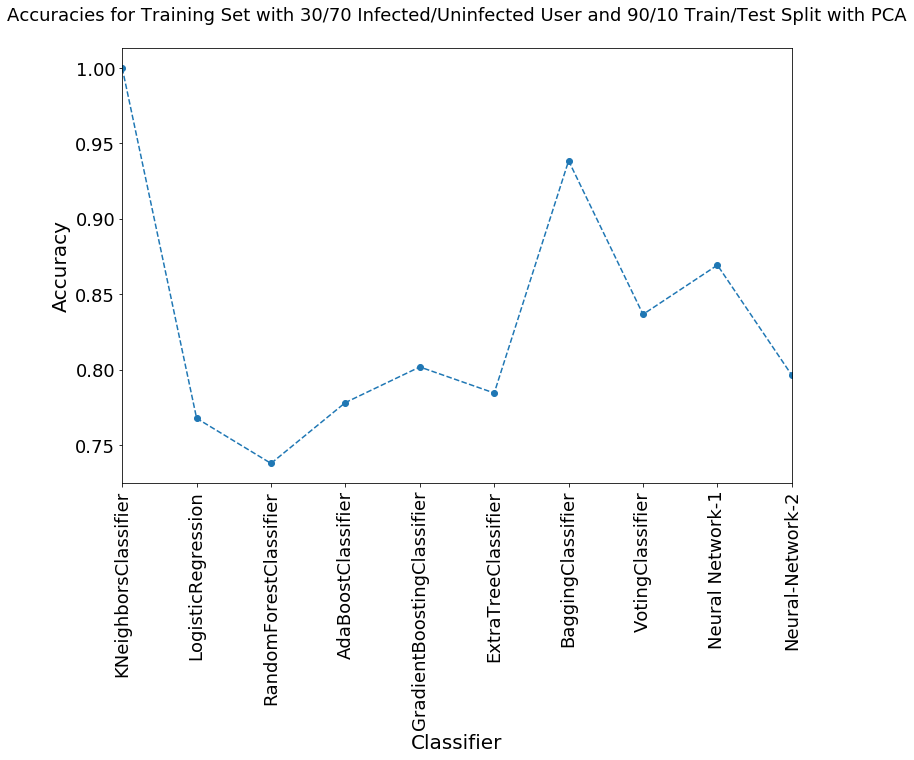

In [359]:
get_accuracy_plot(table_90_75_train_PCA,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

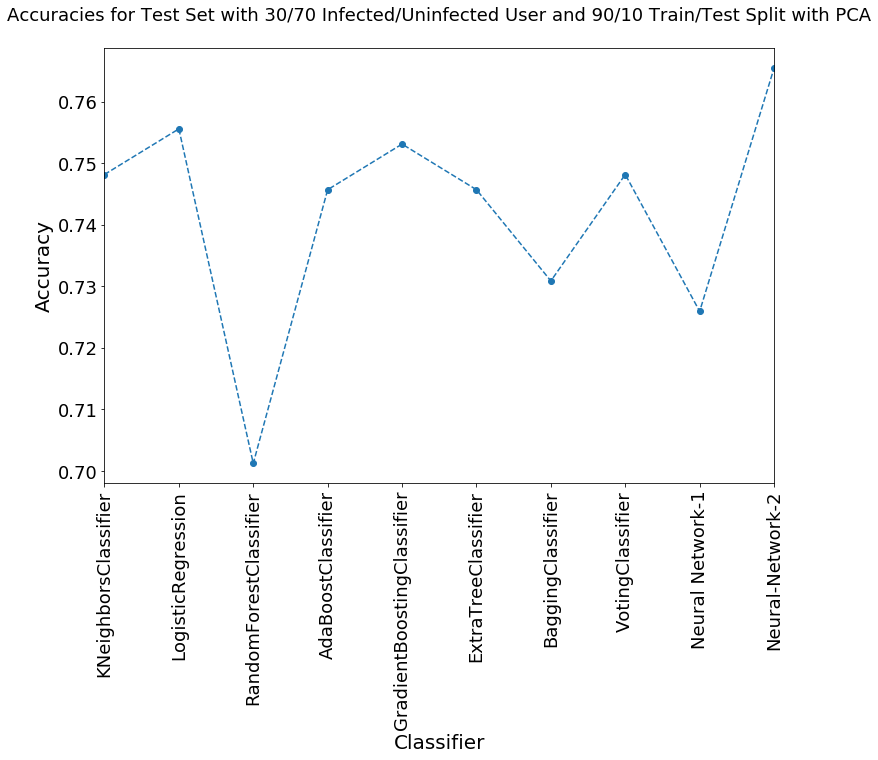

In [360]:
get_accuracy_plot(table_90_75_test_PCA,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

In [274]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')